In [185]:

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

importing Data from the two csv files ted_main.csv which contains the data about all the talks and transcripts.csv which contains all the transcripts

In [184]:

tedmain = pd.read_csv(r"C:\Users\arsal\OneDrive\PODS DATA\ted_main.csv\ted_main.csv")
trans = pd.read_csv(r"C:\Users\arsal\OneDrive\PODS DATA\transcripts.csv\transcripts.csv")

**initial overview of the data to check for outliers and missing values**

In [168]:
tedmain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   comments            2550 non-null   int64 
 1   description         2550 non-null   object
 2   duration            2550 non-null   int64 
 3   event               2550 non-null   object
 4   film_date           2550 non-null   int64 
 5   languages           2550 non-null   int64 
 6   main_speaker        2550 non-null   object
 7   name                2550 non-null   object
 8   num_speaker         2550 non-null   int64 
 9   published_date      2550 non-null   int64 
 10  ratings             2550 non-null   object
 11  related_talks       2550 non-null   object
 12  speaker_occupation  2544 non-null   object
 13  tags                2550 non-null   object
 14  title               2550 non-null   object
 15  url                 2550 non-null   object
 16  views               2550

In [169]:
trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2467 entries, 0 to 2466
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   transcript  2467 non-null   object
 1   url         2467 non-null   object
dtypes: object(2)
memory usage: 38.7+ KB


In [170]:
tedmain.head()

comments                                        description  duration  \
0      4553  Sir Ken Robinson makes an entertaining and pro...      1164   
1       265  With the same humor and humanity he exuded in ...       977   
2       124  New York Times columnist David Pogue takes aim...      1286   
3       200  In an emotionally charged talk, MacArthur-winn...      1116   
4       593  You've never seen data presented like this. Wi...      1190   

     event   film_date  languages   main_speaker  \
0  TED2006  1140825600         60   Ken Robinson   
1  TED2006  1140825600         43        Al Gore   
2  TED2006  1140739200         26    David Pogue   
3  TED2006  1140912000         35  Majora Carter   
4  TED2006  1140566400         48   Hans Rosling   

                                            name  num_speaker  published_date  \
0      Ken Robinson: Do schools kill creativity?            1      1151367060   
1           Al Gore: Averting the climate crisis            1      1151367060   
2                  David Pogue: Simplicity sells            1      1151367060   
3             Majora Carter: Greening the ghetto            1      1151367060   
4  Hans Rosling: The best stats you've ever seen            1      1151440680   

                                             ratings  \
0  [{'id': 7, 'name': 'Funny', 'count': 19645}, {...   
1  [{'id': 7, 'name': 'Funny', 'count': 544}, {'i...   
2  [{'id': 7, 'name': 'Funny', 'count': 964}, {'i...   
3  [{'id': 3, 'name': 'Courageous', 'count': 760}...   
4  [{'id': 9, 'name': 'Ingenious', 'count': 3202}...   

                                       related_talks  \
0  [{'id': 865, 'hero': 'https://pe.tedcdn.com/im...   
1  [{'id': 243, 'hero': 'https://pe.tedcdn.com/im...   
2  [{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...   
3  [{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...   
4  [{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...   

                     speaker_occupation  \
0                       Author/educator   
1                      Climate advocate   
2                  Technology columnist   
3    Activist for environmental justice   
4  Global health expert; data visionary   

                                                tags  \
0  ['children', 'creativity', 'culture', 'dance',...   
1  ['alternative energy', 'cars', 'climate change...   
2  ['computers', 'entertainment', 'interface desi...   
3  ['MacArthur grant', 'activism', 'business', 'c...   
4  ['Africa', 'Asia', 'Google', 'demo', 'economic...   

                             title  \
0      Do schools kill creativity?   
1      Averting the climate crisis   
2                 Simplicity sells   
3              Greening the ghetto   
4  The best stats you've ever seen   

                                                 url     views  
0  https://www.ted.com/talks/ken_robinson_says_sc...  47227110  
1  https://www.ted.com/talks/al_gore_on_averting_...   3200520  
2  https://www.ted.com/talks/david_pogue_says_sim...   1636292  
3  https://www.ted.com/talks/majora_carter_s_tale...   1697550  
4  https://www.ted.com/talks/hans_rosling_shows_t...  12005869

In [171]:
trans.head()

transcript  \
0  Good morning. How are you?(Laughter)It's been ...   
1  Thank you so much, Chris. And it's truly a gre...   
2  (Music: "The Sound of Silence," Simon & Garfun...   
3  If you're here today — and I'm very happy that...   
4  About 10 years ago, I took on the task to teac...   

                                                 url  
0  https://www.ted.com/talks/ken_robinson_says_sc...  
1  https://www.ted.com/talks/al_gore_on_averting_...  
2  https://www.ted.com/talks/david_pogue_says_sim...  
3  https://www.ted.com/talks/majora_carter_s_tale...  
4  https://www.ted.com/talks/hans_rosling_shows_t...

**merging tedmain and transcript using url column**

In [442]:
# Merge the tedmain and trans dataframes on the 'url' column
merged_df = pd.merge(tedmain, trans, on='url', how='inner')

# Display the first few rows of the merged dataframe to verify
merged_df.head()

comments                                        description  duration  \
0      4553  Sir Ken Robinson makes an entertaining and pro...      1164   
1       265  With the same humor and humanity he exuded in ...       977   
2       124  New York Times columnist David Pogue takes aim...      1286   
3       200  In an emotionally charged talk, MacArthur-winn...      1116   
4       593  You've never seen data presented like this. Wi...      1190   

     event   film_date  languages   main_speaker  \
0  TED2006  1140825600         60   Ken Robinson   
1  TED2006  1140825600         43        Al Gore   
2  TED2006  1140739200         26    David Pogue   
3  TED2006  1140912000         35  Majora Carter   
4  TED2006  1140566400         48   Hans Rosling   

                                            name  num_speaker  published_date  \
0      Ken Robinson: Do schools kill creativity?            1      1151367060   
1           Al Gore: Averting the climate crisis            1      1151367060   
2                  David Pogue: Simplicity sells            1      1151367060   
3             Majora Carter: Greening the ghetto            1      1151367060   
4  Hans Rosling: The best stats you've ever seen            1      1151440680   

                                             ratings  \
0  [{'id': 7, 'name': 'Funny', 'count': 19645}, {...   
1  [{'id': 7, 'name': 'Funny', 'count': 544}, {'i...   
2  [{'id': 7, 'name': 'Funny', 'count': 964}, {'i...   
3  [{'id': 3, 'name': 'Courageous', 'count': 760}...   
4  [{'id': 9, 'name': 'Ingenious', 'count': 3202}...   

                                       related_talks  \
0  [{'id': 865, 'hero': 'https://pe.tedcdn.com/im...   
1  [{'id': 243, 'hero': 'https://pe.tedcdn.com/im...   
2  [{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...   
3  [{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...   
4  [{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...   

                     speaker_occupation  \
0                       Author/educator   
1                      Climate advocate   
2                  Technology columnist   
3    Activist for environmental justice   
4  Global health expert; data visionary   

                                                tags  \
0  ['children', 'creativity', 'culture', 'dance',...   
1  ['alternative energy', 'cars', 'climate change...   
2  ['computers', 'entertainment', 'interface desi...   
3  ['MacArthur grant', 'activism', 'business', 'c...   
4  ['Africa', 'Asia', 'Google', 'demo', 'economic...   

                             title  \
0      Do schools kill creativity?   
1      Averting the climate crisis   
2                 Simplicity sells   
3              Greening the ghetto   
4  The best stats you've ever seen   

                                                 url     views  \
0  https://www.ted.com/talks/ken_robinson_says_sc...  47227110   
1  https://www.ted.com/talks/al_gore_on_averting_...   3200520   
2  https://www.ted.com/talks/david_pogue_says_sim...   1636292   
3  https://www.ted.com/talks/majora_carter_s_tale...   1697550   
4  https://www.ted.com/talks/hans_rosling_shows_t...  12005869   

                                          transcript  
0  Good morning. How are you?(Laughter)It's been ...  
1  Thank you so much, Chris. And it's truly a gre...  
2  (Music: "The Sound of Silence," Simon & Garfun...  
3  If you're here today — and I'm very happy that...  
4  About 10 years ago, I took on the task to teac...

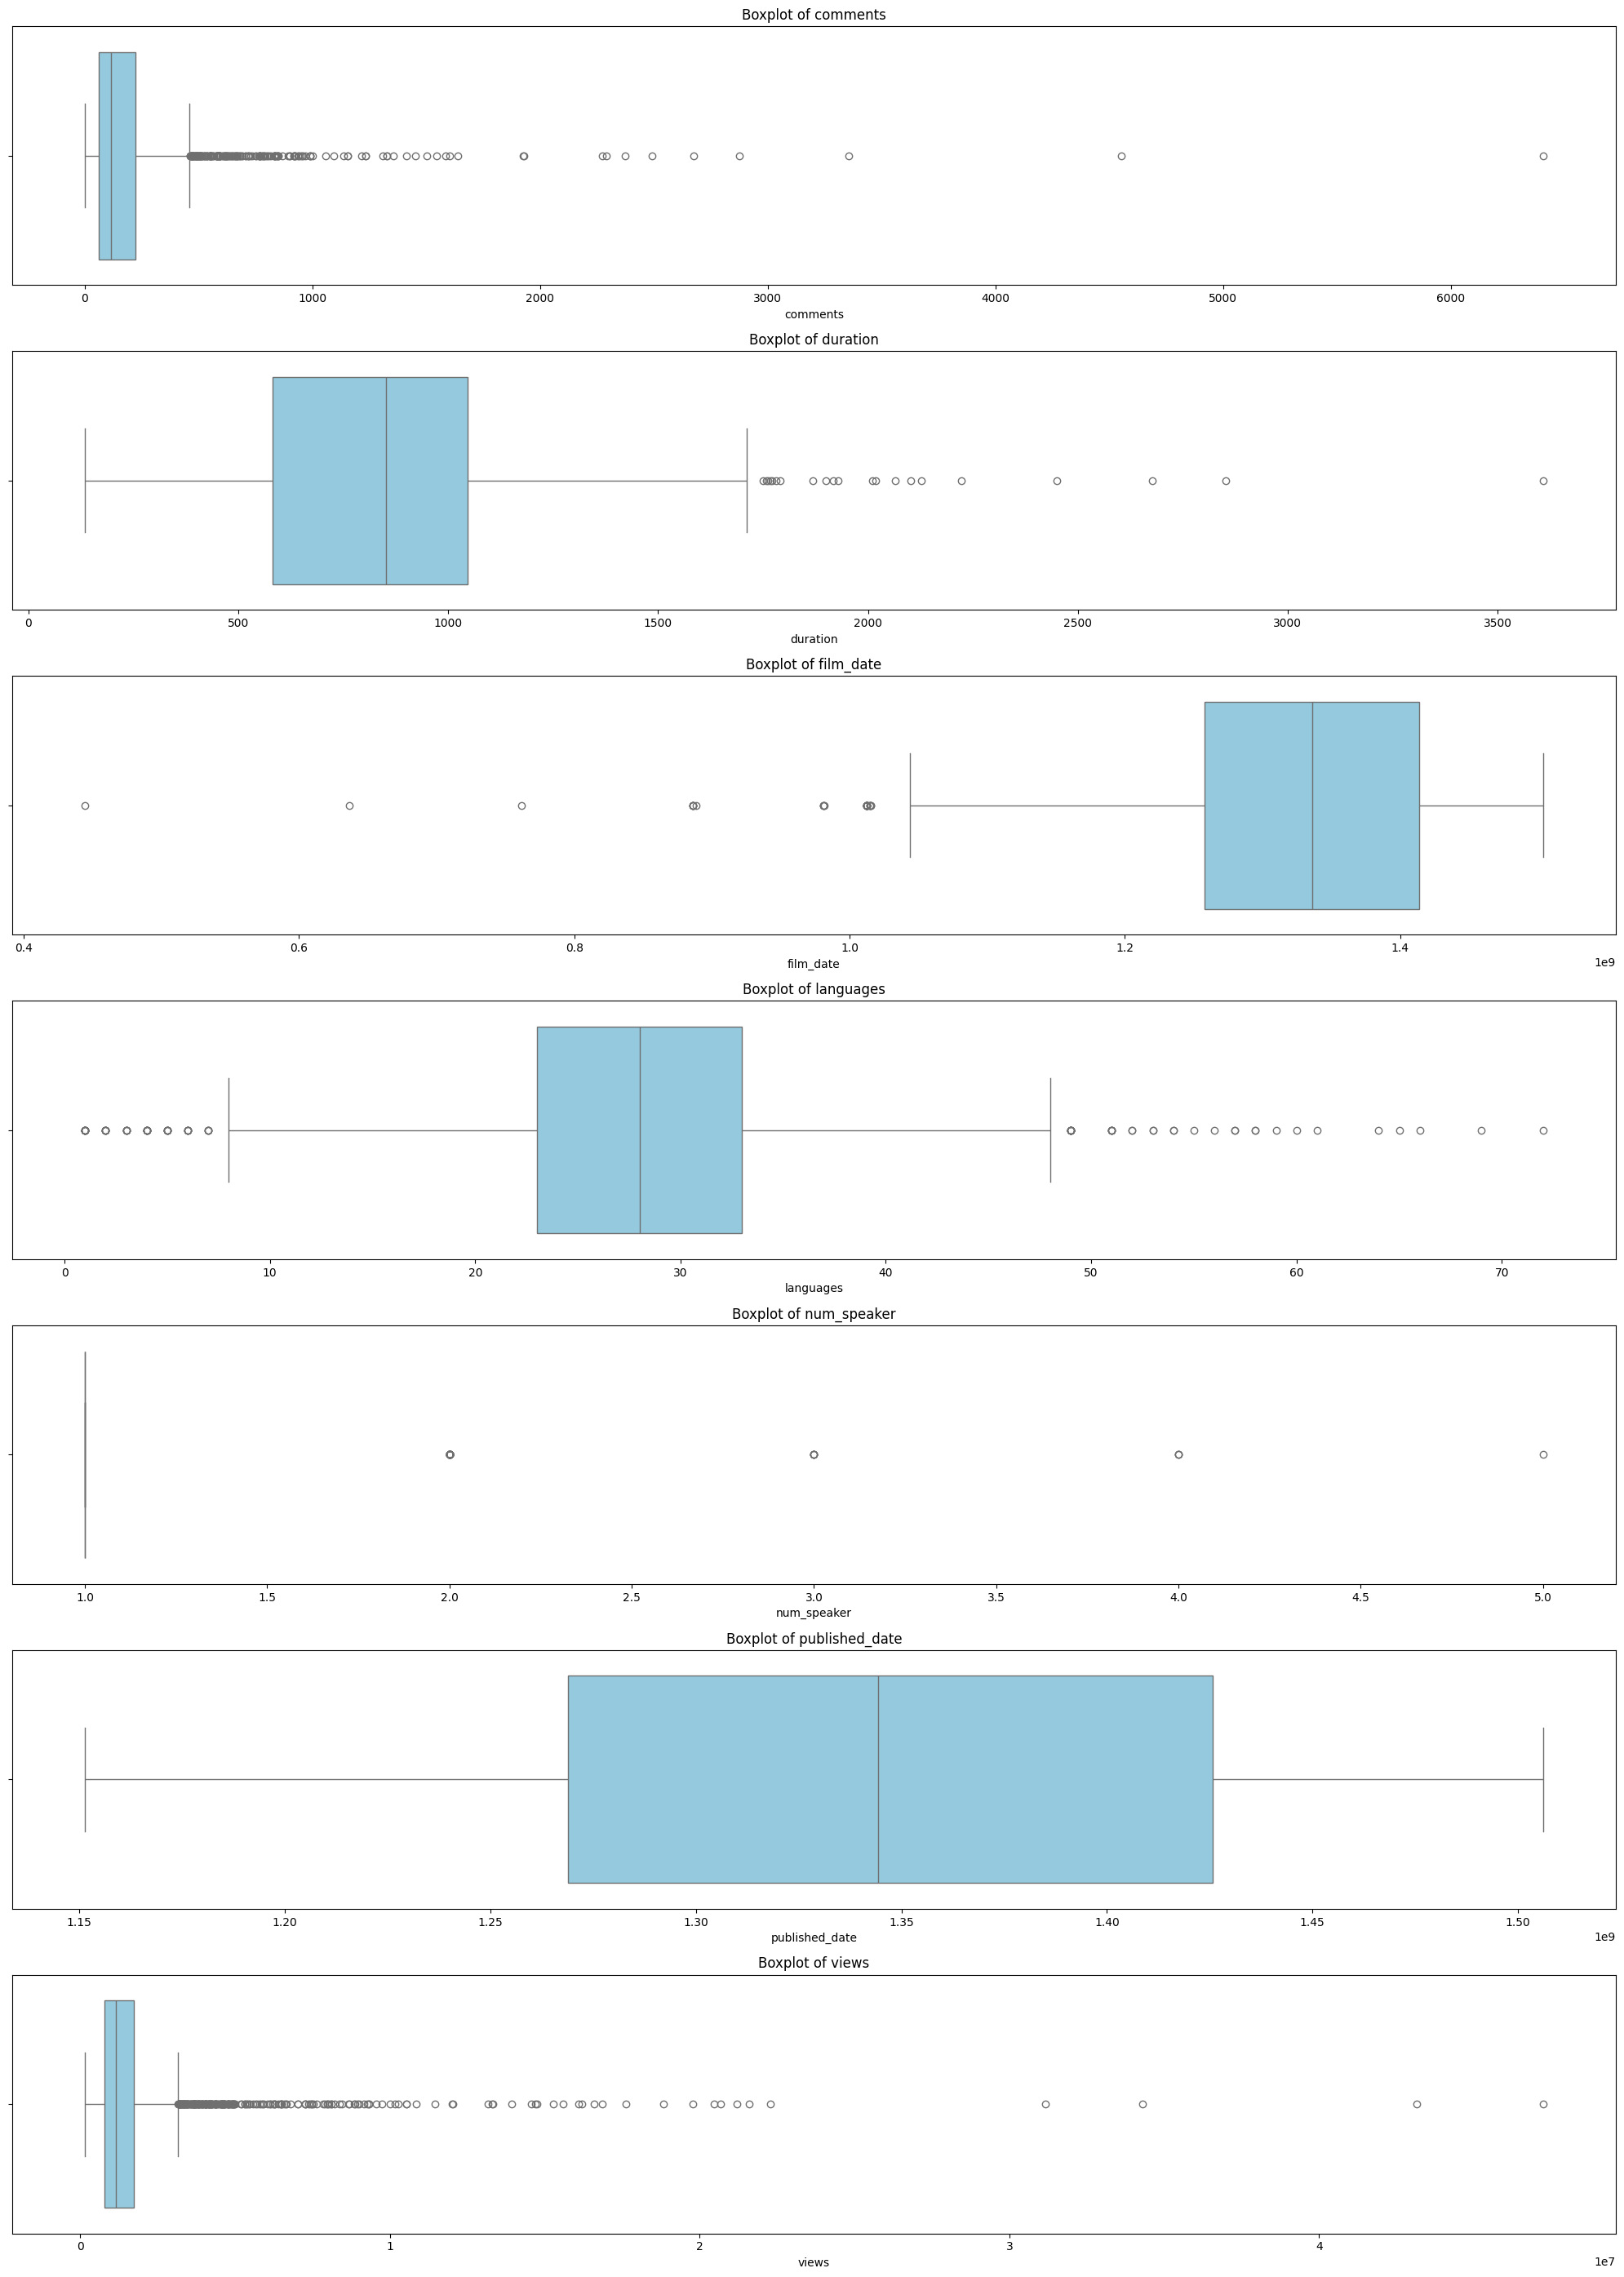

In [457]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Select numeric columns from the dataset
numeric_columns = merged_df.select_dtypes(include=['number']).columns

# Plot boxplots for all numeric columns to visualize outliers
plt.figure(figsize=(20, len(numeric_columns) * 4))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(len(numeric_columns), 1, i)
    sns.boxplot(x=merged_df[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
plt.tight_layout()
plt.show()


**Removing Outliers**

In [443]:
import pandas as pd

def remove_outliers(df):
    # Select numeric columns
    numeric_cols = df.select_dtypes(include=['number']).columns
    
    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    
    return df

# Remove outliers from the entire dataset
tedmain_cleaned = remove_outliers(merged_df)

# Verify the result
print(f"Original data size: {tedmain.shape}")
print(f"Cleaned data size: {tedmain_cleaned.shape}")

Original data size: (2550, 17)
Cleaned data size: (1925, 18)


**getting the no of days the talks where out for when the data was scraped**

scraping date 23-9-2017
days_out=scraping date- published date

In [273]:
import pandas as pd
from datetime import datetime

# Define the end date (24-9-2017)
end_date = datetime(2017, 9, 24)

# Function to calculate days_out
def calculate_days_out(published_timestamp):
    published_date = datetime.utcfromtimestamp(published_timestamp)
    return (end_date - published_date).days

# Apply the function to the DataFrame
merged_df['days_out'] = merged_df['published_date'].apply(calculate_days_out)

# Display the DataFrame
print(merged_df.head())

   comments                                        description  duration  \
0      4553  Sir Ken Robinson makes an entertaining and pro...      1164   
1       265  With the same humor and humanity he exuded in ...       977   
2       124  New York Times columnist David Pogue takes aim...      1286   
3       200  In an emotionally charged talk, MacArthur-winn...      1116   
4       593  You've never seen data presented like this. Wi...      1190   

     event   film_date  languages   main_speaker  \
0  TED2006  1140825600         60   Ken Robinson   
1  TED2006  1140825600         43        Al Gore   
2  TED2006  1140739200         26    David Pogue   
3  TED2006  1140912000         35  Majora Carter   
4  TED2006  1140566400         48   Hans Rosling   

                                            name  num_speaker  published_date  \
0      Ken Robinson: Do schools kill creativity?            1      1151367060   
1           Al Gore: Averting the climate crisis            1      1

C:\Users\arsal\AppData\Local\Temp\ipykernel_23892\4032650986.py:9: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  published_date = datetime.utcfromtimestamp(published_timestamp)


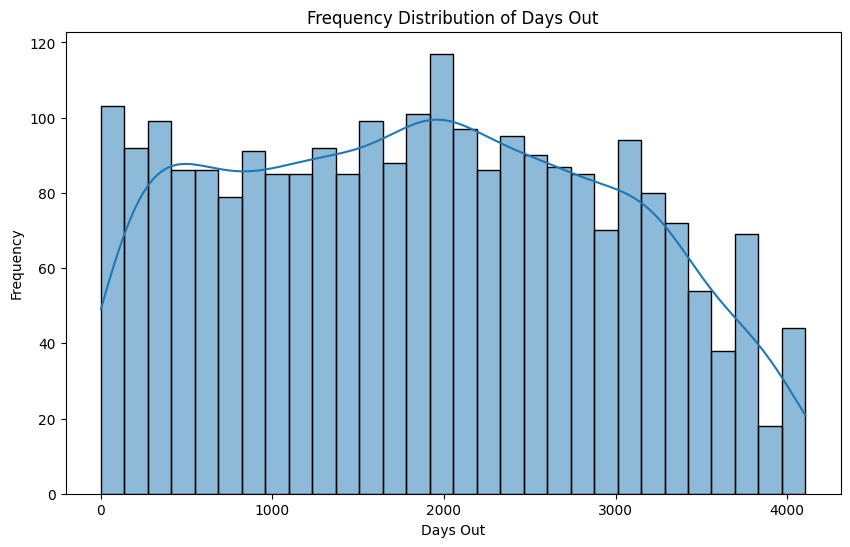

In [274]:
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['days_out'], bins=30, kde=True)
plt.title('Frequency Distribution of Days Out')
plt.xlabel('Days Out')
plt.ylabel('Frequency')
plt.show()

In [216]:
merged_df['days_out'].min()

1

getting the frequency distribution of number of speakers 

num_speaker
1    2412
2      46
3       5
4       3
5       1
Name: count, dtype: int64


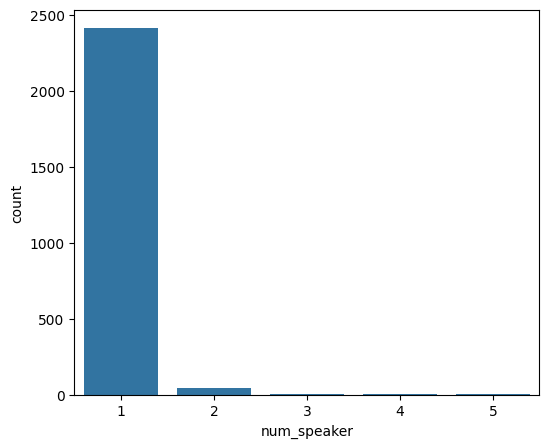

In [200]:
print(merged_df['num_speaker'].value_counts())
plt.figure(figsize=(6, 5))
sns.countplot(data=merged_df, x='num_speaker')
plt.show()

visaully analysing the diversity of speakers in our observation data

main_speaker
Hans Rosling         9
Juan Enriquez        7
Marco Tempest        6
Rives                6
Jonathan Haidt       5
                    ..
Dyan deNapoli        1
Mark Pagel           1
Adam Ostrow          1
Josette Sheeran      1
Karoliina Korppoo    1
Name: count, Length: 2088, dtype: int64 



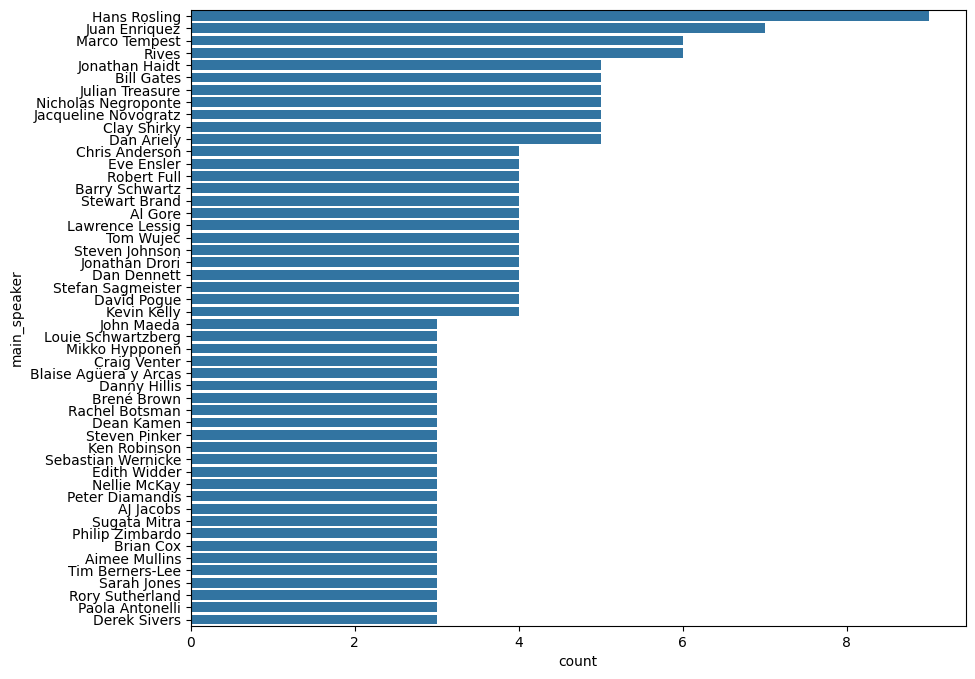

In [201]:
plt.figure(figsize=(10, 8))
sns.countplot(data=merged_df, y="main_speaker", order=merged_df['main_speaker'].value_counts().index[0:50])
print(merged_df['main_speaker'].value_counts(), '\n')

making sure that there is no repetition of talks in the data

In [202]:
merged_df[merged_df['main_speaker'] == "Hans Rosling"]

comments                                        description  duration  \
4          593  You've never seen data presented like this. Wi...      1190   
115        261  Researcher Hans Rosling uses his cool data too...      1137   
439        125  Hans Rosling unveils data visuals that untangl...       602   
493        122  Talking at the US State Department this summer...      1196   
547        276  Hans Rosling was a young guest student in Indi...       950   
696        607  The world's population will grow to 9 billion ...       604   
749        342  Hans Rosling reframes 10 years of UN data with...       934   
856        268  What was the greatest invention of the industr...       555   
1164       491  Hans Rosling had a question: Do some religions...       800   

              event   film_date  languages  main_speaker  \
4           TED2006  1140566400         48  Hans Rosling   
115         TED2007  1172880000         35  Hans Rosling   
439         TED2009  1233878400         40  Hans Rosling   
493       TED@State  1244073600         33  Hans Rosling   
547   TEDIndia 2009  1257292800         36  Hans Rosling   
696      TED@Cannes  1277078400         46  Hans Rosling   
749      TEDxChange  1284940800         33  Hans Rosling   
856   TEDWomen 2010  1291420800         46  Hans Rosling   
1164     TEDxSummit  1334534400         36  Hans Rosling   

                                                   name  num_speaker  \
4         Hans Rosling: The best stats you've ever seen            1   
115               Hans Rosling: New insights on poverty            1   
439   Hans Rosling: Insights on HIV, in stunning dat...            1   
493    Hans Rosling: Let my dataset change your mindset            1   
547           Hans Rosling: Asia's rise -- how and when            1   
696   Hans Rosling: Global population growth, box by...            1   
749   Hans Rosling: The good news of the decade? We'...            1   
856             Hans Rosling: The magic washing machine            1   
1164                 Hans Rosling: Religions and babies            1   

      published_date                                            ratings  \
4         1151440680  [{'id': 9, 'name': 'Ingenious', 'count': 3202}...   
115       1182762720  [{'id': 1, 'name': 'Beautiful', 'count': 218},...   
439       1242197400  [{'id': 23, 'name': 'Jaw-dropping', 'count': 9...   
493       1251334800  [{'id': 22, 'name': 'Fascinating', 'count': 61...   
547       1258938000  [{'id': 22, 'name': 'Fascinating', 'count': 77...   
696       1278663300  [{'id': 22, 'name': 'Fascinating', 'count': 76...   
749       1286442720  [{'id': 8, 'name': 'Informative', 'count': 554...   
856       1300714380  [{'id': 9, 'name': 'Ingenious', 'count': 457},...   
1164      1337698856  [{'id': 22, 'name': 'Fascinating', 'count': 86...   

                                          related_talks  \
4     [{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...   
115   [{'id': 494, 'hero': 'https://pe.tedcdn.com/im...   
439   [{'id': 499, 'hero': 'https://pe.tedcdn.com/im...   
493   [{'id': 92, 'hero': 'https://pe.tedcdn.com/ima...   
547   [{'id': 92, 'hero': 'https://pe.tedcdn.com/ima...   
696   [{'id': 695, 'hero': 'https://pe.tedcdn.com/im...   
749   [{'id': 540, 'hero': 'https://pe.tedcdn.com/im...   
856   [{'id': 620, 'hero': 'https://pe.tedcdn.com/im...   
1164  [{'id': 1418, 'hero': 'https://pe.tedcdn.com/i...   

                        speaker_occupation  \
4     Global health expert; data visionary   
115   Global health expert; data visionary   
439   Global health expert; data visionary   
493   Global health expert; data visionary   
547   Global health expert; data visionary   
696   Global health expert; data visionary   
749   Global health expert; data visionary   
856   Global health expert; data visionary   
1164  Global health expert; data visionary   

                                                   tags  \
4     ['Africa', 'Asia', 'Googl

Having a look at the how raitings and tags are categorised.( side note: They can be use later for analysing what kind of talks are more popular , like is a talk which was inspirational tends to be more popular?)

In [203]:
merged_df['ratings'].head

<bound method NDFrame.head of 0       [{'id': 7, 'name': 'Funny', 'count': 19645}, {...
1       [{'id': 7, 'name': 'Funny', 'count': 544}, {'i...
2       [{'id': 7, 'name': 'Funny', 'count': 964}, {'i...
3       [{'id': 3, 'name': 'Courageous', 'count': 760}...
4       [{'id': 9, 'name': 'Ingenious', 'count': 3202}...
                              ...                        
2462    [{'id': 3, 'name': 'Courageous', 'count': 24},...
2463    [{'id': 22, 'name': 'Fascinating', 'count': 32...
2464    [{'id': 1, 'name': 'Beautiful', 'count': 14}, ...
2465    [{'id': 11, 'name': 'Longwinded', 'count': 3},...
2466    [{'id': 21, 'name': 'Unconvincing', 'count': 2...
Name: ratings, Length: 2467, dtype: object>

Unique Rating Categories:
{'Ingenious', 'Jaw-dropping', 'Inspiring', 'Informative', 'Funny', 'Unconvincing', 'Confusing', 'OK', 'Longwinded', 'Courageous', 'Obnoxious', 'Fascinating', 'Persuasive', 'Beautiful'}


C:\Users\arsal\AppData\Local\Temp\ipykernel_23892\4069158353.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Rating', y='Count', data=rating_counts_df, palette='viridis')


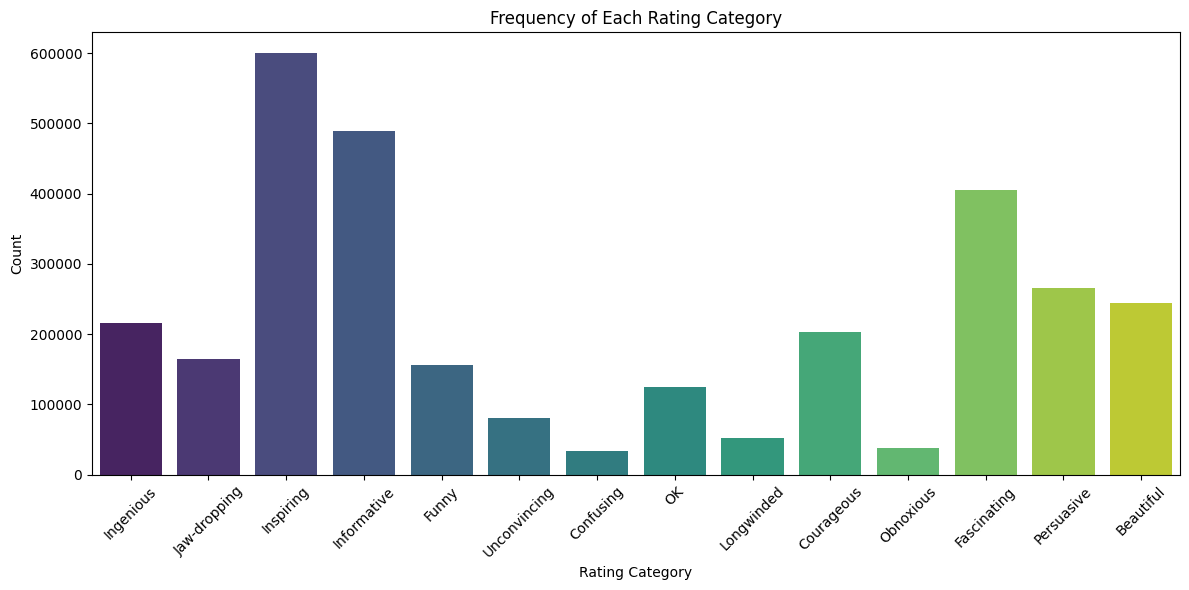

In [204]:
import ast

# Extract unique rating categories
rating_categories = set()
for rating_list in tedmain_cleaned['ratings']:
    ratings = ast.literal_eval(rating_list)
    for rating in ratings:
        rating_categories.add(rating['name'])

# Display the unique rating categories
print("Unique Rating Categories:")
print(rating_categories)

# Plot the frequency of each rating category
rating_counts = {category: 0 for category in rating_categories}

for rating_list in tedmain_cleaned['ratings']:
    ratings = ast.literal_eval(rating_list)
    for rating in ratings:
        rating_counts[rating['name']] += rating['count']

# Convert the dictionary to a pandas DataFrame for plotting
rating_counts_df = pd.DataFrame(list(rating_counts.items()), columns=['Rating', 'Count'])

# Plot the data
plt.figure(figsize=(12, 6))
sns.barplot(x='Rating', y='Count', data=rating_counts_df, palette='viridis')
plt.title('Frequency of Each Rating Category')
plt.xlabel('Rating Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**feature engineering**

here we use TED talk ratings to calculate and normalize a rating score for each video.
Variables:
    - positive_ratings: List of rating categories considered positive.
    - neutral_ratings: List of rating categories considered neutral.
    - negative_ratings: List of rating categories considered negative.

Functions:
    - calculate_rating_score(ratings): Calculates the rating score by summing the counts of positive ratings and subtracting the counts of negative ratings.

Process:
    1. Define positive, neutral, and negative rating categories.

    2. Define a function to calculate the rating score based on the counts of positive and negative ratings.

    3. Apply the function to calculate the rating score for each video in the 'tedmain_cleaned' DataFrame.

    4. Normalize the rating score using StandardScaler so that 0 represents a neutral rating.

    5. Display the first few rows of the DataFrame to verify the new columns 'rating_score' and 
    'normalized_rating_score'.


In [474]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Define positive, neutral, and negative rating categories
positive_ratings = ['Funny','Inspiring', 'Ingenious', 'Jaw-dropping', 'Beautiful', 'Courageous', 'Fascinating', 'Persuasive', 'Informative']
neutral_ratings = ['OK']
negative_ratings = ['Unconvincing', 'Confusing', 'Longwinded', 'Obnoxious']

# Function to calculate the rating score
def calculate_rating_score(ratings):
    positive_score = sum(rating['count'] for rating in ratings if rating['name'] in positive_ratings)
    negative_score = sum(rating['count'] for rating in ratings if rating['name'] in negative_ratings)
    return positive_score - negative_score

# Apply the function to calculate the rating score for each video
tedmain_cleaned['rating_score'] = tedmain_cleaned['ratings'].apply(lambda x: calculate_rating_score(eval(x)))

# Normalize the rating score so that 0 represents neutral
scaler = StandardScaler()
tedmain_cleaned['normalized_rating_score'] = scaler.fit_transform(tedmain_cleaned[['rating_score']])

# Display the first few rows to verify the new columns
tedmain_cleaned[['ratings', 'rating_score', 'normalized_rating_score']].head()


ratings  rating_score  \
2   [{'id': 7, 'name': 'Funny', 'count': 964}, {'i...          1976   
3   [{'id': 3, 'name': 'Courageous', 'count': 760}...          3331   
7   [{'id': 9, 'name': 'Ingenious', 'count': 195},...           797   
10  [{'id': 3, 'name': 'Courageous', 'count': 169}...          1589   
11  [{'id': 1, 'name': 'Beautiful', 'count': 70}, ...           490   

    normalized_rating_score  
2                  0.603318  
3                  1.849643  
7                 -0.481123  
10                 0.247356  
11                -0.763501

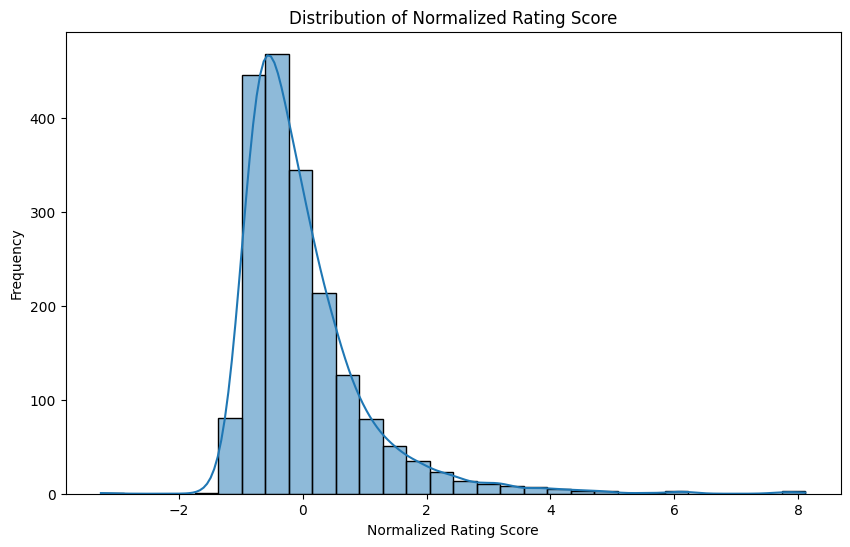

In [206]:
plt.figure(figsize=(10, 6))
sns.histplot(tedmain_cleaned['normalized_rating_score'], bins=30, kde=True)
plt.title('Distribution of Normalized Rating Score')
plt.xlabel('Normalized Rating Score')
plt.ylabel('Frequency')
plt.show()

In [207]:
tedmain_cleaned['ratings'][7]

"[{'id': 9, 'name': 'Ingenious', 'count': 195}, {'id': 1, 'name': 'Beautiful', 'count': 98}, {'id': 11, 'name': 'Longwinded', 'count': 26}, {'id': 3, 'name': 'Courageous', 'count': 34}, {'id': 21, 'name': 'Unconvincing', 'count': 26}, {'id': 10, 'name': 'Inspiring', 'count': 175}, {'id': 8, 'name': 'Informative', 'count': 121}, {'id': 22, 'name': 'Fascinating', 'count': 153}, {'id': 2, 'name': 'Confusing', 'count': 25}, {'id': 24, 'name': 'Persuasive', 'count': 37}, {'id': 25, 'name': 'OK', 'count': 63}, {'id': 23, 'name': 'Jaw-dropping', 'count': 57}, {'id': 7, 'name': 'Funny', 'count': 9}, {'id': 26, 'name': 'Obnoxious', 'count': 5}]"

In [208]:
tedmain['tags'].head

<bound method NDFrame.head of 0       ['children', 'creativity', 'culture', 'dance',...
1       ['alternative energy', 'cars', 'climate change...
2       ['computers', 'entertainment', 'interface desi...
3       ['MacArthur grant', 'activism', 'business', 'c...
4       ['Africa', 'Asia', 'Google', 'demo', 'economic...
                              ...                        
2545    ['TED Residency', 'United States', 'community'...
2546    ['Mars', 'South America', 'TED Fellows', 'astr...
2547    ['AI', 'ants', 'fish', 'future', 'innovation',...
2548    ['Internet', 'TEDx', 'United States', 'communi...
2549    ['cities', 'design', 'future', 'infrastructure...
Name: tags, Length: 2550, dtype: object>

KDE Plot: A KDE plot is a way to estimate the probability density function of a continuous random variable. It provides a smoothed curve that represents the distribution of the data.

C:\Users\arsal\AppData\Local\Temp\ipykernel_23892\2536500177.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=tedmain['views'], shade=True)


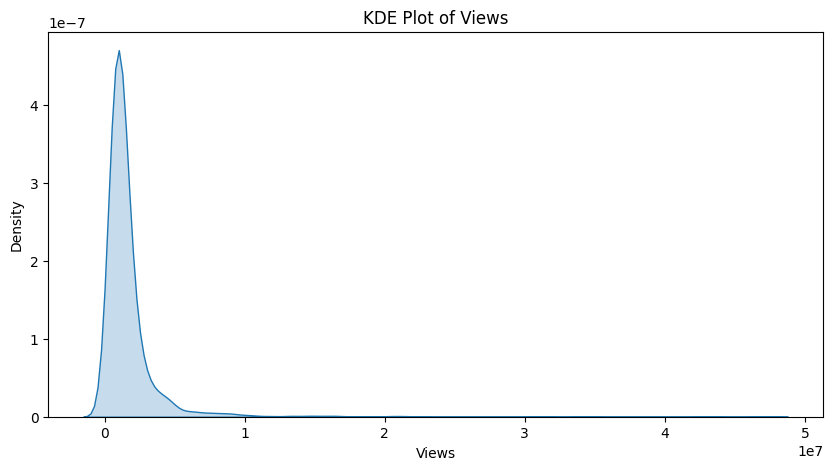

In [127]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.kdeplot(data=tedmain['views'], shade=True)
plt.title('KDE Plot of Views')
plt.xlabel('Views')
plt.ylabel('Density')
plt.show()

C:\Users\arsal\AppData\Local\Temp\ipykernel_23892\1180422349.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=tedmain_cleaned['views'], shade=True)


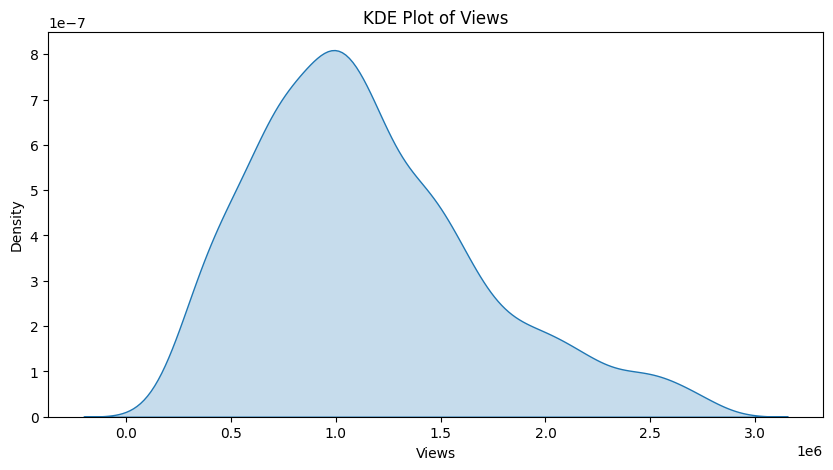

In [62]:
plt.figure(figsize=(10, 5))
sns.kdeplot(data=tedmain_cleaned['views'], shade=True)
plt.title('KDE Plot of Views')
plt.xlabel('Views')
plt.ylabel('Density')
plt.show()

**creating popularity and feedback matrix used for our analysis**

popularity=(views)/(days_out)

feedback=no.comments + no. of ratings



In [450]:
import pandas as pd
from datetime import datetime

# Load your dataset
df = tedmain_cleaned

# Ensure 'days_out' column exists
if 'days_out' not in df.columns:
	end_date = datetime(2017, 9, 24)
	df['days_out'] = df['published_date'].apply(lambda x: (end_date - datetime.utcfromtimestamp(x)).days)

# Calculate popularity (views per day)
df['Popularity'] = df['views'] / df['days_out']

# Calculate feedback as the sum of comments and the number of ratings
df['feedback'] = df['comments'] + df['ratings'].apply(lambda x: sum([rating['count'] for rating in eval(x)]))

tedmain_cleaned = df

# Display the first few rows to verify the new column
tedmain_cleaned.head()

C:\Users\arsal\AppData\Local\Temp\ipykernel_23892\2198311448.py:10: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  df['days_out'] = df['published_date'].apply(lambda x: (end_date - datetime.utcfromtimestamp(x)).days)


comments                                        description  duration  \
2        124  New York Times columnist David Pogue takes aim...      1286   
3        200  In an emotionally charged talk, MacArthur-winn...      1116   
7         46  Architect Joshua Prince-Ramus takes the audien...      1198   
10        79  Accepting his 2006 TED Prize, Cameron Sinclair...      1414   
11        55  Jehane Noujaim unveils her 2006 TED Prize wish...      1538   

      event   film_date  languages         main_speaker  \
2   TED2006  1140739200         26          David Pogue   
3   TED2006  1140912000         35        Majora Carter   
7   TED2006  1140652800         19  Joshua Prince-Ramus   
10  TED2006  1140912000         27     Cameron Sinclair   
11  TED2006  1140912000         20       Jehane Noujaim   

                                                 name  num_speaker  \
2                       David Pogue: Simplicity sells            1   
3                  Majora Carter: Greening the ghetto            1   
7   Joshua Prince-Ramus: Behind the design of Seat...            1   
10  Cameron Sinclair: My wish: A call for open-sou...            1   
11      Jehane Noujaim: My wish: A global day of film            1   

    published_date  ...                                               tags  \
2       1151367060  ...  ['computers', 'entertainment', 'interface desi...   
3       1151367060  ...  ['MacArthur grant', 'activism', 'business', 'c...   
7       1152490260  ...  ['architecture', 'collaboration', 'culture', '...   
10      1153786260  ...  ['activism', 'architecture', 'collaboration', ...   
11      1153786260  ...  ['TED Prize', 'art', 'culture', 'entertainment...   

                                           title  \
2                               Simplicity sells   
3                            Greening the ghetto   
7         Behind the design of Seattle's library   
10  My wish: A call for open-source architecture   
11                 My wish: A global day of film   

                                                  url    views  \
2   https://www.ted.com/talks/david_pogue_says_sim...  1636292   
3   https://www.ted.com/talks/majora_carter_s_tale...  1697550   
7   https://www.ted.com/talks/joshua_prince_ramus_...   967741   
10  https://www.ted.com/talks/cameron_sinclair_on_...  1211416   
11  https://www.ted.com/talks/jehane_noujaim_inspi...   387877   

                                           transcript        text_tense  \
2   (Music: "The Sound of Silence," Simon & Garfun...           present   
3   If you're here today — and I'm very happy that...  present and past   
7   I'm going to present three projects in rapid f...           present   
10  I'm going to take you on a journey very quickl...  present and past   
11  I can't help but this wish: to think about whe...  present and past   

    published_year days_out  Popularity  feedback  
2             2006     4106  398.512421      2948  
3             2006     4106  413.431564      3928  
7             2006     4093  236.438065      1070  
10            2006     4078  297.061305      1859  
11            2006     4078   95.114517       647  

[5 rows x 23 columns]

In [222]:
tedmain_cleaned['Popularity'].min()

54.29605668515096

C:\Users\arsal\AppData\Local\Temp\ipykernel_23892\2550464989.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=tedmain_cleaned['Popularity'], shade=True)


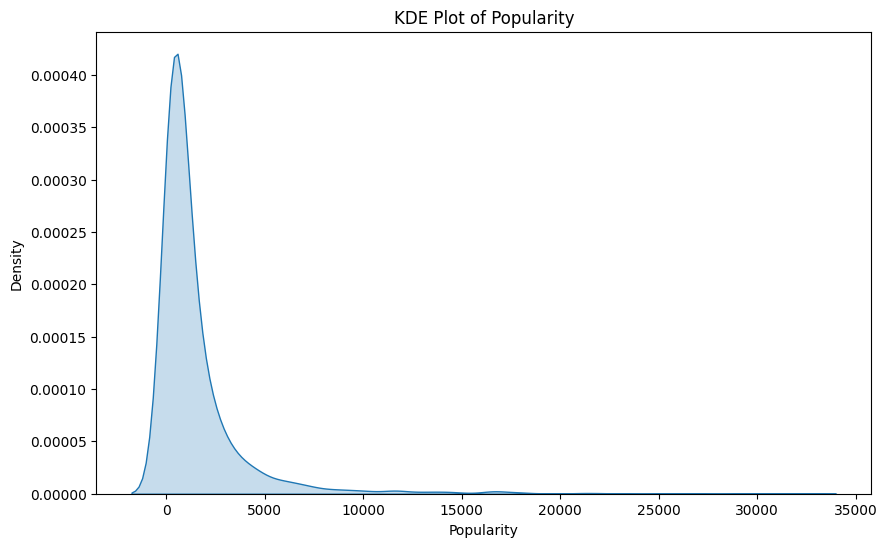

In [451]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=tedmain_cleaned['Popularity'], shade=True)
plt.title('KDE Plot of Popularity')
plt.xlabel('Popularity')
plt.ylabel('Density')
plt.show()

**Feature engineering**

creating title_flesch_kincaid_grade_level matrix and title_sentiment_score

matrix also calculating title word count

In [521]:
# Create a new column 'title_length' that stores the length of each title
tedmain_cleaned['title_length'] = tedmain_cleaned['title'].apply(len)

# Display the first few rows to verify the new column
tedmain_cleaned[['title', 'title_length']].head()
# Create a new column 'title_word_count' that stores the word count of each title
tedmain_cleaned['title_word_count'] = tedmain_cleaned['title'].apply(lambda x: len(x.split()))

# Create a new column 'title_flesch_kincaid_grade_level' that stores the Flesch-Kincaid Grade Level of each title
tedmain_cleaned['title_flesch_kincaid_grade_level'] = tedmain_cleaned['title'].apply(flesch_kincaid_grade)

# Create a new column 'title_sentiment_score' that stores the sentiment polarity score of each title
tedmain_cleaned['title_sentiment_score'] = tedmain_cleaned['title'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Display the first few rows to verify the new columns
tedmain_cleaned[['title', 'title_word_count', 'title_flesch_kincaid_grade_level', 'title_sentiment_score']].head()

title  title_word_count  \
2                               Simplicity sells                 2   
3                            Greening the ghetto                 3   
7         Behind the design of Seattle's library                 6   
10  My wish: A call for open-source architecture                 7   
11                 My wish: A global day of film                 7   

    title_flesch_kincaid_grade_level  title_sentiment_score  
2                               14.7                    0.0  
3                                5.6                    0.0  
7                                6.8                   -0.4  
10                               6.0                    0.0  
11                               0.1                    0.0

**variable tag count**

In [520]:
# Create a new column 'tag_count' that stores the number of tags for each TED talk
tedmain_cleaned['tag_count'] = tedmain_cleaned['tags'].apply(lambda x: len(eval(x)))

# Display the first few rows to verify the new column
tedmain_cleaned[['tags', 'tag_count']].head()

tags  tag_count
2   ['computers', 'entertainment', 'interface desi...          9
3   ['MacArthur grant', 'activism', 'business', 'c...          9
7   ['architecture', 'collaboration', 'culture', '...          5
10  ['activism', 'architecture', 'collaboration', ...         10
11  ['TED Prize', 'art', 'culture', 'entertainment...         10

**Feature engineering**

creating description_flesch_kincaid_grade_level variable and description_sentiment_score

also calculating description word count

In [522]:
import pandas as pd
from textstat import flesch_kincaid_grade
from textblob import TextBlob

# Create a new column 'description_word_count' that stores the word count of each description
tedmain_cleaned['description_word_count'] = tedmain_cleaned['description'].apply(lambda x: len(x.split()))

# Create a new column 'description_flesch_kincaid_grade_level' that stores the Flesch-Kincaid Grade Level of each description
tedmain_cleaned['description_flesch_kincaid_grade_level'] = tedmain_cleaned['description'].apply(flesch_kincaid_grade)

# Create a new column 'description_sentiment_score' that stores the sentiment polarity score of each description
tedmain_cleaned['description_sentiment_score'] = tedmain_cleaned['description'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Display the first few rows to verify the new columns
tedmain_cleaned[['description', 'description_word_count', 'description_flesch_kincaid_grade_level', 'description_sentiment_score']].head()

description  description_word_count  \
2   New York Times columnist David Pogue takes aim...                      31   
3   In an emotionally charged talk, MacArthur-winn...                      31   
7   Architect Joshua Prince-Ramus takes the audien...                      32   
10  Accepting his 2006 TED Prize, Cameron Sinclair...                      36   
11  Jehane Noujaim unveils her 2006 TED Prize wish...                      23   

    description_flesch_kincaid_grade_level  description_sentiment_score  
2                                      8.2                    -0.081981  
3                                     17.4                     0.000000  
7                                     15.8                     0.250000  
10                                    10.3                    -0.025000  
11                                     8.7                     0.000000

C:\Users\arsal\AppData\Local\Temp\ipykernel_23892\4021098222.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=tedmain_cleaned['description_sentiment_score'], shade=True)


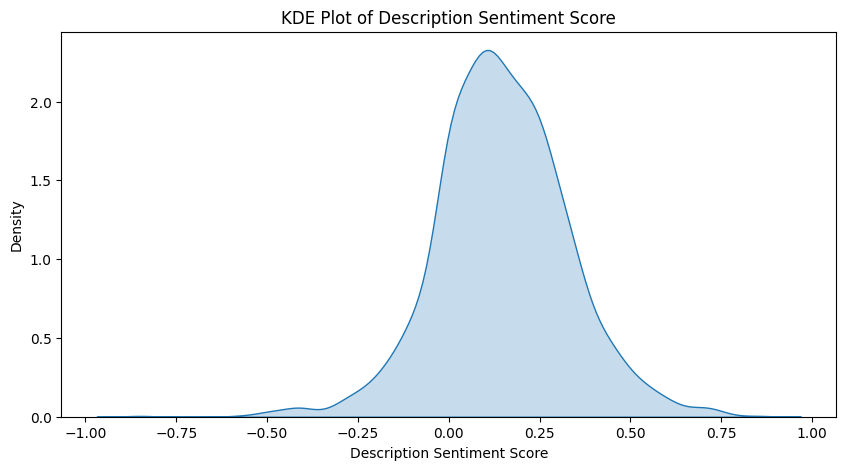

In [89]:
plt.figure(figsize=(10, 5))
sns.kdeplot(data=tedmain_cleaned['description_sentiment_score'], shade=True)
plt.title('KDE Plot of Description Sentiment Score')
plt.xlabel('Description Sentiment Score')
plt.ylabel('Density')
plt.show()

Initial analysis

C:\Users\arsal\AppData\Local\Temp\ipykernel_23892\728418816.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=occupation_views.values, y=occupation_views.index, palette='viridis')


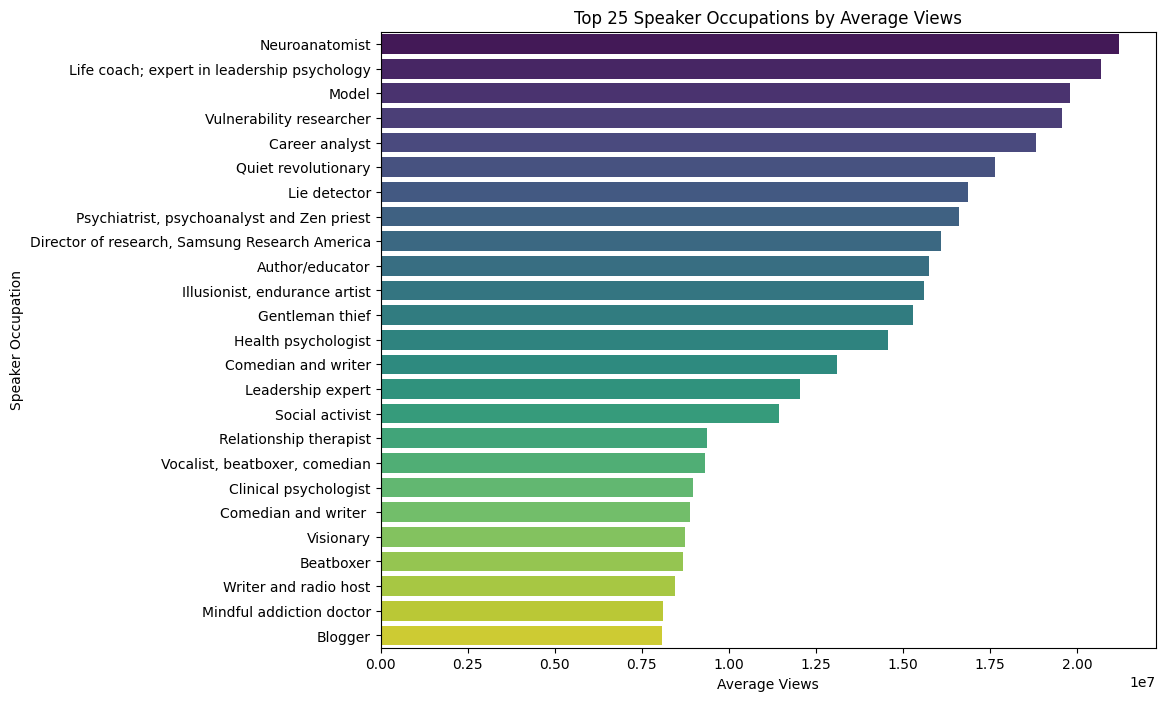

C:\Users\arsal\AppData\Local\Temp\ipykernel_23892\728418816.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=occupation_frequency.values, y=occupation_frequency.index, palette='viridis')


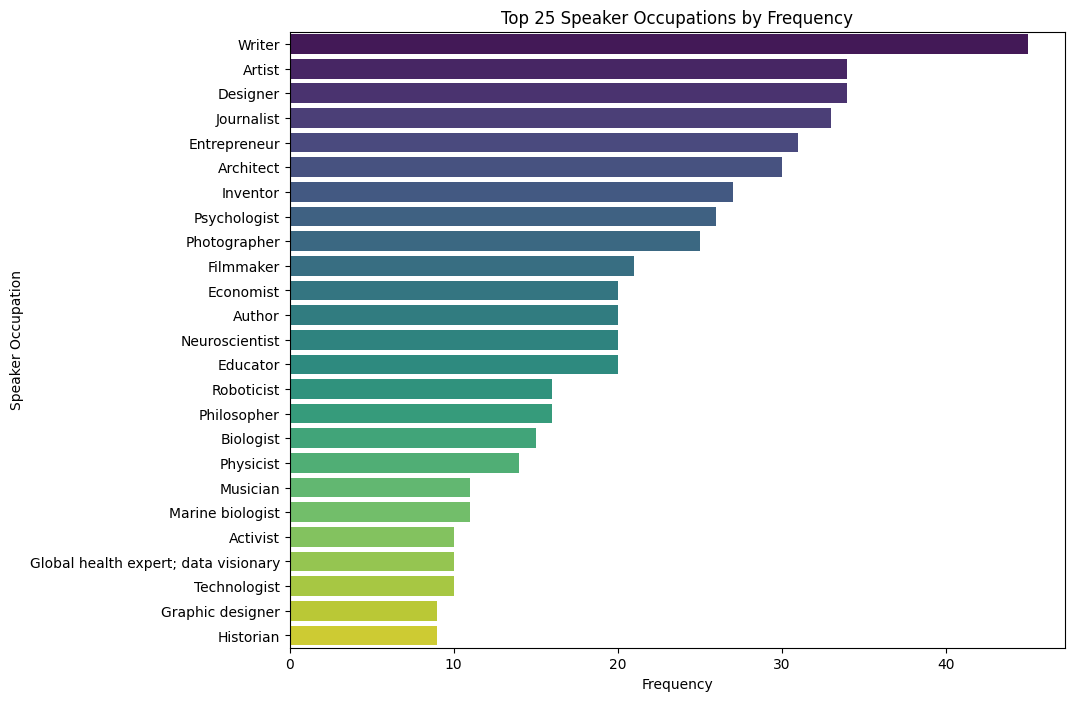

In [ ]:

# Calculate the average views for each speaker occupation
occupation_views = tedmain.groupby('speaker_occupation')['views'].mean().sort_values(ascending=False).head(25)

# Plot the data
plt.figure(figsize=(10, 8))
sns.barplot(x=occupation_views.values, y=occupation_views.index, palette='viridis')
plt.title('Top 25 Speaker Occupations by Average Views')
plt.xlabel('Average Views')
plt.ylabel('Speaker Occupation')
plt.show()
# Calculate the frequency of each speaker occupation
occupation_frequency = tedmain['speaker_occupation'].value_counts().head(25)

# Plot the frequency of speaker occupations
plt.figure(figsize=(10, 8))
sns.barplot(x=occupation_frequency.values, y=occupation_frequency.index, palette='viridis')
plt.title('Top 25 Speaker Occupations by Frequency')
plt.xlabel('Frequency')
plt.ylabel('Speaker Occupation')
plt.show()

checking for correlation btw numeric variables 

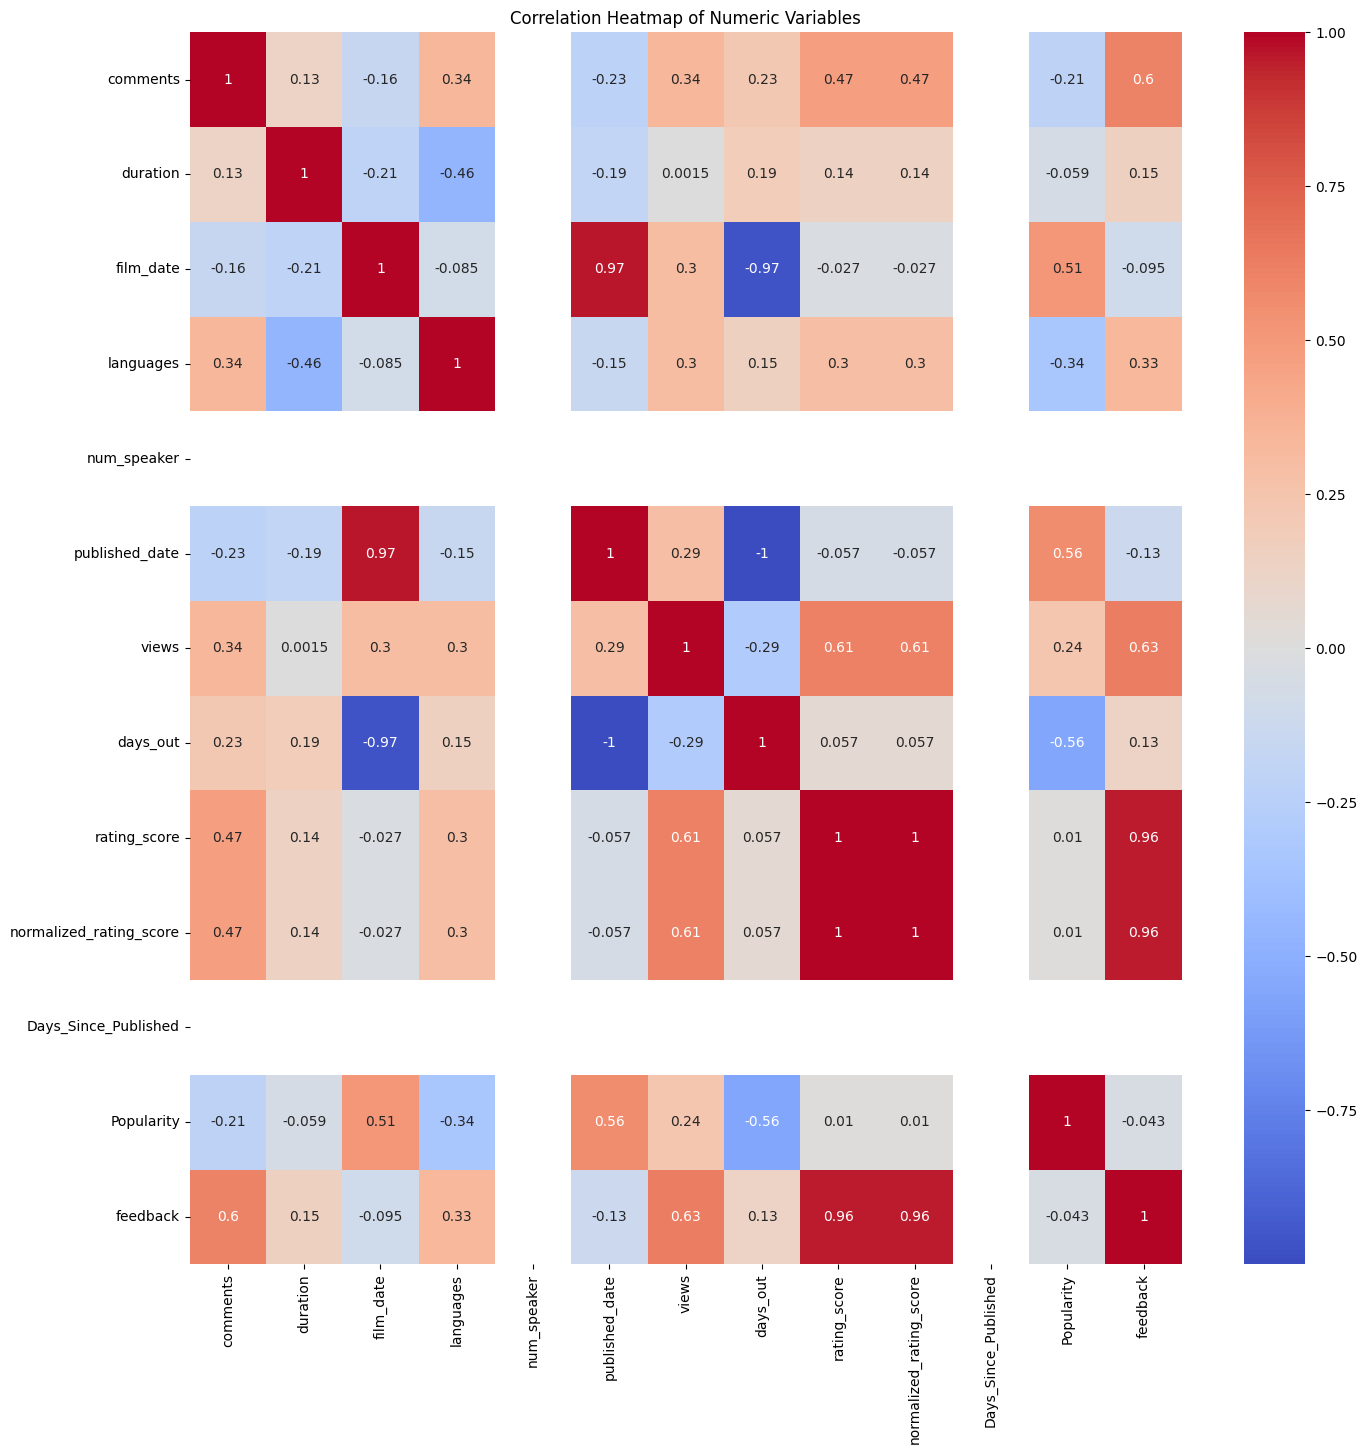

In [223]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

numeric_df = tedmain_cleaned.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(16, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap of Numeric Variables")
plt.show()




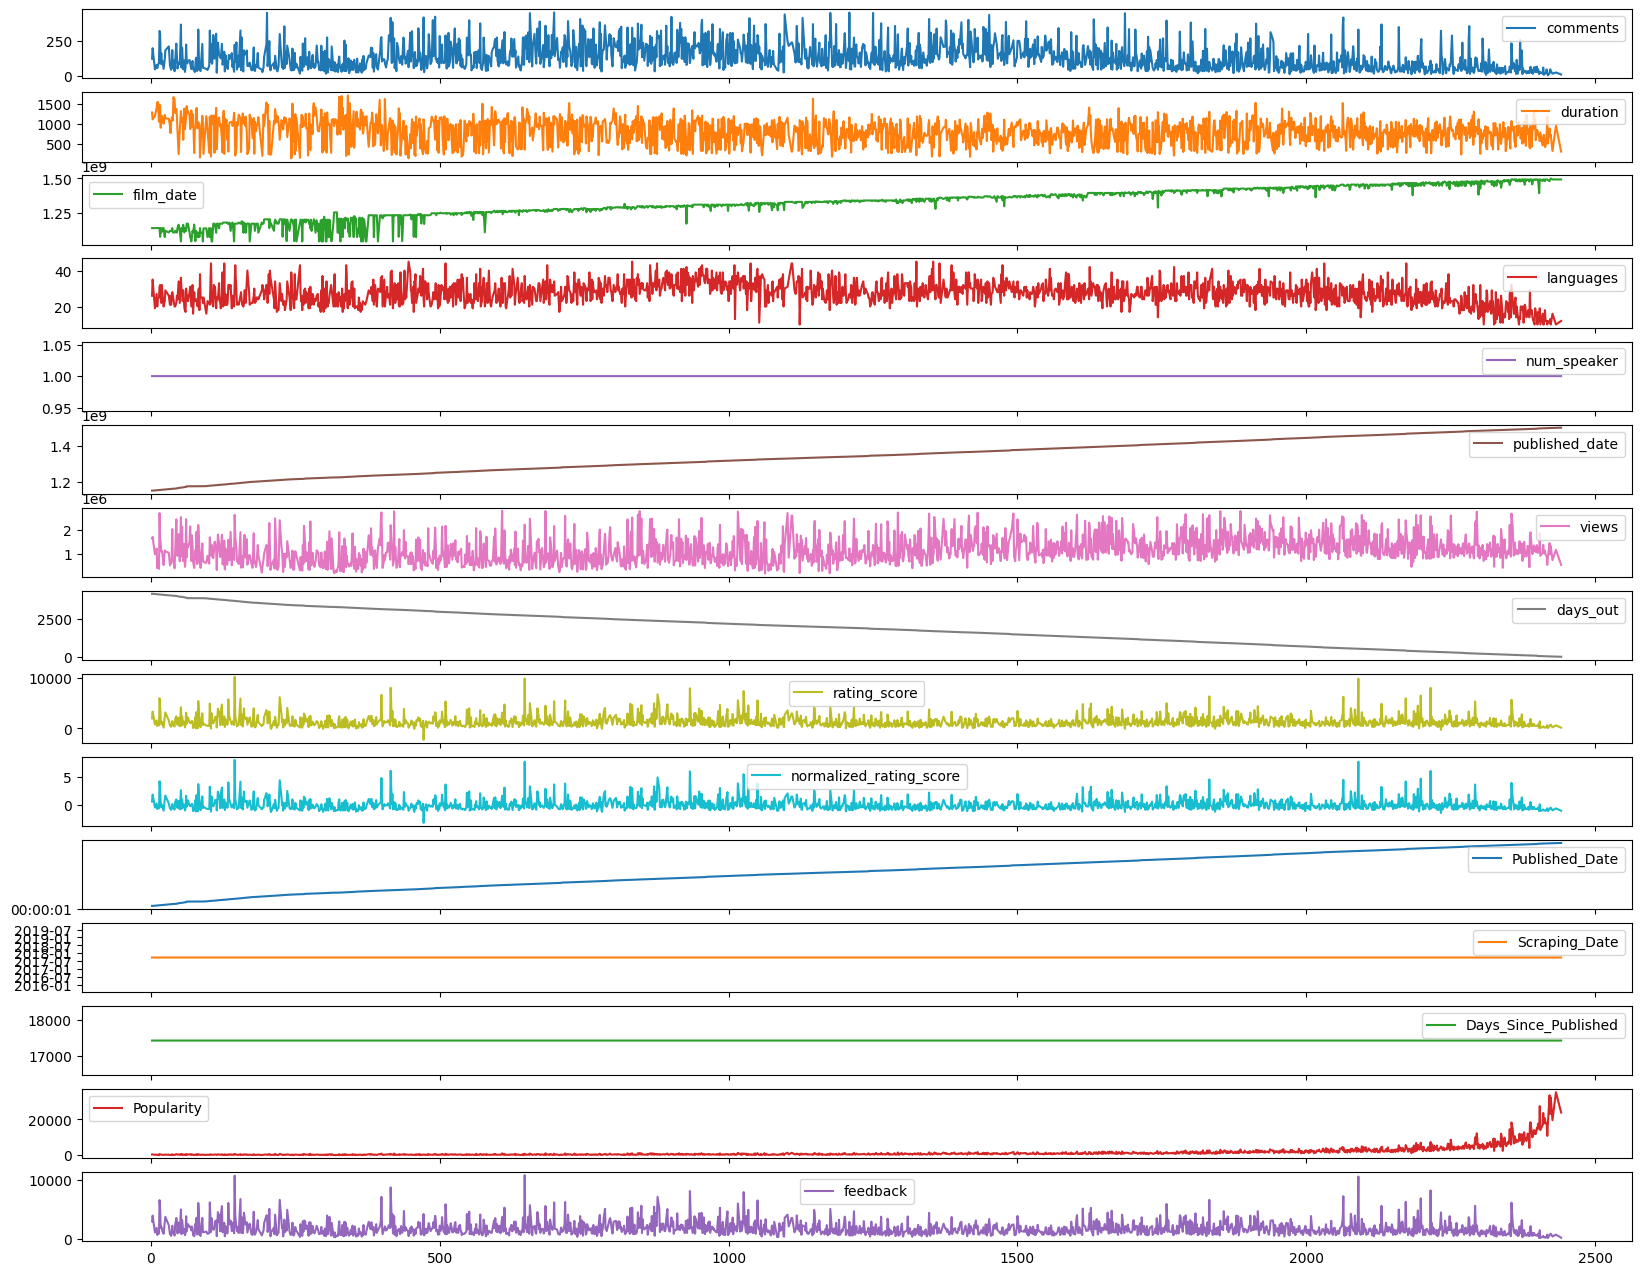

In [224]:
tedmain_cleaned.plot(subplots=True, figsize=(20,16))
plt.show()

from the above graph we can see that popularity is more for newer content. But as we can see views also increase on average for newer content.
and other intresting thing is that thare is a decrese in the number of language the talk is available on near the end it can mean that it takes a while for the talk to be availabel in different languages.


In [225]:
tedmain_cleaned.head()

comments                                        description  duration  \
2        124  New York Times columnist David Pogue takes aim...      1286   
3        200  In an emotionally charged talk, MacArthur-winn...      1116   
7         46  Architect Joshua Prince-Ramus takes the audien...      1198   
10        79  Accepting his 2006 TED Prize, Cameron Sinclair...      1414   
11        55  Jehane Noujaim unveils her 2006 TED Prize wish...      1538   

      event   film_date  languages         main_speaker  \
2   TED2006  1140739200         26          David Pogue   
3   TED2006  1140912000         35        Majora Carter   
7   TED2006  1140652800         19  Joshua Prince-Ramus   
10  TED2006  1140912000         27     Cameron Sinclair   
11  TED2006  1140912000         20       Jehane Noujaim   

                                                 name  num_speaker  \
2                       David Pogue: Simplicity sells            1   
3                  Majora Carter: Greening the ghetto            1   
7   Joshua Prince-Ramus: Behind the design of Seat...            1   
10  Cameron Sinclair: My wish: A call for open-sou...            1   
11      Jehane Noujaim: My wish: A global day of film            1   

    published_date  ...    views  \
2       1151367060  ...  1636292   
3       1151367060  ...  1697550   
7       1152490260  ...   967741   
10      1153786260  ...  1211416   
11      1153786260  ...   387877   

                                           transcript days_out rating_score  \
2   (Music: "The Sound of Silence," Simon & Garfun...     4103         1976   
3   If you're here today — and I'm very happy that...     4103         3331   
7   I'm going to present three projects in rapid f...     4090          797   
10  I'm going to take you on a journey very quickl...     4075         1589   
11  I can't help but this wish: to think about whe...     4075          490   

   normalized_rating_score                Published_Date  Scraping_Date  \
2                 0.603318 1970-01-01 00:00:01.151367060     2017-09-21   
3                 1.849643 1970-01-01 00:00:01.151367060     2017-09-21   
7                -0.481123 1970-01-01 00:00:01.152490260     2017-09-21   
10                0.247356 1970-01-01 00:00:01.153786260     2017-09-21   
11               -0.763501 1970-01-01 00:00:01.153786260     2017-09-21   

   Days_Since_Published  Popularity  feedback  
2                 17429  398.803802      2948  
3                 17429  413.733853      3928  
7                 17429  236.611491      1070  
10                17429  297.280000      1859  
11                17429   95.184540       647  

[5 rows x 26 columns]

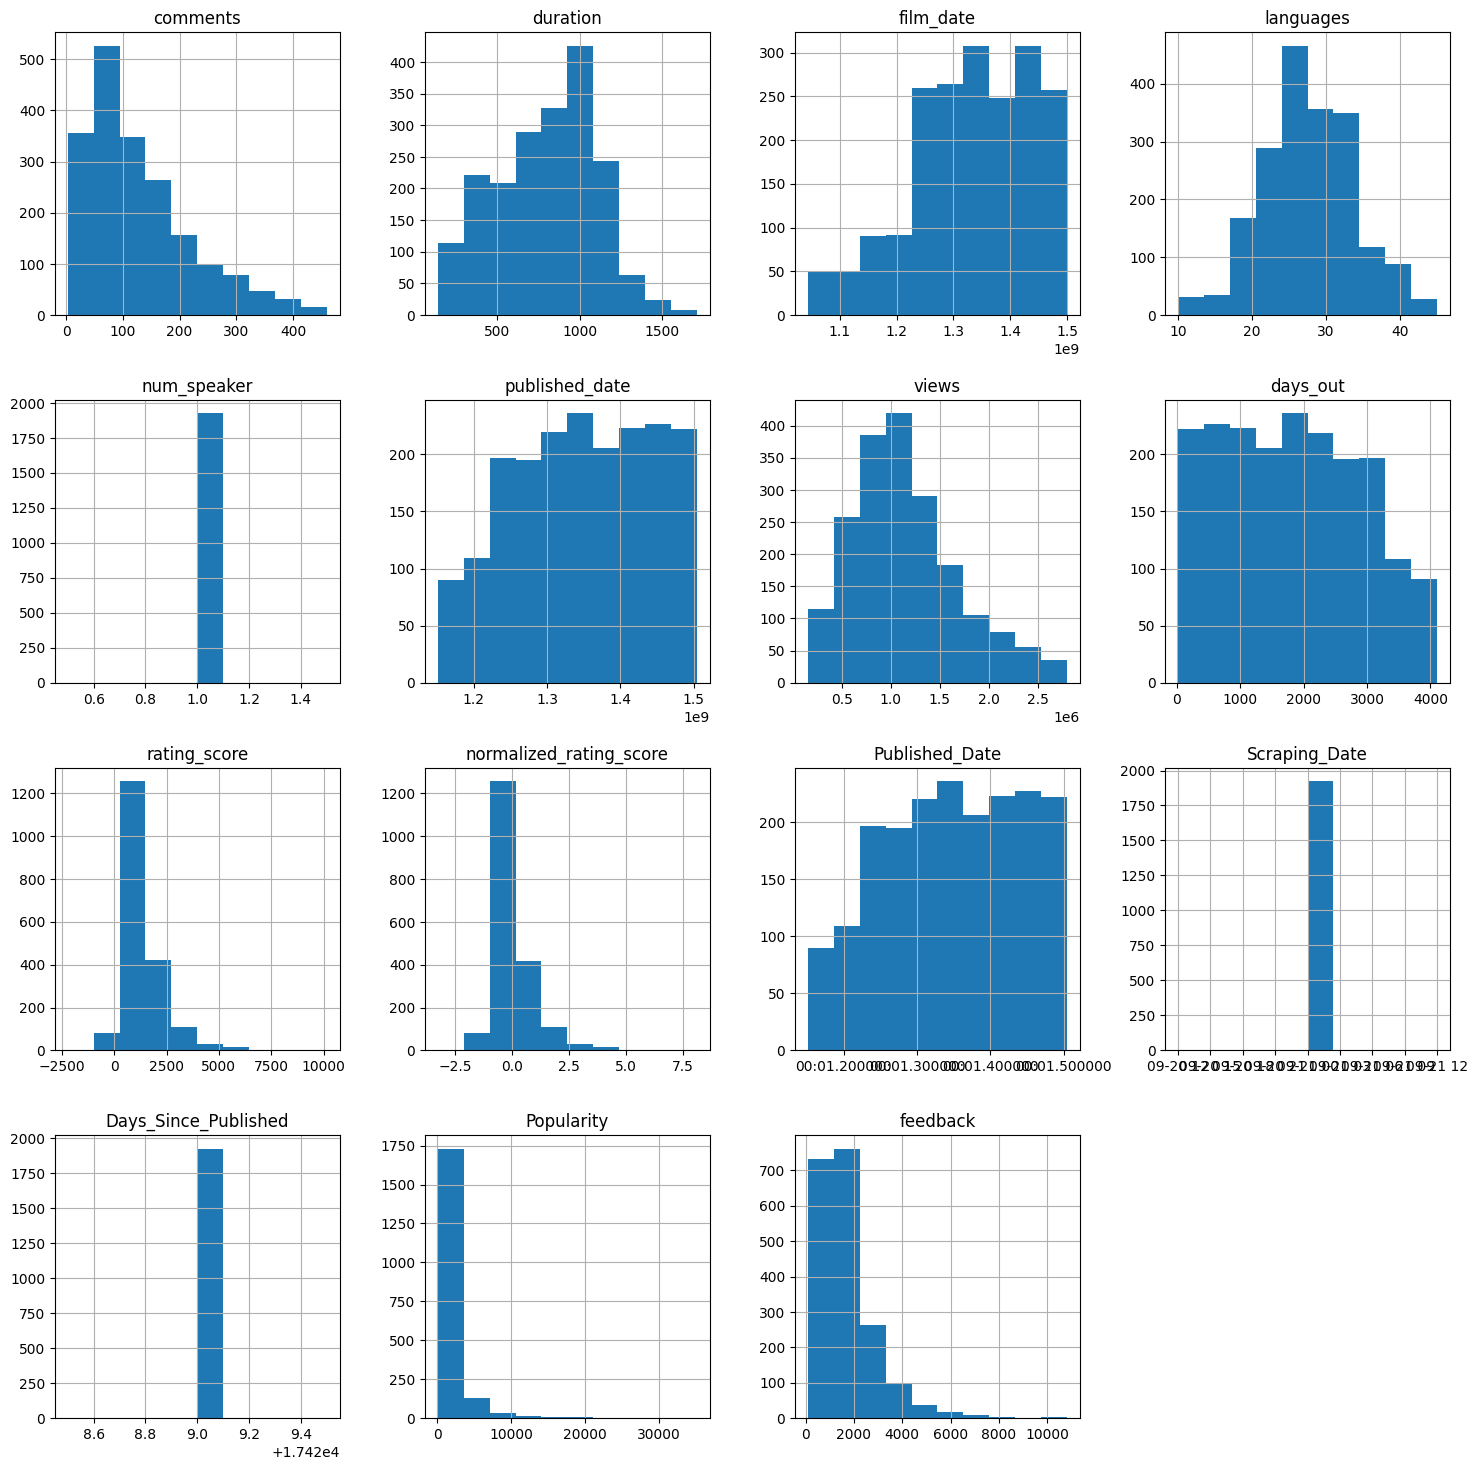

In [226]:
tedmain_cleaned.hist(figsize=(18, 18))
plt.show()

**Transcript tens analysis**-extra

In [444]:
import spacy
import pandas as pd

# Load spacy model
nlp = spacy.load('en_core_web_sm')

# Define a function to classify the predominant tenses
def classify_dominant_tenses(text, threshold=0.2):
    # Process text with spacy to extract verb tenses
    doc = nlp(text)
    verb_tenses = {'past': 0, 'present': 0, 'future': 0}
    
    for token in doc:
        if token.pos_ == 'VERB':
            # Count based on morphological tags
            if token.tag_ in ['VBD', 'VBN']:  # Past tense
                verb_tenses['past'] += 1
            elif token.tag_ in ['VB', 'VBP', 'VBZ']:  # Present tense
                verb_tenses['present'] += 1
            elif token.tag_ == 'MD' and token.text.lower() in ['will', 'shall']:  # Future tense
                verb_tenses['future'] += 1
    
    # Sort tenses by frequency
    sorted_tenses = sorted(verb_tenses.items(), key=lambda x: x[1], reverse=True)
    top_tense, top_count = sorted_tenses[0]
    second_tense, second_count = sorted_tenses[1]

    # Handle cases with no verb tenses
    if top_count == 0:
        return "none"  # Return "none" if no verbs are found

    # Check if the difference between the top two tenses is small
    if second_count / top_count >= 0.5:
        # If the counts are close, return the combination of the top two tenses
        return f"{top_tense} and {second_tense}"
    else:
        # If the top tense is dominant, return it as a single category
        return top_tense

# Apply the function to classify each transcript in the data
tedmain_cleaned['text_tense'] = tedmain_cleaned['transcript'].apply(classify_dominant_tenses)


In [445]:

# Display the first few rows to verify the new column
tedmain_cleaned[['transcript', 'text_tense']].head()
tedmain_cleaned['text_tense'] = tedmain_cleaned['transcript'].apply(classify_dominant_tenses)


In [446]:
tedmain_cleaned[['transcript', 'text_tense']].head()

transcript        text_tense
2   (Music: "The Sound of Silence," Simon & Garfun...           present
3   If you're here today — and I'm very happy that...  present and past
7   I'm going to present three projects in rapid f...           present
10  I'm going to take you on a journey very quickl...  present and past
11  I can't help but this wish: to think about whe...  present and past

In [452]:
# Extract the year from the 'published_date' column and create a new column 'published_year'
tedmain_cleaned['published_year'] = pd.to_datetime(tedmain_cleaned['published_date'], unit='s').dt.year

# Overall average views by tense category
tense_popularity = tedmain_cleaned.groupby('text_tense')['Popularity'].mean()

# Year-wise average views by tense category
yearly_tense_popularity = tedmain_cleaned.groupby(['published_year', 'text_tense'])['Popularity'].mean().unstack()


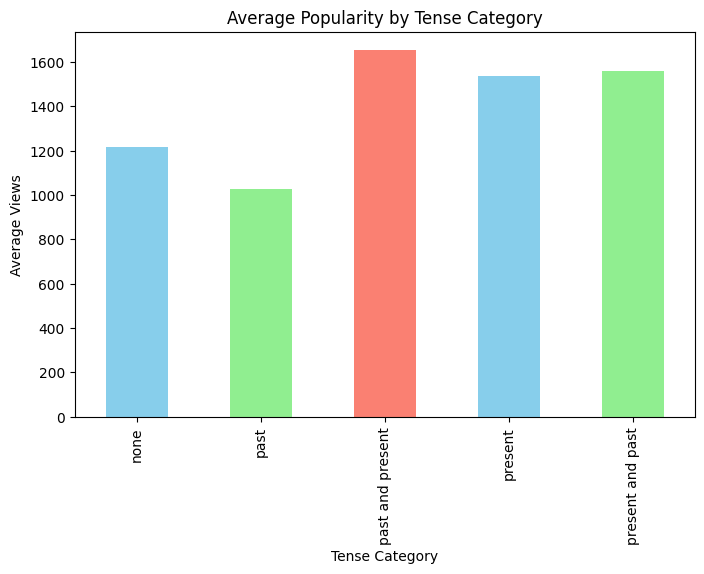

<Figure size 1200x600 with 0 Axes>

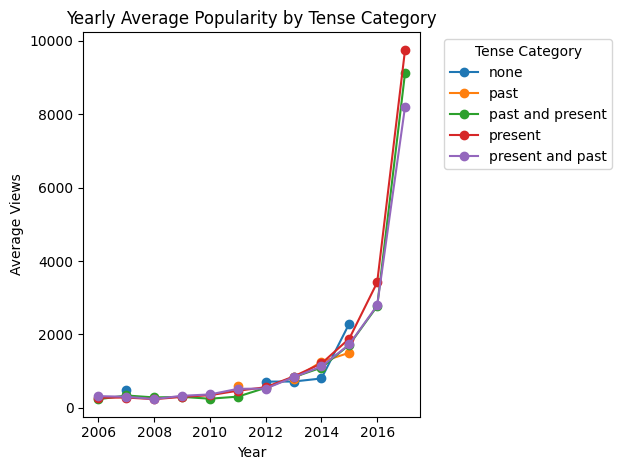

In [453]:
import matplotlib.pyplot as plt

# Overall popularity by tense category
plt.figure(figsize=(8, 5))
tense_popularity.plot(kind='bar', color=['skyblue', 'lightgreen', 'salmon'])
plt.title("Average Popularity by Tense Category")
plt.xlabel("Tense Category")
plt.ylabel("Average Views")
plt.show()

# Year-wise popularity by tense category
plt.figure(figsize=(12, 6))
yearly_tense_popularity.plot(marker='o')
plt.title("Yearly Average Popularity by Tense Category")
plt.xlabel("Year")
plt.ylabel("Average Views")
plt.legend(title="Tense Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [262]:
tedmain_cleaned.columns

Index(['comments', 'description', 'duration', 'event', 'film_date',
       'languages', 'main_speaker', 'name', 'num_speaker', 'published_date',
       'ratings', 'related_talks', 'speaker_occupation', 'tags', 'title',
       'url', 'views', 'transcript', 'days_out', 'rating_score',
       'normalized_rating_score', 'Published_Date', 'Scraping_Date',
       'Days_Since_Published', 'Popularity', 'feedback', 'text_tense',
       'published_year', 'title_length', 'title_word_count',
       'title_flesch_kincaid_grade_level', 'title_sentiment_score',
       'tag_count'],
      dtype='object')

***Analysing I- [Title]***

**1.1 word count**

visually analysing if title word count has a significant impact on the popularity of the talk or not .

C:\Users\arsal\AppData\Local\Temp\ipykernel_23892\106427766.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  popularity_by_bins = tedmain_cleaned.groupby(bins)['Popularity'].mean()
C:\Users\arsal\AppData\Local\Temp\ipykernel_23892\106427766.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  views_by_bins = tedmain_cleaned.groupby(bins)['views'].mean()


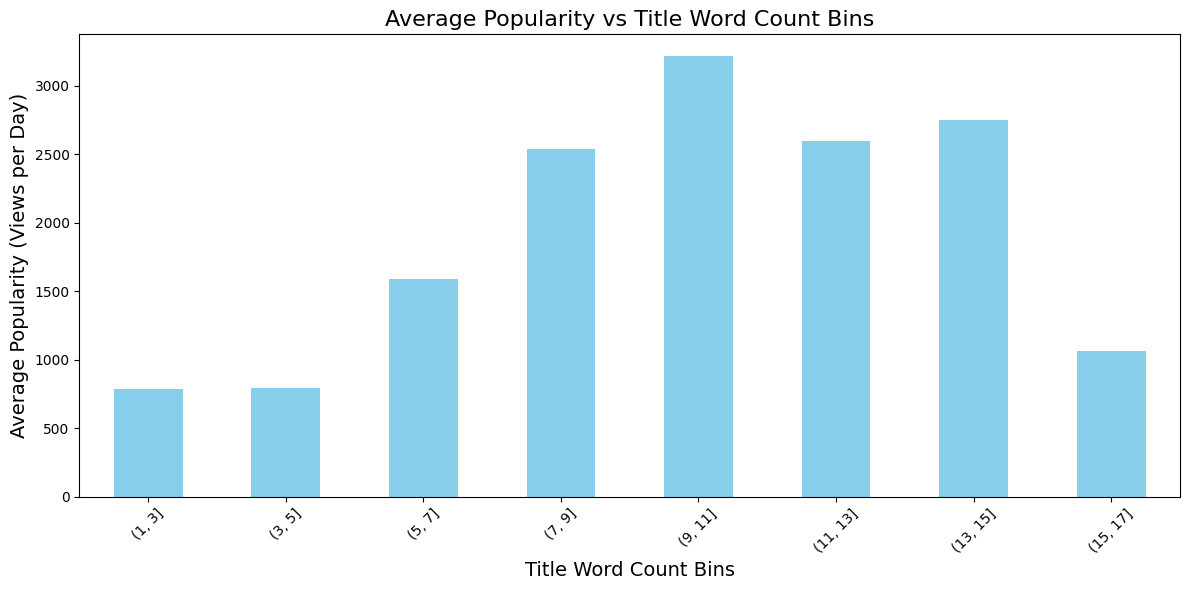

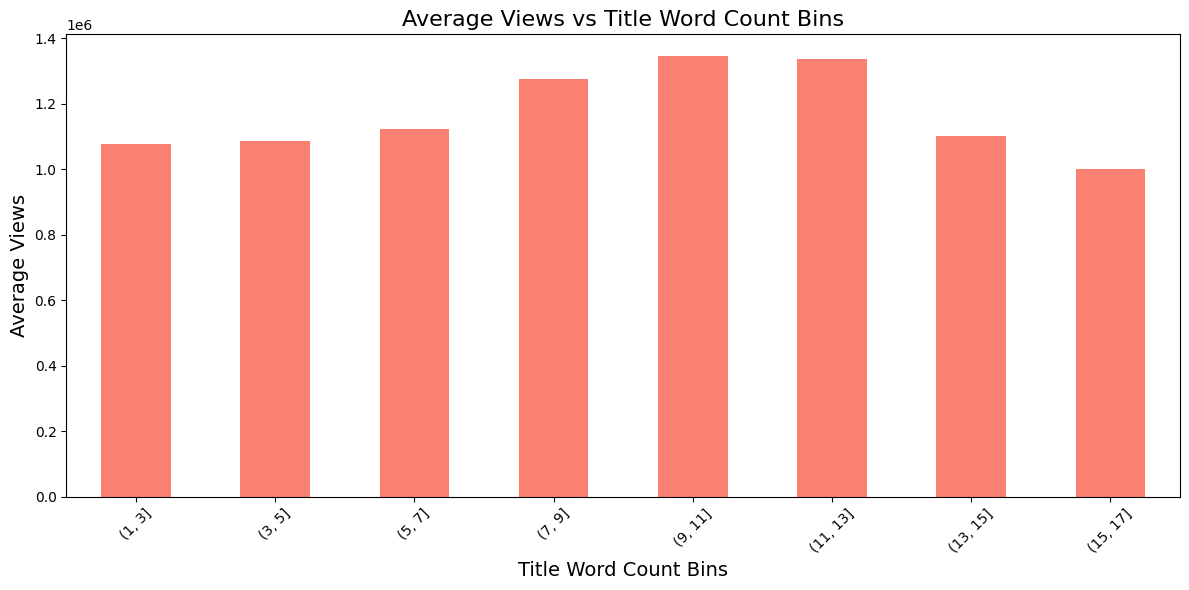

C:\Users\arsal\AppData\Local\Temp\ipykernel_23892\106427766.py:33: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  feedback_by_bins = tedmain_cleaned.groupby(bins)['feedback'].mean()


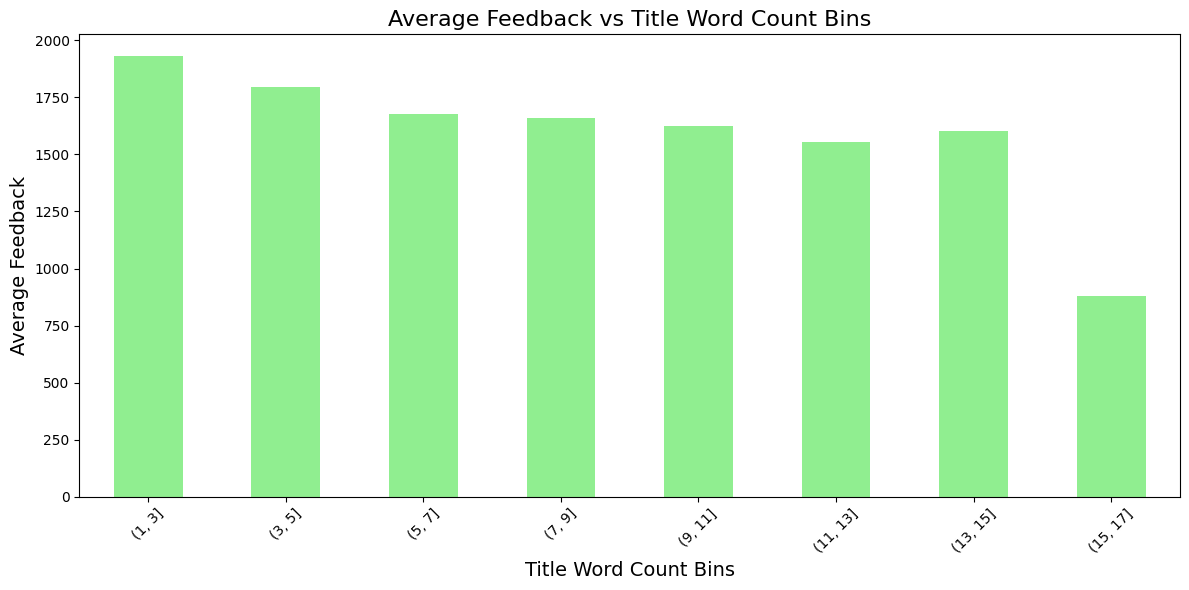

C:\Users\arsal\AppData\Local\Temp\ipykernel_23892\106427766.py:46: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  normalized_rating_by_bins = tedmain_cleaned.groupby(bins)['normalized_rating_score'].mean()


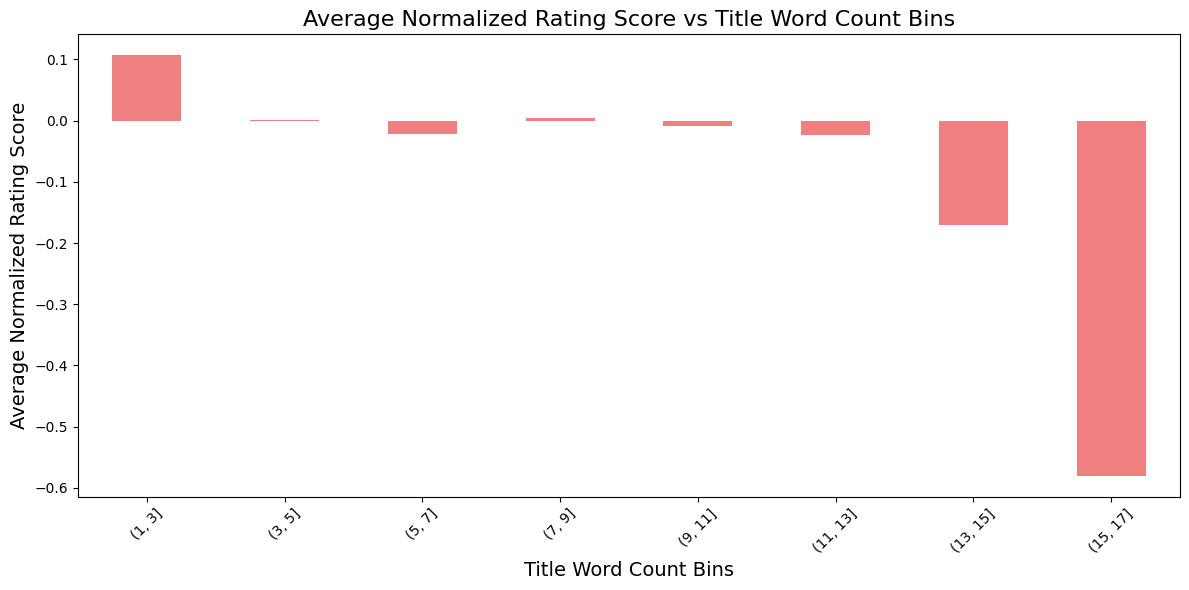

C:\Users\arsal\AppData\Local\Temp\ipykernel_23892\106427766.py:59: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  reaction_by_bins = tedmain_cleaned.groupby(bins)['rating_score'].mean()


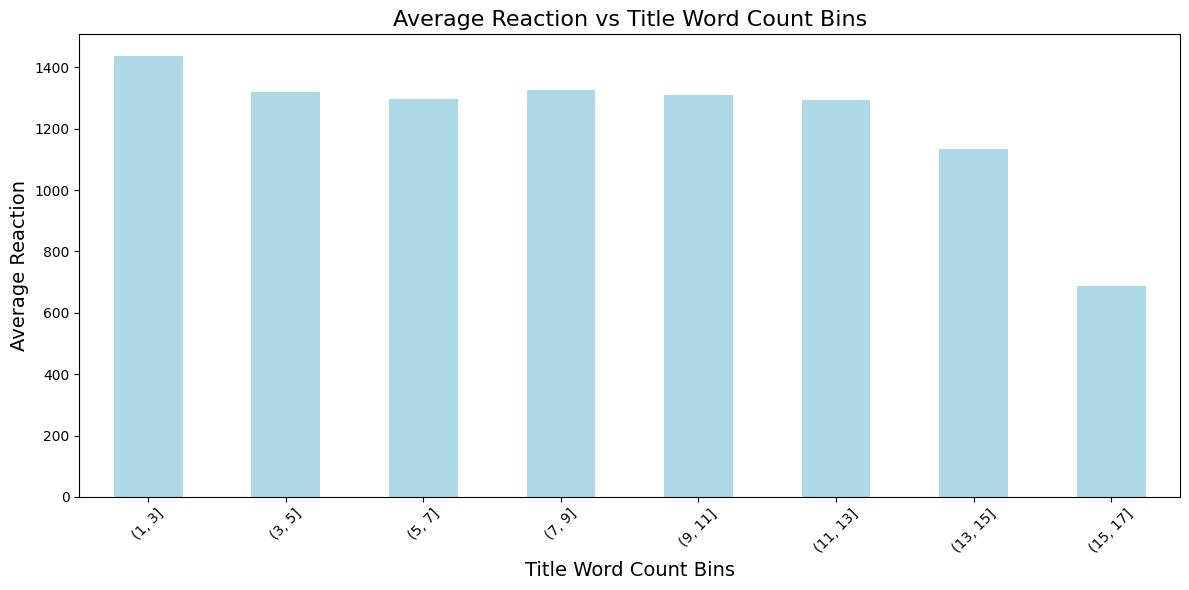

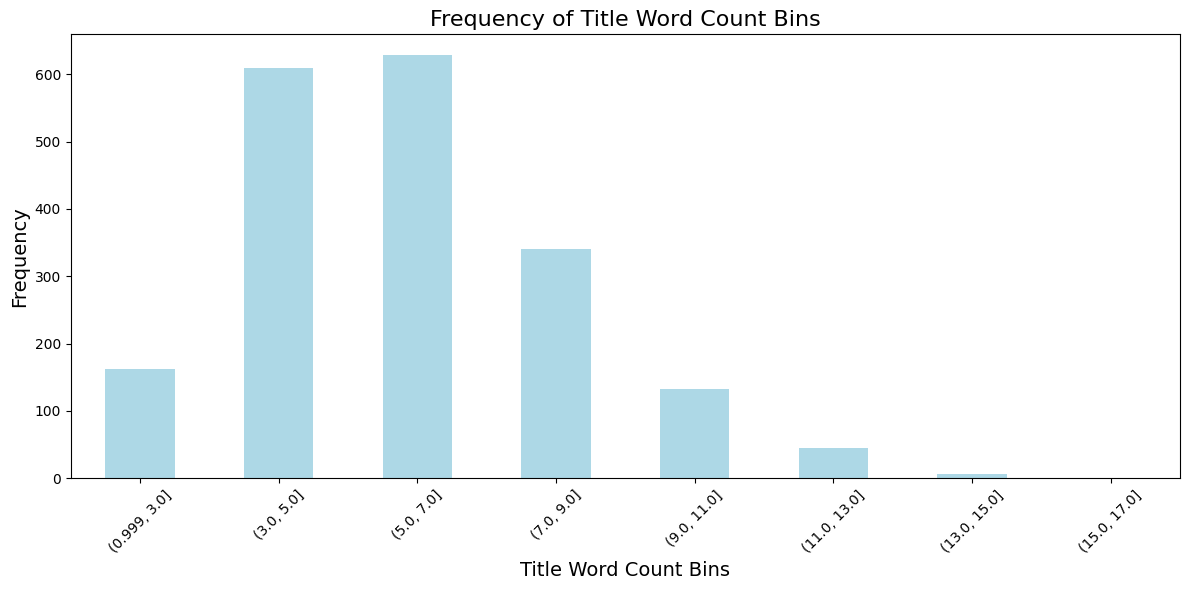

Popularity ANOVA p-value: 2.2948252739926788e-40
Views ANOVA p-value: 6.573759512640363e-14
Feedback ANOVA p-value: 0.01881292209361526
Normalized Rating Score ANOVA p-value: 0.8054978006675154
Reaction ANOVA p-value: 0.8054978006675154


In [281]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway

# Create bins for the title word count with an interval of 2
bins = pd.cut(tedmain_cleaned['title_word_count'], bins=range(1, 18, 2))

# Calculate the average Popularity and views for each bin
popularity_by_bins = tedmain_cleaned.groupby(bins)['Popularity'].mean()
views_by_bins = tedmain_cleaned.groupby(bins)['views'].mean()

# Plot the graph for Popularity vs bins for word count
plt.figure(figsize=(12, 6))
popularity_by_bins.plot(kind='bar', color='skyblue')
plt.title("Average Popularity vs Title Word Count Bins", fontsize=16)
plt.xlabel("Title Word Count Bins", fontsize=14)
plt.ylabel("Average Popularity (Views per Day)", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot the graph for views vs bins for word count
plt.figure(figsize=(12, 6))
views_by_bins.plot(kind='bar', color='salmon')
plt.title("Average Views vs Title Word Count Bins", fontsize=16)
plt.xlabel("Title Word Count Bins", fontsize=14)
plt.ylabel("Average Views", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
# Calculate the average feedback for each bin
feedback_by_bins = tedmain_cleaned.groupby(bins)['feedback'].mean()

# Plot the graph for feedback vs bins for word count
plt.figure(figsize=(12, 6))
feedback_by_bins.plot(kind='bar', color='lightgreen')
plt.title("Average Feedback vs Title Word Count Bins", fontsize=16)
plt.xlabel("Title Word Count Bins", fontsize=14)
plt.ylabel("Average Feedback", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Calculate the average normalized rating score for each bin
normalized_rating_by_bins = tedmain_cleaned.groupby(bins)['normalized_rating_score'].mean()

# Plot the graph for normalized rating score vs bins for word count
plt.figure(figsize=(12, 6))
normalized_rating_by_bins.plot(kind='bar', color='lightcoral')
plt.title("Average Normalized Rating Score vs Title Word Count Bins", fontsize=16)
plt.xlabel("Title Word Count Bins", fontsize=14)
plt.ylabel("Average Normalized Rating Score", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Calculate the average reaction for each bin
reaction_by_bins = tedmain_cleaned.groupby(bins)['rating_score'].mean()

# Plot the graph for reaction vs bins for word count
plt.figure(figsize=(12, 6))
reaction_by_bins.plot(kind='bar', color='lightblue')
plt.title("Average Reaction vs Title Word Count Bins", fontsize=16)
plt.xlabel("Title Word Count Bins", fontsize=14)
plt.ylabel("Average Reaction", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
# Calculate the frequency of each title word count bin
bin_frequency = tedmain_cleaned['title_word_count'].value_counts(bins=range(1, 18, 2)).sort_index()

# Plot the frequency of title word count bins
plt.figure(figsize=(12, 6))
bin_frequency.plot(kind='bar', color='lightblue')
plt.title("Frequency of Title Word Count Bins", fontsize=16)
plt.xlabel("Title Word Count Bins", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
# Perform ANOVA to check if the differences between bins are statistically significant
popularity_anova = f_oneway(*[tedmain_cleaned[tedmain_cleaned['title_word_count'].between(bin.left, bin.right)]['Popularity'] for bin in bins.cat.categories])
views_anova = f_oneway(*[tedmain_cleaned[tedmain_cleaned['title_word_count'].between(bin.left, bin.right)]['views'] for bin in bins.cat.categories])
feedback_anova = f_oneway(*[tedmain_cleaned[tedmain_cleaned['title_word_count'].between(bin.left, bin.right)]['feedback'] for bin in bins.cat.categories])
normalized_rating_anova = f_oneway(*[tedmain_cleaned[tedmain_cleaned['title_word_count'].between(bin.left, bin.right)]['normalized_rating_score'] for bin in bins.cat.categories])
reaction_anova = f_oneway(*[tedmain_cleaned[tedmain_cleaned['title_word_count'].between(bin.left, bin.right)]['rating_score'] for bin in bins.cat.categories])

# Print the ANOVA results
print(f"Popularity ANOVA p-value: {popularity_anova.pvalue}")
print(f"Views ANOVA p-value: {views_anova.pvalue}")
print(f"Feedback ANOVA p-value: {feedback_anova.pvalue}")
print(f"Normalized Rating Score ANOVA p-value: {normalized_rating_anova.pvalue}")
print(f"Reaction ANOVA p-value: {reaction_anova.pvalue}")


Rejected Null Hypothesis (Statistically Significant): Popularity, Views, Feedback.
Failed to Reject Null Hypothesis (Not Statistically Significant): Normalized Rating Score, Reaction.

Observation:
Title with word count of around 9-11 seems to be the most popular.
and majority of the titles seems to be of length btw 3 to 7.
Talks with shorted titles tends to get a bit more feedback.  from viewers.

title length should be ideally btw 5 to 15

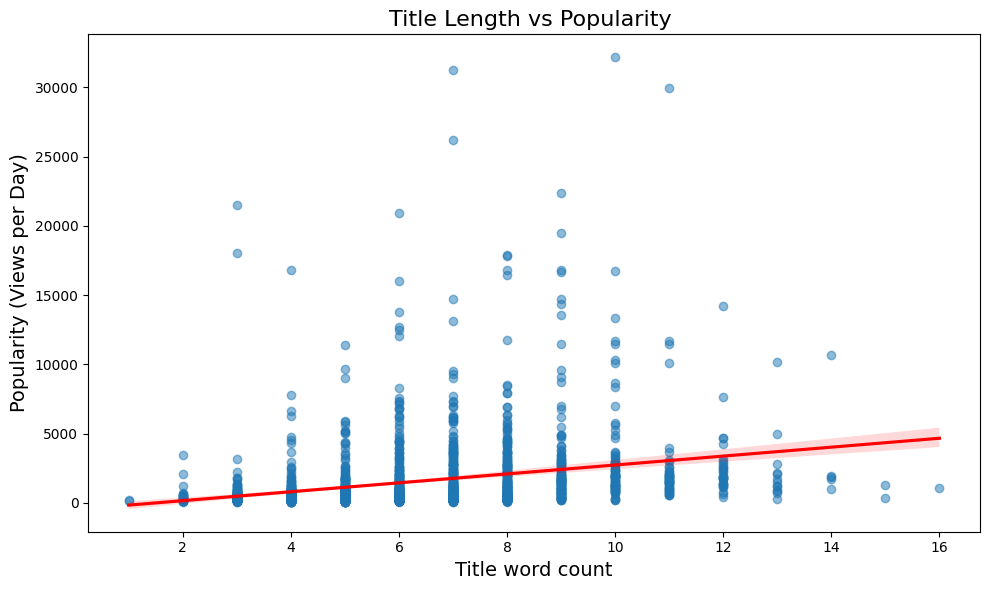

In [456]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = tedmain_cleaned


# Scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='title_word_count', y='Popularity', data=tedmain_cleaned, scatter_kws={'alpha': 0.5}, line_kws={"color": "red"})

# Add labels and title
plt.title("Title Length vs Popularity ", fontsize=16)
plt.xlabel("Title word count", fontsize=14)
plt.ylabel("Popularity (Views per Day)", fontsize=14)

# Show plot
plt.tight_layout()
plt.show()


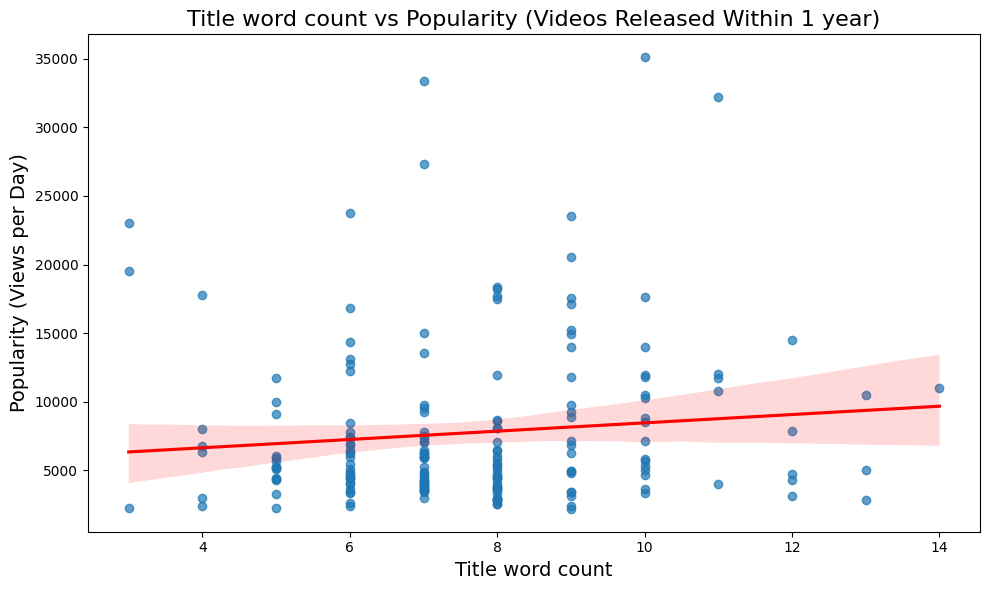

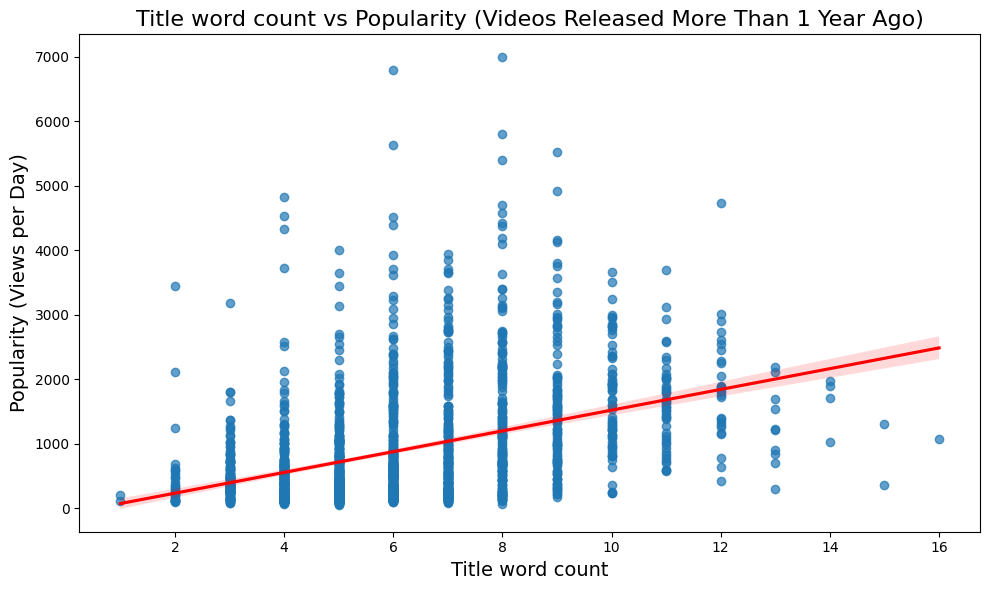

In [290]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

# Load the dataset
df = tedmain_cleaned

# Filter videos released within 1 year (365 days) of the scraping date
one_year = df[df['days_out'] <= 365]


# Filter videos released more than 1 year (365 days) before the scraping date
one_plus_year = df[df['days_out'] > 365]


# Function to plot
def plot_relationship(data, title):
    plt.figure(figsize=(10, 6))
    sns.regplot(x='title_word_count', y='Popularity', data=data, scatter_kws={'alpha': 0.7}, line_kws={"color": "red"})
    plt.title(title, fontsize=16)
    plt.xlabel("Title word count", fontsize=14)
    plt.ylabel("Popularity (Views per Day)", fontsize=14)
    plt.tight_layout()
    plt.show()

# Plot for videos released within 1 year
plot_relationship(one_year, "Title word count vs Popularity (Videos Released Within 1 year)")

# Plot for videos released more than 1 year ago
plot_relationship(one_plus_year, "Title word count vs Popularity (Videos Released More Than 1 Year Ago)")


Observation: in the long run title length seems to have a more significant impact on popularity

In [61]:
tedmain = pd.read_csv('ted_main.csv')
titles =tedmain["title"][11:21]
titles

11                       My wish: A global day of film
12                     My wish: Help me stop pandemics
13    The radical promise of the multi-touch interface
14                                One Laptop per Child
15                     An 11-year-old's magical violin
16                       Improvising on piano, aged 14
17                       Simple designs to save a life
18                  Organic design, inspired by nature
19                              The birth of Wikipedia
20    The birth of the open-source learning revolution
Name: title, dtype: object

***Analysing I- [Title]***

**1.2 Title wording**

visually analysing if title wording has a significant impact on the popularity of the talk or not .

C:\Users\arsal\AppData\Local\Temp\ipykernel_23892\1775201571.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=first_word_stats.index, y=first_word_stats['count'], palette='viridis')


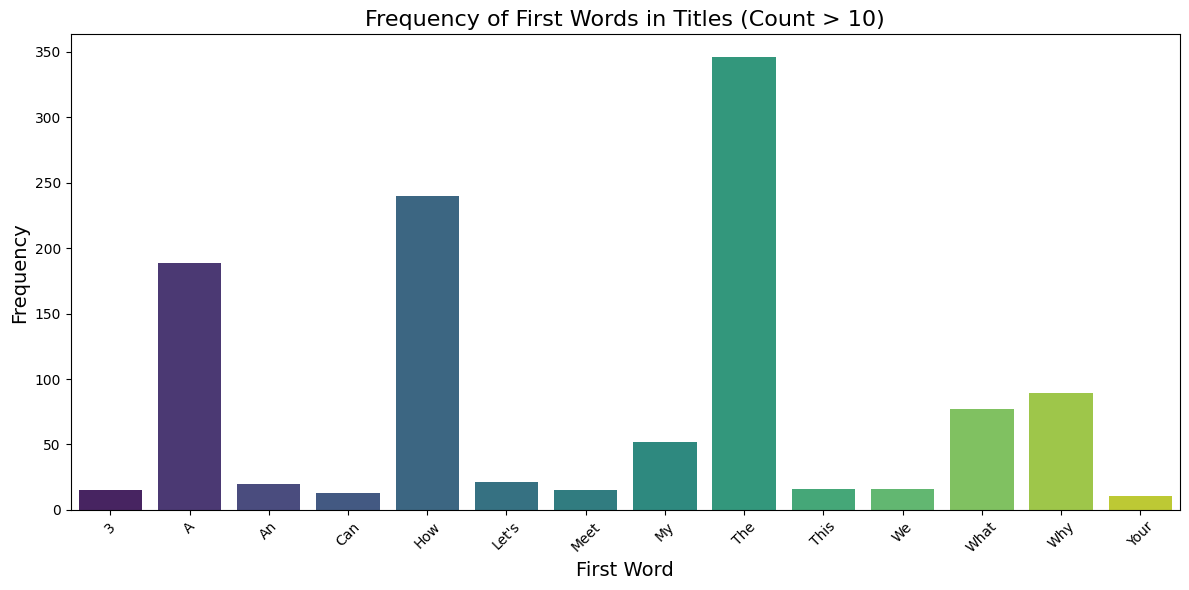

C:\Users\arsal\AppData\Local\Temp\ipykernel_23892\1775201571.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=first_word_stats.index, y=first_word_stats['mean'], palette='viridis')


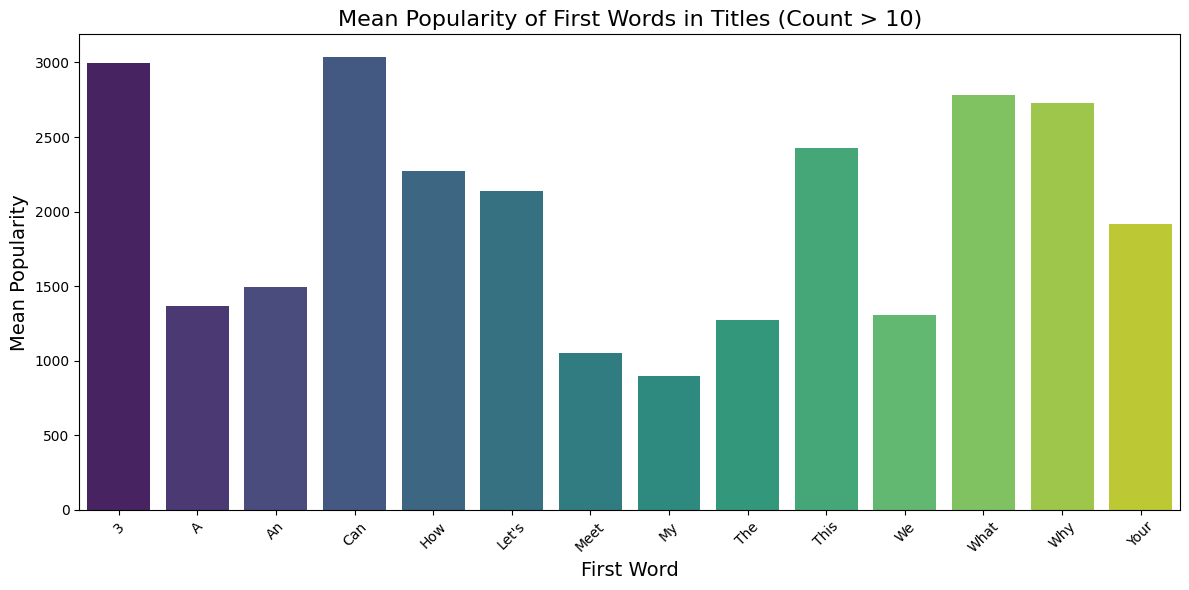

C:\Users\arsal\AppData\Local\Temp\ipykernel_23892\1775201571.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=first_word_stats.index, y=first_word_stats['median'], palette='viridis')


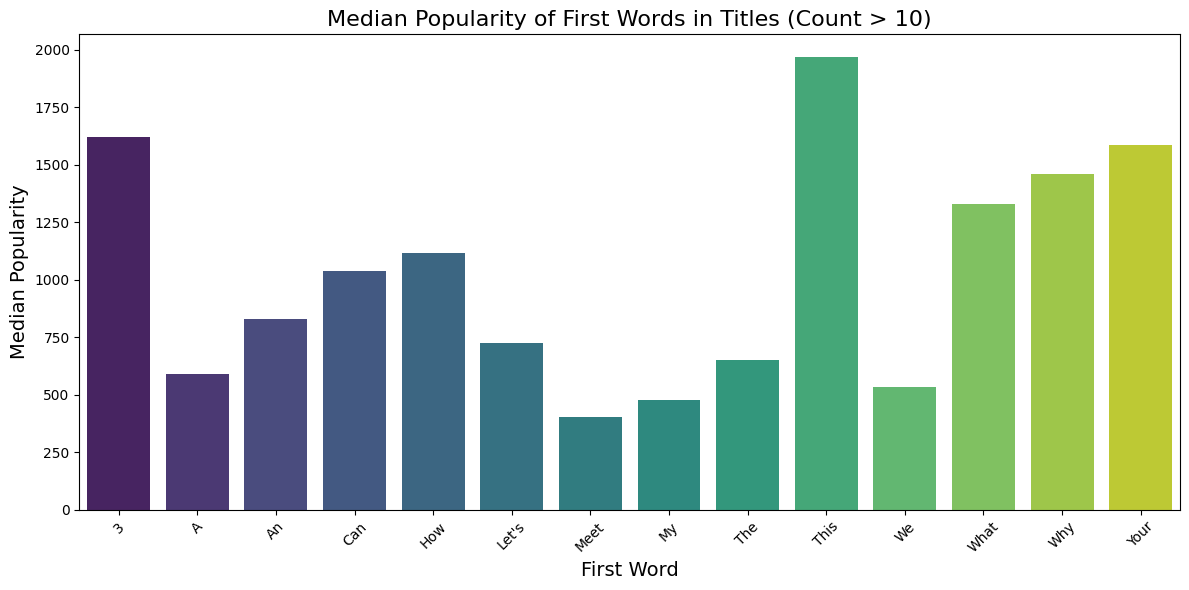

C:\Users\arsal\AppData\Local\Temp\ipykernel_23892\1775201571.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=first_word_stats.index, y=first_word_stats['std'], palette='viridis')


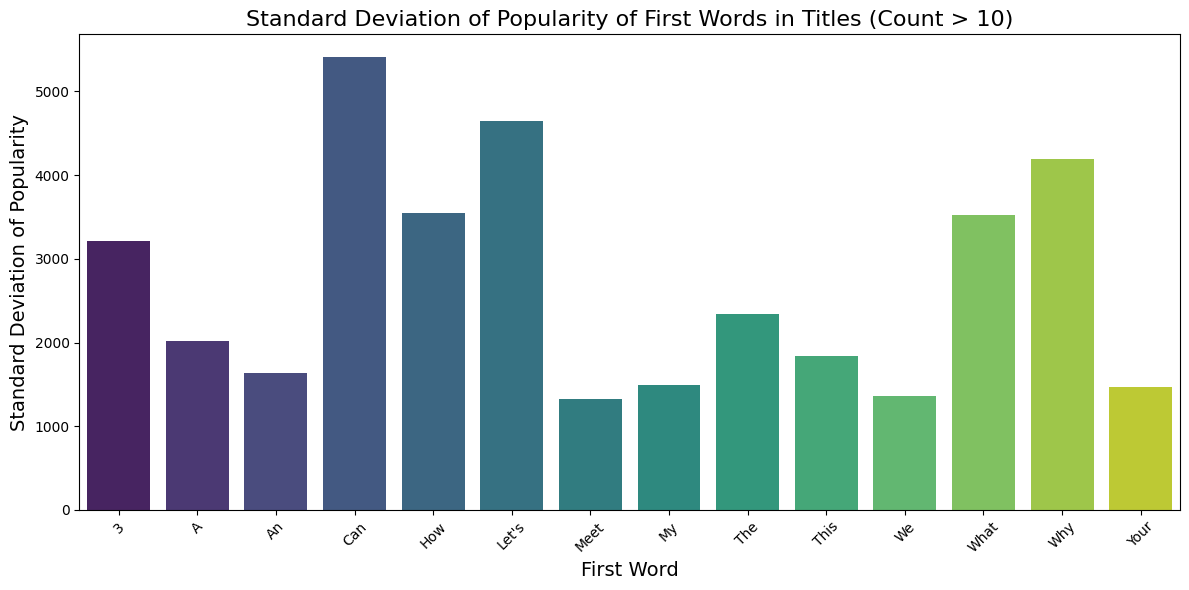

C:\Users\arsal\AppData\Local\Temp\ipykernel_23892\1775201571.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='first_word', y='Popularity', data=common_first_words_df, palette='viridis')


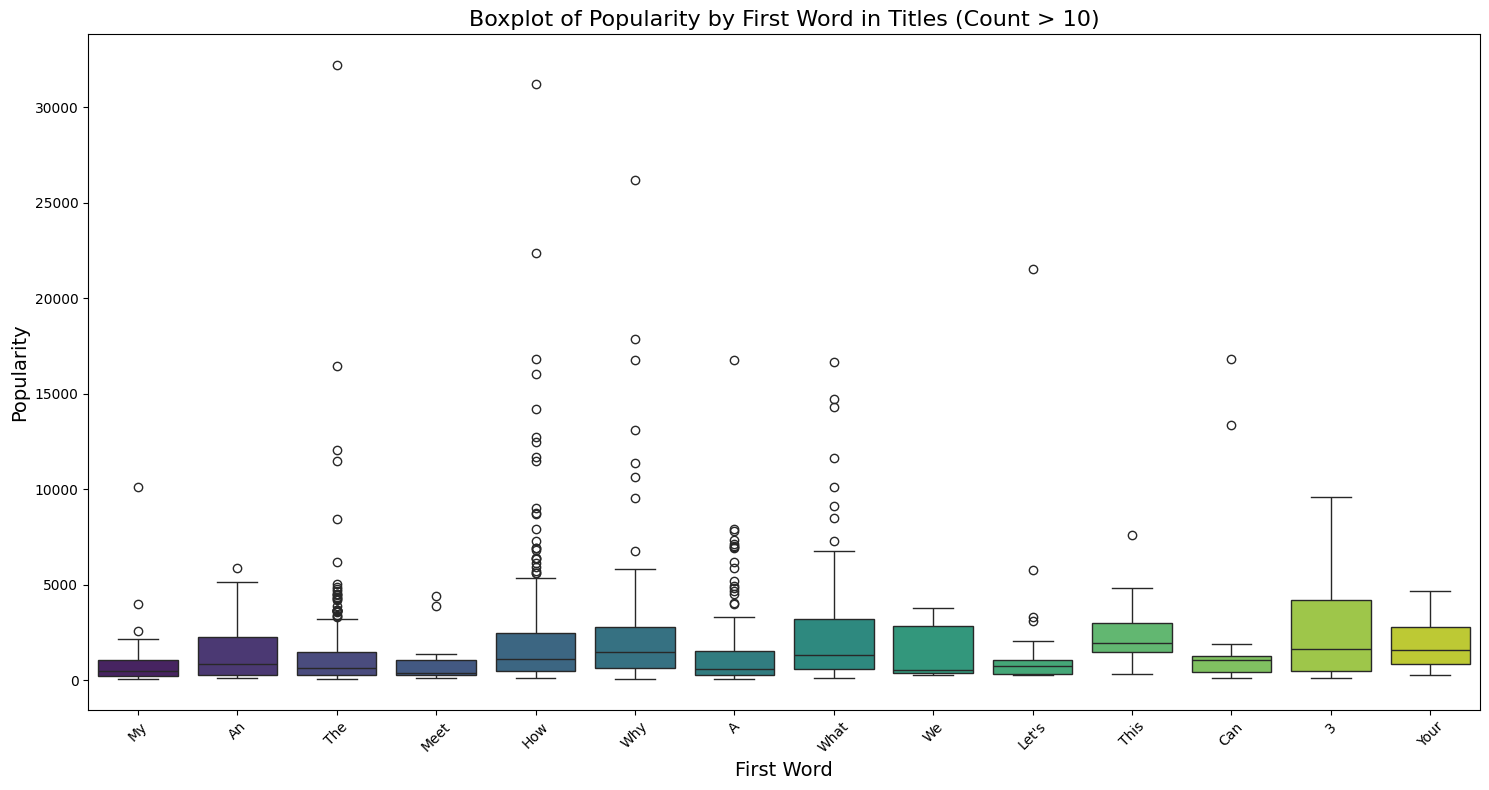

ANOVA p-value: 1.8822225955310815e-06


In [464]:
import pandas as pd
import seaborn as sns
from scipy.stats import f_oneway

import matplotlib.pyplot as plt

# Extract the first word of each title
tedmain_cleaned['first_word'] = tedmain_cleaned['title'].apply(lambda x: x.split()[0])

# Calculate the frequency of each first word
first_word_freq = tedmain_cleaned['first_word'].value_counts()

# Filter the words that appear more than 10 times
common_first_words = first_word_freq[first_word_freq > 10].index

# Filter the dataframe to include only these common first words
common_first_words_df = tedmain_cleaned[tedmain_cleaned['first_word'].isin(common_first_words)]

# Calculate mean, median, and standard deviation of popularity for these words
first_word_stats = common_first_words_df.groupby('first_word')['Popularity'].agg(['mean', 'median', 'std', 'count'])

# Plot the frequency of first words
plt.figure(figsize=(12, 6))
sns.barplot(x=first_word_stats.index, y=first_word_stats['count'], palette='viridis')
plt.title('Frequency of First Words in Titles (Count > 10)', fontsize=16)
plt.xlabel('First Word', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot the mean popularity of first words
plt.figure(figsize=(12, 6))
sns.barplot(x=first_word_stats.index, y=first_word_stats['mean'], palette='viridis')
plt.title('Mean Popularity of First Words in Titles (Count > 10)', fontsize=16)
plt.xlabel('First Word', fontsize=14)
plt.ylabel('Mean Popularity', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot the median popularity of first words
plt.figure(figsize=(12, 6))
sns.barplot(x=first_word_stats.index, y=first_word_stats['median'], palette='viridis')
plt.title('Median Popularity of First Words in Titles (Count > 10)', fontsize=16)
plt.xlabel('First Word', fontsize=14)
plt.ylabel('Median Popularity', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot the standard deviation of popularity of first words
plt.figure(figsize=(12, 6))
sns.barplot(x=first_word_stats.index, y=first_word_stats['std'], palette='viridis')
plt.title('Standard Deviation of Popularity of First Words in Titles (Count > 10)', fontsize=16)
plt.xlabel('First Word', fontsize=14)
plt.ylabel('Standard Deviation of Popularity', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Boxplot for the popularity of first words in titles
plt.figure(figsize=(15, 8))
sns.boxplot(x='first_word', y='Popularity', data=common_first_words_df, palette='viridis')
plt.title('Boxplot of Popularity by First Word in Titles (Count > 10)', fontsize=16)
plt.xlabel('First Word', fontsize=14)
plt.ylabel('Popularity', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
# Display the statistics
first_word_stats

# Perform ANOVA to check if the differences in mean popularity between first words are statistically significant
anova_result = f_oneway(*[common_first_words_df[common_first_words_df['first_word'] == word]['Popularity'] for word in common_first_words])

# Print the ANOVA result
print(f"ANOVA p-value: {anova_result.pvalue}")

In [ ]:
# Filter the DataFrame to include only titles that start with "3"
titles_starting_with_3 = tedmain_cleaned[tedmain_cleaned['title'].str.startswith('3')]

# Display the filtered titles
print(titles_starting_with_3[['title']])

                                                  title
393                  3 ways good design makes you happy
474                    3 ways the brain creates meaning
504                     3 warp-speed architecture tales
799             3 stories of local eco-entrepreneurship
1156                      3 new ways to kill mosquitoes
1273    3 ways to (usefully) lose control of your brand
1416                          3 rules to spark learning
1497   3 reasons we still haven’t gotten rid of malaria
2144  3 reasons why we can win the fight against pov...
2163    3 lessons on success from an Arab businesswoman
2179    3 moons and a planet that could have alien life
2303               3 ways to fix a broken news industry
2331                     3 ways to spot a bad statistic
2343            3 ways to plan for the (very) long term
2368                 3 principles for creating safer AI


Observation: titles which starts with tree and talk about 3 three things seems to be popular.

some style of tytles are more effective then others in drawing in viewers

C:\Users\arsal\AppData\Local\Temp\ipykernel_23892\2926555358.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=last_char_stats.index, y=last_char_stats['count'], palette='viridis')


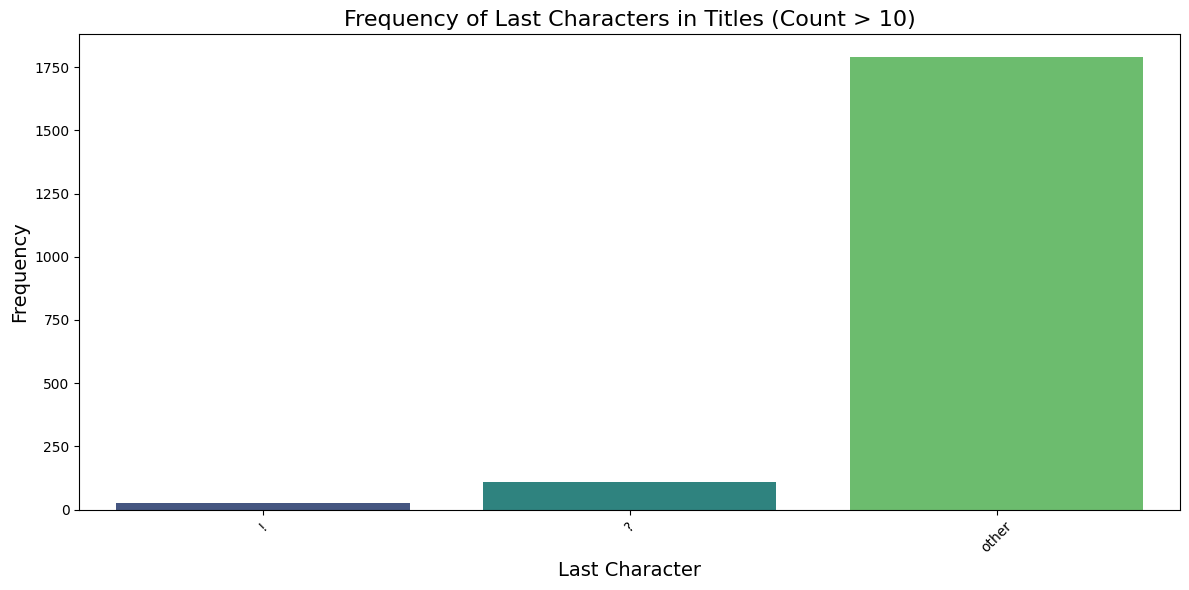

C:\Users\arsal\AppData\Local\Temp\ipykernel_23892\2926555358.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=last_char_stats.index, y=last_char_stats['mean'], palette='viridis')


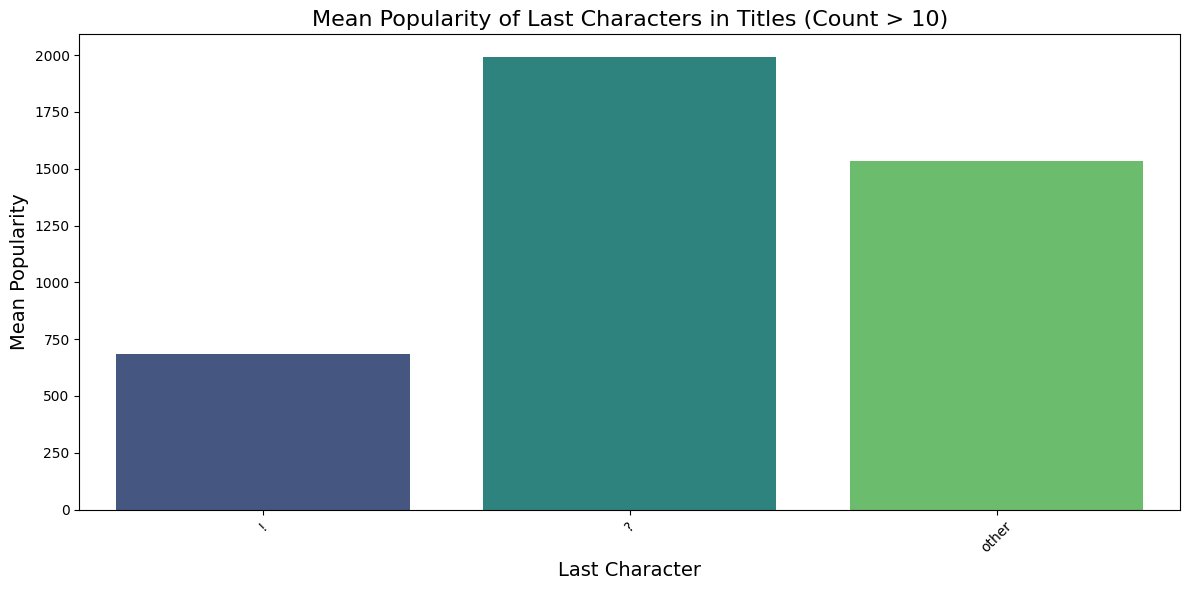

C:\Users\arsal\AppData\Local\Temp\ipykernel_23892\2926555358.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=last_char_stats.index, y=last_char_stats['median'], palette='viridis')


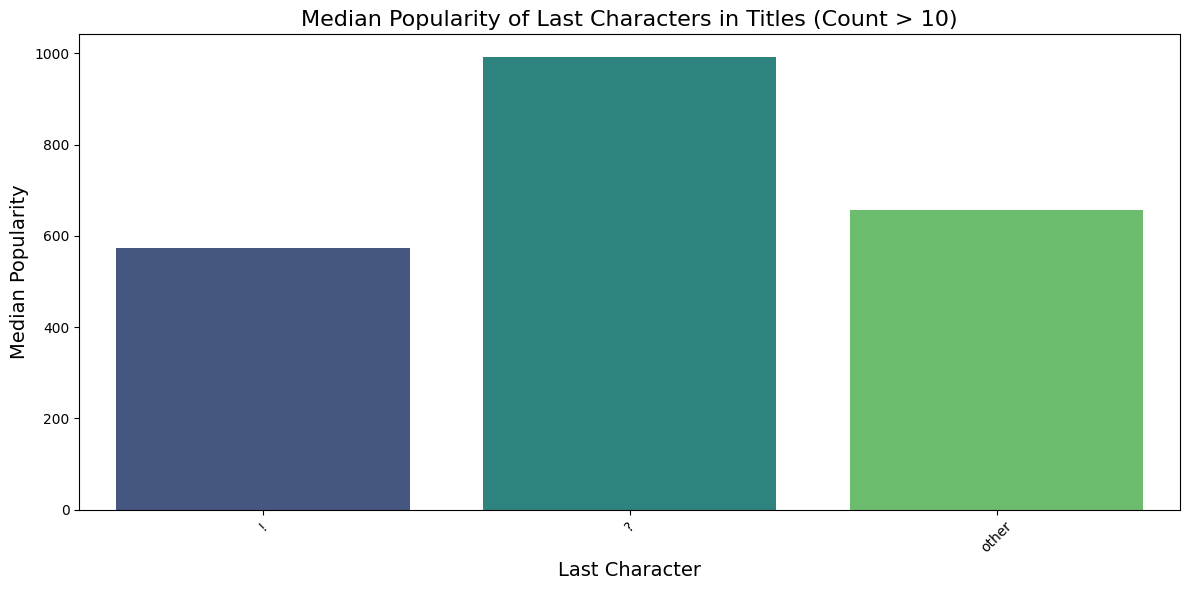

C:\Users\arsal\AppData\Local\Temp\ipykernel_23892\2926555358.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=last_char_stats.index, y=last_char_stats['std'], palette='viridis')


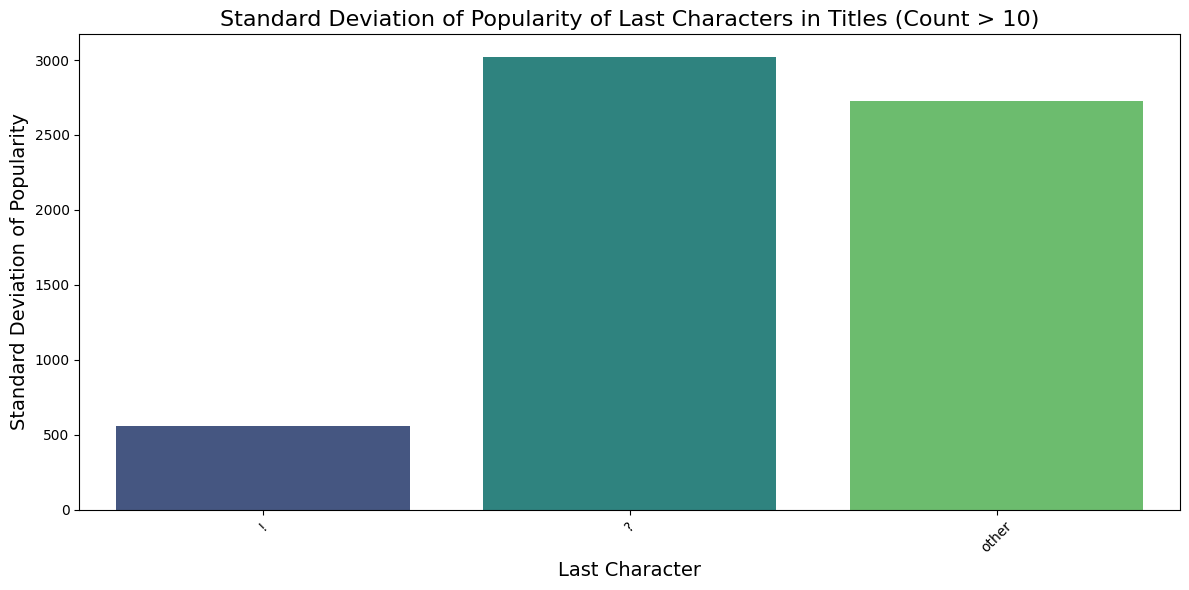

C:\Users\arsal\AppData\Local\Temp\ipykernel_23892\2926555358.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='last_char', y='Popularity', data=common_last_chars_df, palette='viridis')


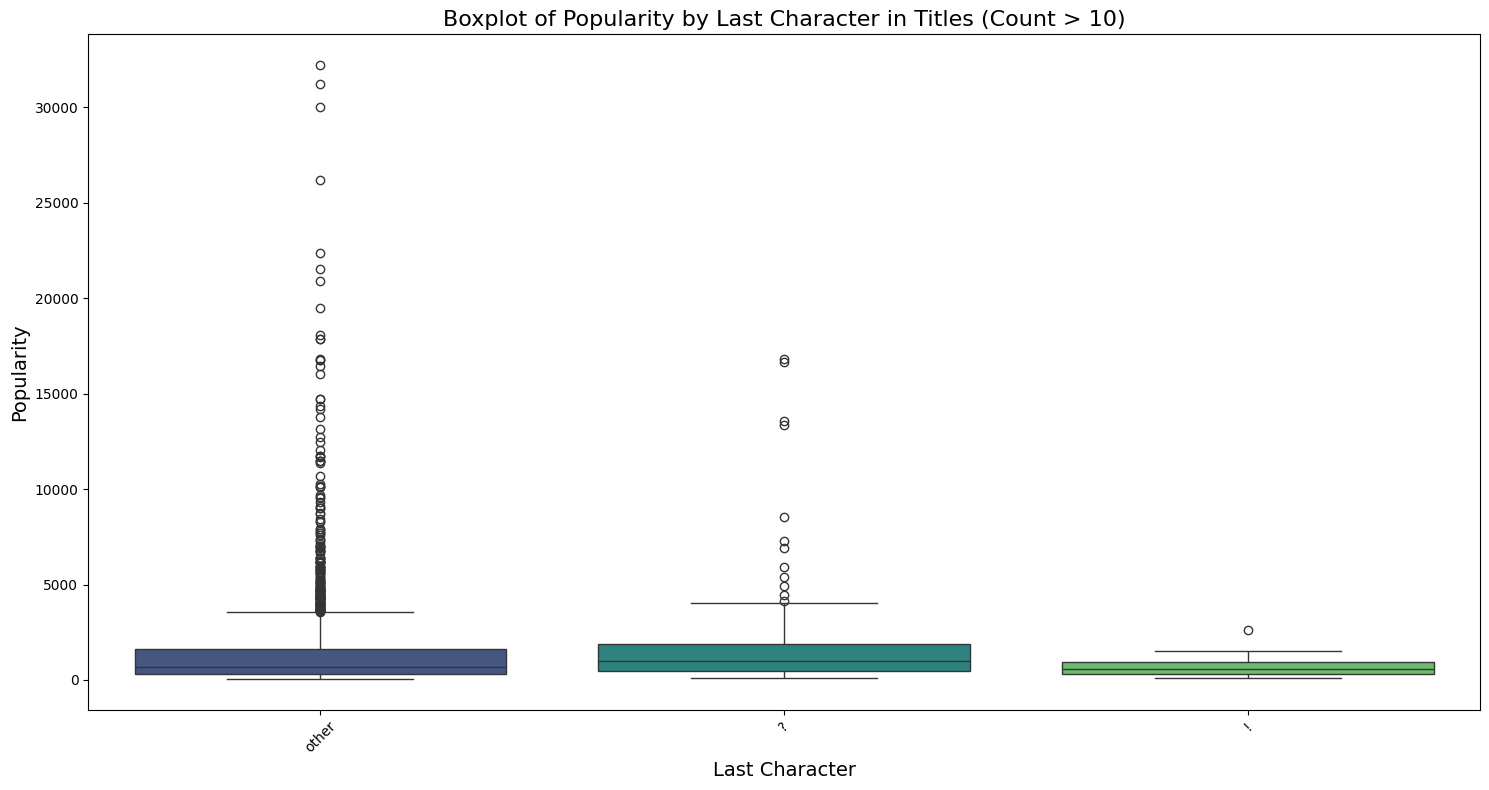

ANOVA p-value: 0.06518574544697328


In [466]:
# Extract the last character of each title
tedmain_cleaned['last_char'] = tedmain_cleaned['title'].apply(lambda x: x[-1] if x[-1] in ['?', '!'] else 'other')

# Calculate the frequency of each last character
last_char_freq = tedmain_cleaned['last_char'].value_counts()

# Filter the characters that appear more than 10 times
common_last_chars = last_char_freq[last_char_freq > 10].index

# Filter the dataframe to include only these common last characters
common_last_chars_df = tedmain_cleaned[tedmain_cleaned['last_char'].isin(common_last_chars)]

# Calculate mean, median, and standard deviation of popularity for these characters
last_char_stats = common_last_chars_df.groupby('last_char')['Popularity'].agg(['mean', 'median', 'std', 'count'])

# Plot the frequency of last characters
plt.figure(figsize=(12, 6))
sns.barplot(x=last_char_stats.index, y=last_char_stats['count'], palette='viridis')
plt.title('Frequency of Last Characters in Titles (Count > 10)', fontsize=16)
plt.xlabel('Last Character', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot the mean popularity of last characters
plt.figure(figsize=(12, 6))
sns.barplot(x=last_char_stats.index, y=last_char_stats['mean'], palette='viridis')
plt.title('Mean Popularity of Last Characters in Titles (Count > 10)', fontsize=16)
plt.xlabel('Last Character', fontsize=14)
plt.ylabel('Mean Popularity', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot the median popularity of last characters
plt.figure(figsize=(12, 6))
sns.barplot(x=last_char_stats.index, y=last_char_stats['median'], palette='viridis')
plt.title('Median Popularity of Last Characters in Titles (Count > 10)', fontsize=16)
plt.xlabel('Last Character', fontsize=14)
plt.ylabel('Median Popularity', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot the standard deviation of popularity of last characters
plt.figure(figsize=(12, 6))
sns.barplot(x=last_char_stats.index, y=last_char_stats['std'], palette='viridis')
plt.title('Standard Deviation of Popularity of Last Characters in Titles (Count > 10)', fontsize=16)
plt.xlabel('Last Character', fontsize=14)
plt.ylabel('Standard Deviation of Popularity', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
# Boxplot for the popularity of last characters in titles
plt.figure(figsize=(15, 8))
sns.boxplot(x='last_char', y='Popularity', data=common_last_chars_df, palette='viridis')
plt.title('Boxplot of Popularity by Last Character in Titles (Count > 10)', fontsize=16)
plt.xlabel('Last Character', fontsize=14)
plt.ylabel('Popularity', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
# Display the statistics
last_char_stats

# Perform ANOVA to check if the differences in mean popularity between last characters are statistically significant
anova_result_last_char = f_oneway(*[common_last_chars_df[common_last_chars_df['last_char'] == char]['Popularity'] for char in common_last_chars])

# Print the ANOVA result
print(f"ANOVA p-value: {anova_result_last_char.pvalue}")


insufficient data for different character

In [303]:
tedmain_cleaned.columns

Index(['comments', 'description', 'duration', 'event', 'film_date',
       'languages', 'main_speaker', 'name', 'num_speaker', 'published_date',
       'ratings', 'related_talks', 'speaker_occupation', 'tags', 'title',
       'url', 'views', 'transcript', 'days_out', 'rating_score',
       'normalized_rating_score', 'Published_Date', 'Scraping_Date',
       'Days_Since_Published', 'Popularity', 'feedback', 'text_tense',
       'published_year', 'title_length', 'title_word_count',
       'title_flesch_kincaid_grade_level', 'title_sentiment_score',
       'tag_count', 'description_word_count',
       'description_flesch_kincaid_grade_level', 'description_sentiment_score',
       'Category', 'first_word', 'last_word', 'last_char'],
      dtype='object')

***Analysing I- [Title]***

**1.3 Title language complexity**


 analysing if title language complexity effect popularity.

 The Flesch-Kincaid grade level is a test that measures how complex a piece of writing is and estimates the grade level needed to understand it. The test is based on a formula that analyzes the average number of syllables per word and words per sentence in a text. A lower score indicates easier reading.

In [317]:
import pandas as pd

# Assuming df is your DataFrame and 'title_flesch_kincaid_grade_level' is the column of interest
bins = pd.cut(df['title_flesch_kincaid_grade_level'], bins=range(int(df['title_flesch_kincaid_grade_level'].min()), 27, 2))

# Calculate the frequency for each bin
bin_frequency = bins.value_counts().sort_index()

# Display the frequency for each bin
print(bin_frequency)

title_flesch_kincaid_grade_level
(-3, -1]    135
(-1, 1]     260
(1, 3]      415
(3, 5]      329
(5, 7]      268
(7, 9]      208
(9, 11]     162
(11, 13]     60
(13, 15]     40
(15, 17]     11
(17, 19]     13
(19, 21]     11
(21, 23]      3
(23, 25]      3
Name: count, dtype: int64


C:\Users\arsal\AppData\Local\Temp\ipykernel_23892\3001524706.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  popularity_by_bins = df.groupby(bins)['Popularity'].mean()


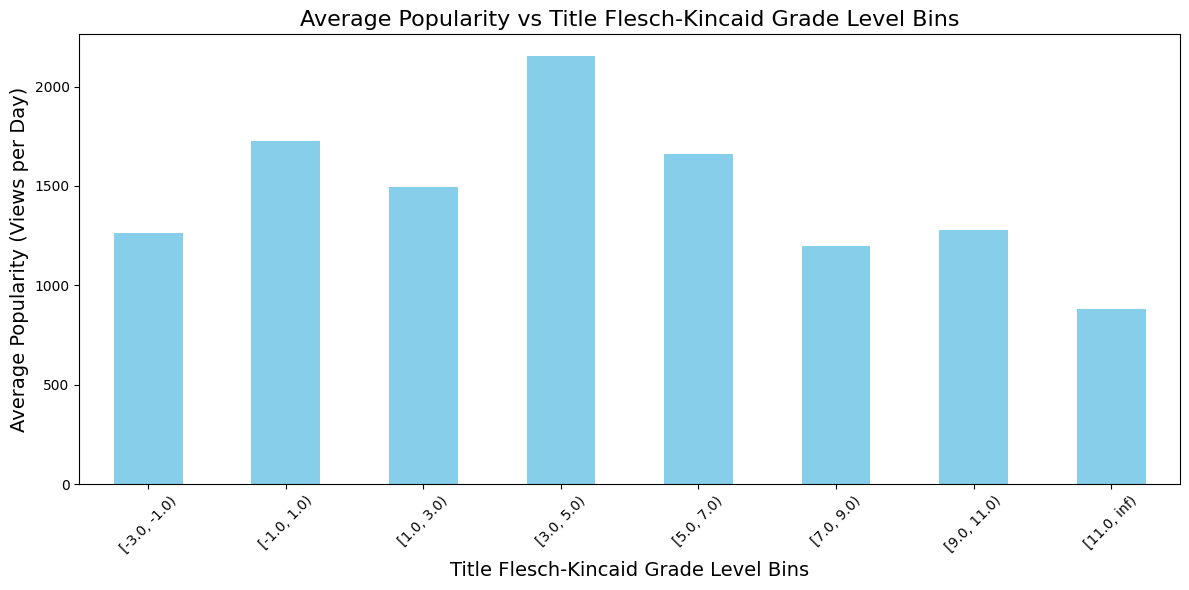

C:\Users\arsal\AppData\Local\Temp\ipykernel_23892\3001524706.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='fk_grade_bins', y='Popularity', data=df, palette='viridis')


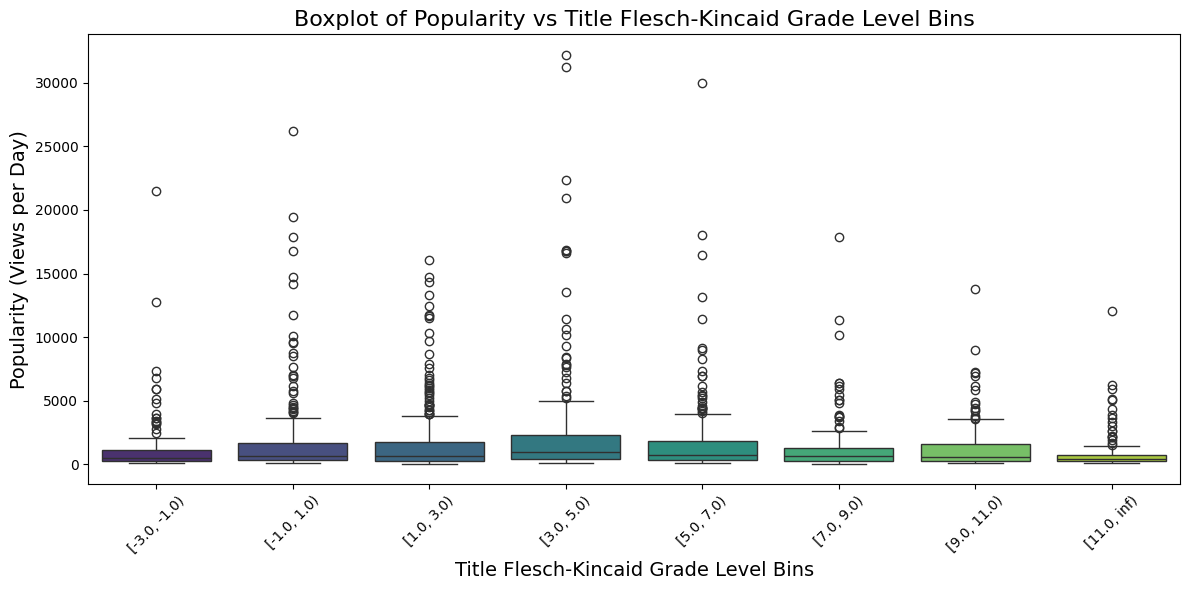

ANOVA p-value: 2.298205594314472e-05


In [469]:


import pandas as pd
import seaborn as sns
from scipy.stats import f_oneway
import matplotlib.pyplot as plt

# Load the dataset
df = tedmain_cleaned

# Create bins for the Flesch-Kincaid grade level
bins = pd.cut(df['title_flesch_kincaid_grade_level'], bins=[-3, -1, 1, 3, 5, 7, 9, 11, float('inf')], right=False)

# Calculate the average popularity for each bin
popularity_by_bins = df.groupby(bins)['Popularity'].mean()

# Plot the graph for average popularity vs Flesch-Kincaid grade level bins
plt.figure(figsize=(12, 6))
popularity_by_bins.plot(kind='bar', color='skyblue')
plt.title("Average Popularity vs Title Flesch-Kincaid Grade Level Bins", fontsize=16)
plt.xlabel("Title Flesch-Kincaid Grade Level Bins", fontsize=14)
plt.ylabel("Average Popularity (Views per Day)", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Create a new column 'fk_grade_bins' for the Flesch-Kincaid grade level bins
df['fk_grade_bins'] = pd.cut(df['title_flesch_kincaid_grade_level'], bins=[-3, -1, 1, 3, 5, 7, 9, 11, float('inf')], right=False)

# Create the boxplot for average popularity vs. Flesch-Kincaid grade level bins
plt.figure(figsize=(12, 6))
sns.boxplot(x='fk_grade_bins', y='Popularity', data=df, palette='viridis')
plt.title("Boxplot of Popularity vs Title Flesch-Kincaid Grade Level Bins", fontsize=16)
plt.xlabel("Title Flesch-Kincaid Grade Level Bins", fontsize=14)
plt.ylabel("Popularity (Views per Day)", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Perform ANOVA to check if the differences in average popularity between bins are statistically significant
anova_result = f_oneway(*[df[df['title_flesch_kincaid_grade_level'].between(bin.left, bin.right, inclusive='left')]['Popularity'] for bin in bins.cat.categories])

# Print the ANOVA result
print(f"ANOVA p-value: {anova_result.pvalue}")


In [ ]:
import pandas as pd

# Create a DataFrame with the binned Flesch-Kincaid grade levels and the corresponding popularity
binned_df = pd.DataFrame({
    'Flesch_Kincaid_Bin': bins,
    'Popularity': df['Popularity']
})

# Calculate the mean popularity for each bin
mean_popularity_by_bin = binned_df.groupby('Flesch_Kincaid_Bin')['Popularity'].mean().reset_index()

# Calculate the correlation between the binned Flesch-Kincaid grade levels and popularity
correlation = mean_popularity_by_bin['Flesch_Kincaid_Bin'].cat.codes.corr(mean_popularity_by_bin['Popularity'])

print(f"Correlation between Flesch-Kincaid grade level bins and popularity: {correlation}")

Correlation between Flesch-Kincaid grade level bins and popularity: -0.4707727947366657


C:\Users\arsal\AppData\Local\Temp\ipykernel_23892\296015294.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_popularity_by_bin = binned_df.groupby('Flesch_Kincaid_Bin')['Popularity'].mean().reset_index()


In [320]:
# Filter the DataFrame to include only titles with a negative negative_FK_Grade_titlest 
negative_FK_Grade_titles = tedmain_cleaned[tedmain_cleaned['title_flesch_kincaid_grade_level'] < 0]

# Display the filtered titles
print(negative_FK_Grade_titles[['title', 'title_flesch_kincaid_grade_level']])

                                             title  \
19                          The birth of Wikipedia   
38                Why did I ski to the North Pole?   
75                           Singing "What I Want"   
84                         The shrimp with a kick!   
101                                "Black Men Ski"   
...                                            ...   
2350               A video game to cope with grief   
2390                        How I built a jet suit   
2413  You smell with your body, not just your nose   
2414         Why I still have hope for coral reefs   
2422                              Let's end ageism   

      title_flesch_kincaid_grade_level  
19                                -2.3  
38                                -0.8  
75                                -2.3  
84                                -1.9  
101                               -2.7  
...                                ...  
2350                              -1.2  
2390                   

Observation: titles with negative 'title_flesch_kincaid_grade_level' seems to be vague

In [321]:
# Filter the DataFrame to include only titles with a 11+ FK_Grade_titles
elevenPlus_FK_Grade_titles = tedmain_cleaned[tedmain_cleaned['title_flesch_kincaid_grade_level'] > 11]

# Display the filtered titles
print(elevenPlus_FK_Grade_titles[['title', 'title_flesch_kincaid_grade_level']])

                                                  title  \
2                                      Simplicity sells   
44                 The accelerating power of technology   
58                             Four American characters   
59                                  Everyday inventions   
113           Let's rethink America's military strategy   
...                                                 ...   
2295          The incredible inventions of intuitive AI   
2301        An electrifying acoustic guitar performance   
2305                     Don't fear superintelligent AI   
2311  Smelfies, and other experiments in synthetic b...   
2345    An intergalactic guide to using a defibrillator   

      title_flesch_kincaid_grade_level  
2                                 14.7  
44                                17.0  
58                                12.7  
59                                20.6  
113                               17.0  
...                                ...  
2295

Observation: titles with 11+ 'title_flesch_kincaid_grade_level' seems to be more intelectual topic

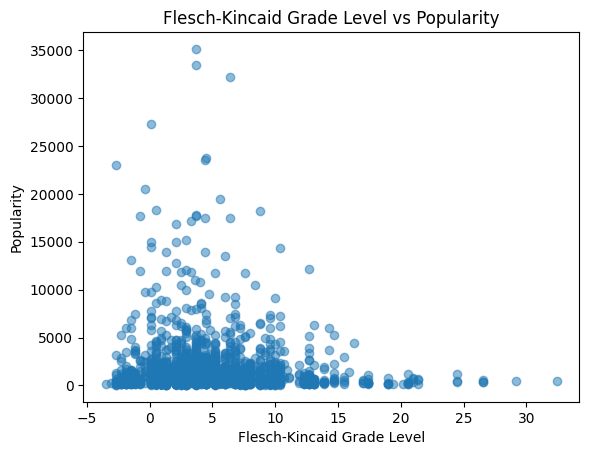

In [323]:
import matplotlib.pyplot as plt

# Scatter plot to visualize the relationship
plt.scatter(tedmain_cleaned['title_flesch_kincaid_grade_level'], tedmain_cleaned['Popularity'],alpha=0.5)
plt.title('Flesch-Kincaid Grade Level vs Popularity')
plt.xlabel('Flesch-Kincaid Grade Level')
plt.ylabel('Popularity')
plt.show()


observation: The title  should not be too complex and also it shouldent be vague

simple and clear titles are more popular

In [366]:


# Calculate correlation between sentiment score and popularity
from scipy import stats


sentiment_corr = tedmain_cleaned['title_sentiment_score'].corr(tedmain_cleaned['Popularity'])

# Calculate p-value for correlation
sentiment_p_value = stats.pearsonr(tedmain_cleaned['title_sentiment_score'], tedmain_cleaned['Popularity'])[1]

# Check if correlation is statistically significant
sentiment_significant = sentiment_p_value < 0.05

# Print results
print(f"Correlation between sentiment score and popularity: {sentiment_corr}")
print(f"P-value for sentiment score: {sentiment_p_value}")
print(f"Statistical significance (sentiment score): {'Yes' if sentiment_significant else 'No'}")


Correlation between sentiment score and popularity: 0.05225964810946112
P-value for sentiment score: 0.021850290588395542
Statistical significance (sentiment score): Yes


Observation: sentiment of title dosent effect popularity

***Analysing I- [Tags]***

**2.1 Are some topics  inherently more popular?**

analysisng if presence and absence of some tags in a video makes them more appealing?

In [327]:
import ast

# Convert tags from string to list
tedmain_cleaned["tags"] = tedmain_cleaned["tags"].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)


In [331]:
from sklearn.preprocessing import MultiLabelBinarizer

# One-hot encoding tags
mlb = MultiLabelBinarizer()
tags_encoded = mlb.fit_transform(tedmain_cleaned["tags"])
tags_df = pd.DataFrame(tags_encoded, columns=mlb.classes_, index=tedmain_cleaned.index)

# Merge with Popularity
ted_tags_popularity = pd.concat([tags_df, tedmain_cleaned["Popularity"]], axis=1)
ted_tags_popularity

3d printing  AI  AIDS  Addiction  Africa  Alzheimer's  Anthropocene  \
2               0   0     0          0       0            0             0   
3               0   0     0          0       0            0             0   
7               0   0     0          0       0            0             0   
10              0   0     0          0       0            0             0   
11              0   0     0          0       0            0             0   
...           ...  ..   ...        ...     ...          ...           ...   
2422            0   0     0          0       0            0             0   
2423            0   0     0          0       0            0             0   
2426            0   0     0          0       0            0             0   
2432            0   0     0          0       0            0             0   
2441            0   0     0          0       1            0             0   

      Asia  Autism spectrum disorder  Bioethics  ...  wind energy  women  \
2        0                         0          0  ...            0      0   
3        0                         0          0  ...            0      0   
7        0                         0          0  ...            0      0   
10       0                         0          0  ...            0      0   
11       0                         0          0  ...            0      0   
...    ...                       ...        ...  ...          ...    ...   
2422     0                         0          0  ...            0      0   
2423     0                         0          0  ...            0      0   
2426     0                         0          0  ...            0      0   
2432     0                         0          0  ...            0      0   
2441     0                         0          0  ...            0      0   

      women in business  work  work-life balance  world cultures  writing  \
2                     0     0                  0               0        0   
3                     0     0                  0               0        0   
7                     0     0                  0               0        0   
10                    0     0                  0               0        0   
11                    0     0                  0               0        0   
...                 ...   ...                ...             ...      ...   
2422                  0     0                  0               0        0   
2423                  0     0                  0               0        0   
2426                  0     0                  0               0        0   
2432                  0     0                  0               0        0   
2441                  0     0                  0               0        0   

      wunderkind  youth    Popularity  
2              0      0    398.803802  
3              0      0    413.733853  
7              0      0    236.611491  
10             0      0    297.280000  
11             0      0     95.184540  
...          ...    ...           ...  
2422           0      0  23040.571429  
2423           0      0  32178.707317  
2426           0      0  19506.243243  
2432           0      0  35134.121212  
2441           0      0  23768.954545  

[1925 rows x 415 columns]

In [332]:
tedmain_cleaned.tags

2       [computers, entertainment, interface design, m...
3       [MacArthur grant, activism, business, cities, ...
7       [architecture, collaboration, culture, design,...
10      [activism, architecture, collaboration, cultur...
11      [TED Prize, art, culture, entertainment, film,...
                              ...                        
2422    [aging, humanity, identity, inequality, person...
2423    [Moon, TEDx, astronomy, beauty, nature, scienc...
2426    [TED Fellows, activism, art, community, fear, ...
2432    [aging, brain, community, family, friendship, ...
2441    [Africa, TED Fellows, art, creativity, storyte...
Name: tags, Length: 1925, dtype: object

In [98]:
from scipy.stats import spearmanr

correlations = {
    tag: spearmanr(ted_tags_popularity[tag], ted_tags_popularity["Popularity"]).correlation
    for tag in mlb.classes_
}
correlations_df = pd.DataFrame.from_dict(correlations, orient='index', columns=['Correlation'])




**Purpose**
The code below assesses whether the presence or absence of each tag has a statistically significant impact on the "Popularity" of TED Talks. The Mann-Whitney U test checks if the distributions of popularity scores differ between two groups:

Group 1: TED Talks where a specific tag is present.
Group 2: TED Talks where the same tag is absent.

**Key Assumptions**
The Mann-Whitney U test assumes the two groups are independent.

It tests for differences in the medians of the two groups, not means.

we can use this test because our group tag presence or absence are independent and our dependent variable(Popularity) is continuous

In [99]:
from scipy.stats import mannwhitneyu

p_values = {}
for tag in mlb.classes_:
    present = ted_tags_popularity[ted_tags_popularity[tag] == 1]["Popularity"]
    absent = ted_tags_popularity[ted_tags_popularity[tag] == 0]["Popularity"]
    stat, p = mannwhitneyu(present, absent, alternative='two-sided')
    p_values[tag] = p

p_values_df = pd.DataFrame.from_dict(p_values, orient='index', columns=['p_value'])


In [100]:
from statsmodels.stats.multitest import multipletests

# Correct for multiple comparisons using False Discovery Rate3
adjusted_p_values = multipletests(p_values_df['p_value'], method='fdr_bh')[1]
p_values_df['adjusted_p_value'] = adjusted_p_values


Since many statistical tests are performed (one for each tag), the False Discovery Rate (FDR) correction is applied using the Benjamini-Hochberg method (fdr_bh).

In [101]:
# Filter significant tags
significant_tags = p_values_df[p_values_df['adjusted_p_value'] < 0.05]
final_results = correlations_df.join(significant_tags).dropna().sort_values('Correlation', ascending=False)
print(final_results)


               Correlation       p_value  adjusted_p_value
society           0.212915  3.066477e-24      1.266455e-21
identity          0.208568  2.517417e-23      5.198465e-21
humanity          0.176317  4.045691e-17      5.569568e-15
innovation        0.173778  1.128291e-16      1.164961e-14
potential         0.168354  9.616605e-16      7.943316e-14
...                    ...           ...               ...
Africa           -0.088567  2.386928e-05      2.738336e-04
technology       -0.102483  1.012559e-06      1.873612e-05
entertainment    -0.118684  1.495473e-08      3.860191e-07
design           -0.124058  3.249479e-09      8.946900e-08
global issues    -0.135981  8.741585e-11      3.610275e-09

[124 rows x 3 columns]


In [108]:
# Save the DataFrame to a CSV file
final_results.to_csv("significant_tags_correlation.csv", index=True)

print("Data saved to 'significant_tags_correlation.csv'")


Data saved to 'significant_tags_correlation.csv'


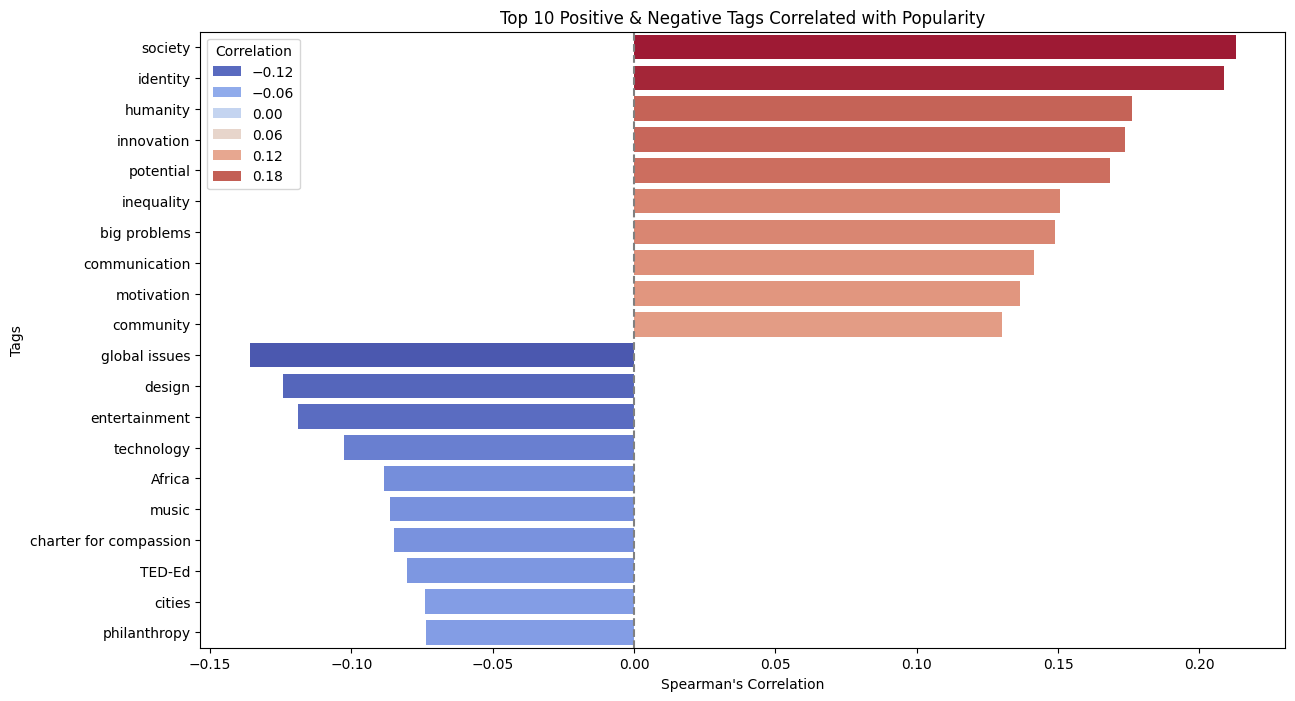

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns

# Top 10 Positive and Negative Tags
top_positive = final_results.nlargest(10, 'Correlation')
top_negative = final_results.nsmallest(10, 'Correlation')

# Combine both for visualization
viz_data = pd.concat([top_positive, top_negative])

# Plot
plt.figure(figsize=(14, 8))
sns.barplot(data=viz_data.reset_index(), x="Correlation", y="index", hue="Correlation", dodge=False, palette="coolwarm")
plt.axvline(0, color="gray", linestyle="--")
plt.title("Top 10 Positive & Negative Tags Correlated with Popularity")
plt.xlabel("Spearman's Correlation")
plt.ylabel("Tags")
plt.show()


C:\Users\arsal\AppData\Local\Temp\ipykernel_23892\600374730.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=tedmain_cleaned, x=tag, y="Popularity", palette="coolwarm")


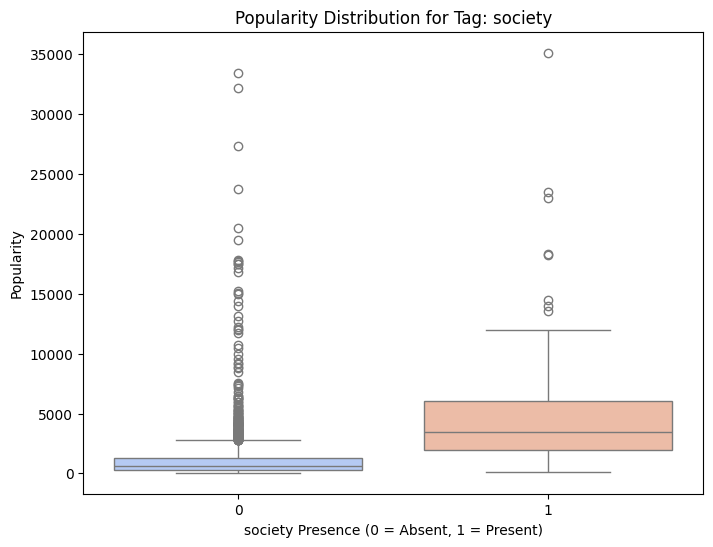

C:\Users\arsal\AppData\Local\Temp\ipykernel_23892\600374730.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=tedmain_cleaned, x=tag, y="Popularity", palette="coolwarm")


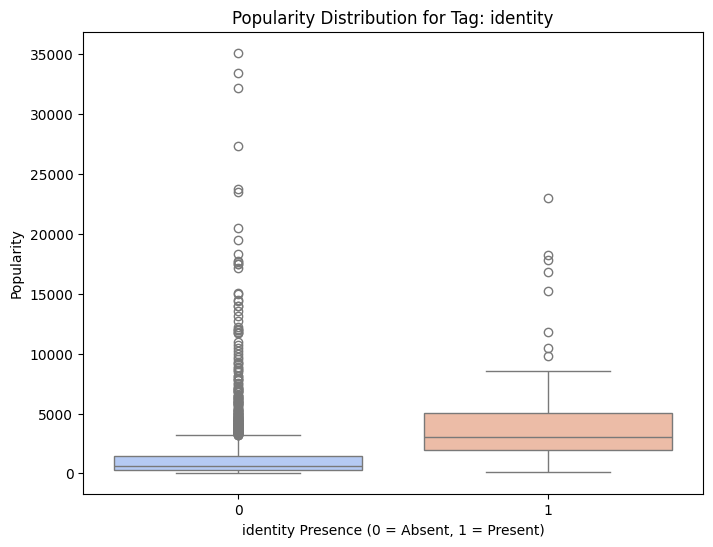

C:\Users\arsal\AppData\Local\Temp\ipykernel_23892\600374730.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=tedmain_cleaned, x=tag, y="Popularity", palette="coolwarm")


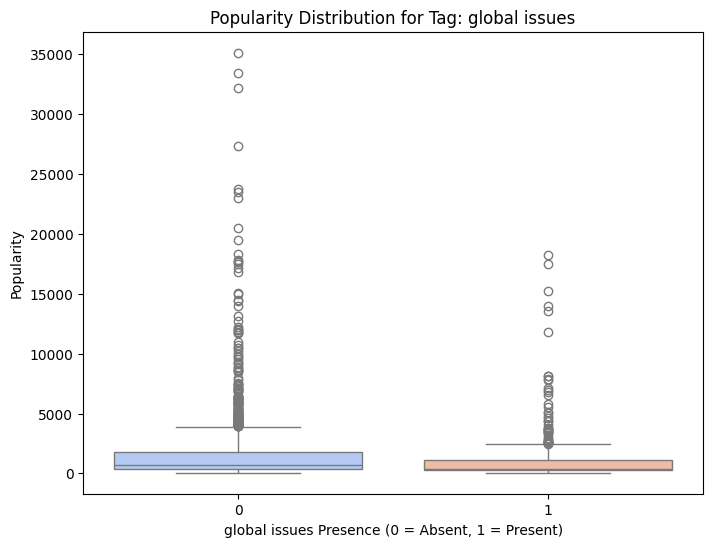

C:\Users\arsal\AppData\Local\Temp\ipykernel_23892\600374730.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=tedmain_cleaned, x=tag, y="Popularity", palette="coolwarm")


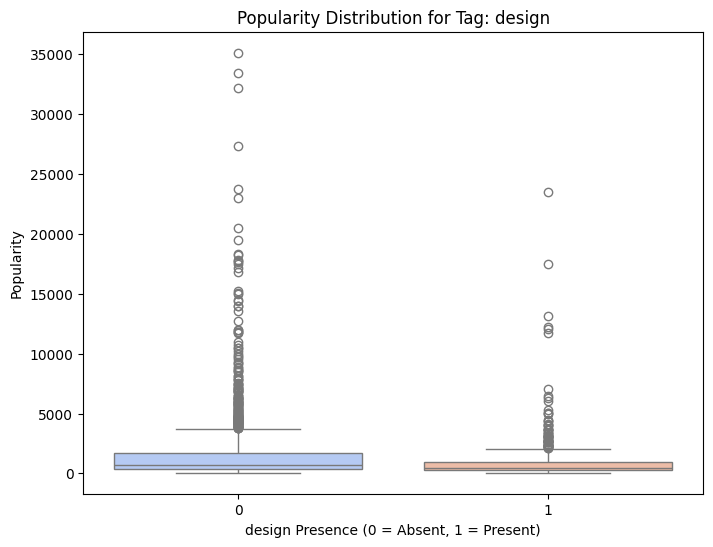

In [336]:
# Example for selected tags
key_tags = ['society', 'identity', 'global issues', 'design']

# Create a new column for each key tag indicating its presence (1) or absence (0)
for tag in key_tags:
    tedmain_cleaned[tag] = tedmain_cleaned['tags'].apply(lambda x: 1 if tag in x else 0)

for tag in key_tags:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=tedmain_cleaned, x=tag, y="Popularity", palette="coolwarm")
    plt.title(f'Popularity Distribution for Tag: {tag}')
    plt.xlabel(f'{tag} Presence (0 = Absent, 1 = Present)')
    plt.ylabel("Popularity")
    plt.show()


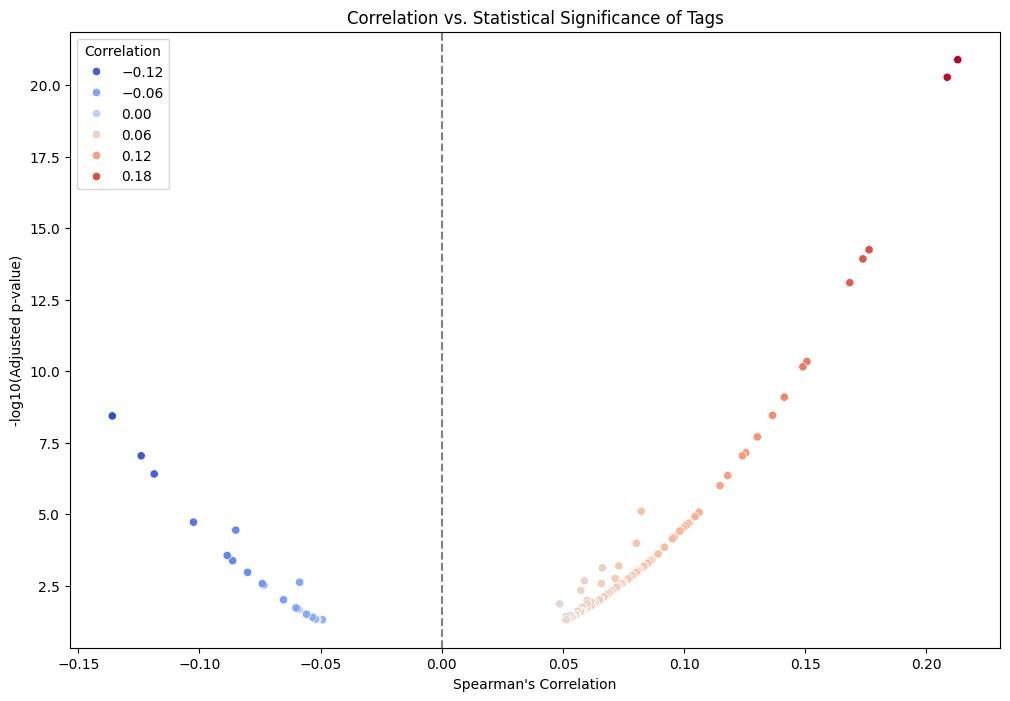

In [107]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=final_results, x='Correlation', y=-np.log10(final_results['adjusted_p_value']), hue='Correlation', palette='coolwarm')
plt.title("Correlation vs. Statistical Significance of Tags")
plt.xlabel("Spearman's Correlation")
plt.ylabel("-log10(Adjusted p-value)")
plt.axvline(0, color="gray", linestyle="--")
plt.show()


Observation: ingeneral other than society and identity showed a weak +ve correlation with popularity other then these two there was no significant effect on popularity due to presence or absence of a tag.

In [337]:
tedmain_cleaned.columns

Index(['comments', 'description', 'duration', 'event', 'film_date',
       'languages', 'main_speaker', 'name', 'num_speaker', 'published_date',
       'ratings', 'related_talks', 'speaker_occupation', 'tags', 'title',
       'url', 'views', 'transcript', 'days_out', 'rating_score',
       'normalized_rating_score', 'Published_Date', 'Scraping_Date',
       'Days_Since_Published', 'Popularity', 'feedback', 'text_tense',
       'published_year', 'title_length', 'title_word_count',
       'title_flesch_kincaid_grade_level', 'title_sentiment_score',
       'tag_count', 'description_word_count',
       'description_flesch_kincaid_grade_level', 'description_sentiment_score',
       'Category', 'first_word', 'last_word', 'last_char', 'society',
       'identity', 'global issues', 'design'],
      dtype='object')

***Analysing I- [Tags]***

**2.2 tags count**

analysisng if number of tags have a effect on popularity or not 

In [338]:
tedmain_cleaned["tag_count"]

2        9
3        9
7        5
10      10
11      10
        ..
2422     7
2423     8
2426    10
2432     8
2441     5
Name: tag_count, Length: 1925, dtype: int64

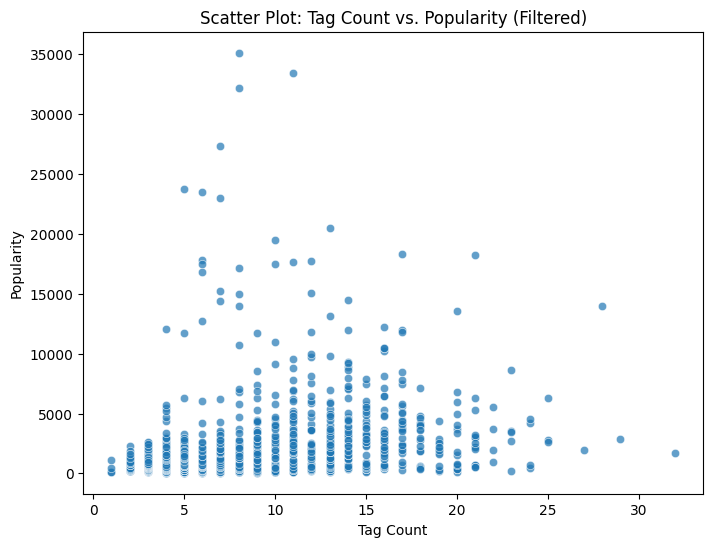

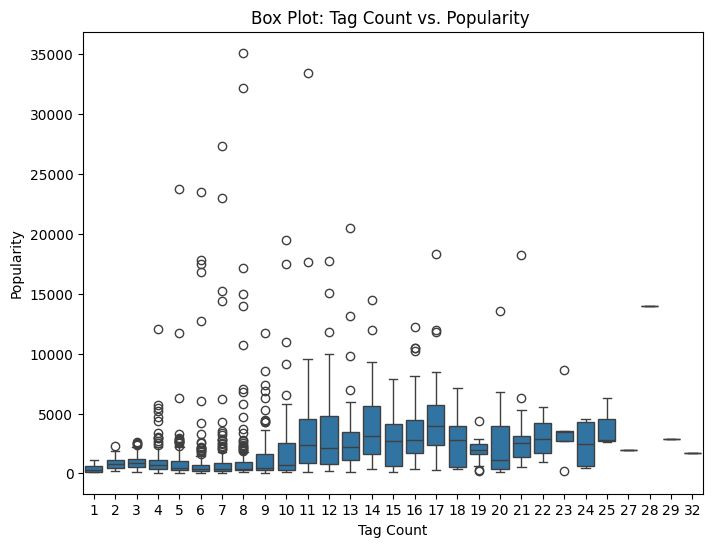

In [340]:
# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=tedmain_cleaned, x='tag_count', y='Popularity', alpha=0.7)
plt.title('Scatter Plot: Tag Count vs. Popularity (Filtered)')
plt.xlabel('Tag Count')
plt.ylabel('Popularity')
plt.show()

# Box plot
plt.figure(figsize=(8, 6))
sns.boxplot(data=tedmain_cleaned, x='tag_count', y='Popularity')
plt.title('Box Plot: Tag Count vs. Popularity ')
plt.xlabel('Tag Count')
plt.ylabel('Popularity')
plt.show()


In [341]:
from scipy.stats import spearmanr

# Compute Spearman correlation
correlation, p_value = spearmanr(tedmain_cleaned['tag_count'], tedmain_cleaned['Popularity'])

print(f"Spearman Correlation : {correlation:.4f}")
print(f"P-value: {p_value:.4e}")


Spearman Correlation : 0.2635
P-value: 6.2787e-32


In [344]:
grouped_data = tedmain_cleaned.groupby('tag_count')['Popularity'].agg(['mean', 'median', 'count']).reset_index()
print(grouped_data)


    tag_count          mean        median  count
0           1    451.825108    284.752267      4
1           2    819.429402    744.471805     39
2           3    942.923507    834.240545    149
3           4    962.177383    682.483750    230
4           5    840.094189    475.156951    339
5           6    937.800201    401.111056    249
6           7   1094.979213    406.495824    197
7           8   1703.285553    398.039257    135
8           9   1344.414638    473.991823    108
9          10   2043.673571    683.742449     77
10         11   3573.854076   2342.628242     57
11         12   3672.164656   2101.755067     44
12         13   2997.716522   2223.615025     60
13         14   4112.852219   3147.086860     43
14         15   2783.733561   2678.862327     36
15         16   3562.499107   2761.658799     42
16         17   4892.241688   3947.192007     28
17         18   2626.199319   2762.853067     21
18         19   1904.039870   1914.541300     14
19         20   2764

**only using the date with occurance of more than 10 for getting accurate results**

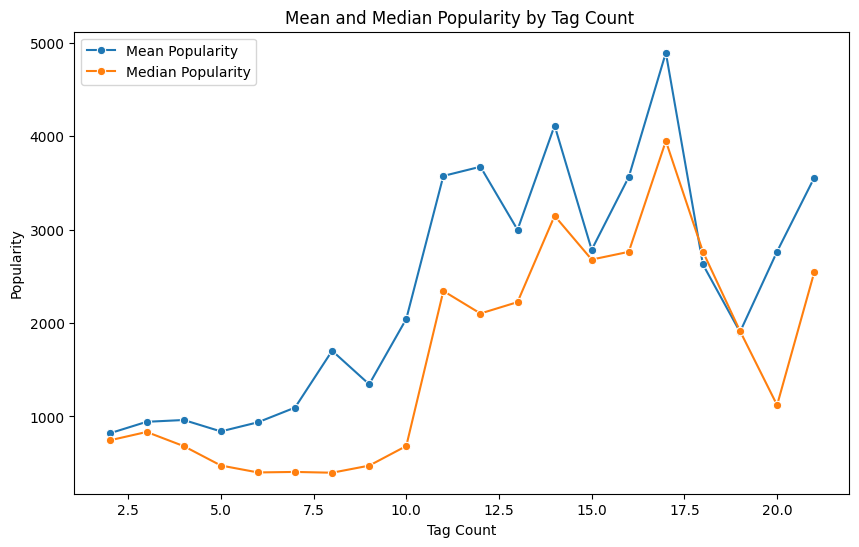

In [345]:

# Visualize mean and median popularity by tag count
plt.figure(figsize=(10, 6))
data_count_plus_10 = grouped_data[grouped_data['count'] >= 10]
sns.lineplot(data=data_count_plus_10, x='tag_count', y='mean', marker='o', label='Mean Popularity')
sns.lineplot(data=data_count_plus_10, x='tag_count', y='median', marker='o', label='Median Popularity')
plt.title('Mean and Median Popularity by Tag Count ')
plt.xlabel('Tag Count')
plt.ylabel('Popularity')
plt.legend()
plt.show()


Observation videos with Tags count btw 11 to 17 are more popular

***Analysing I- [description]***

**3.1 description word count**

Q) tedmain_filtered["description"] has the descriptions of the videos do a scientific analysis testing weather the length of the description and the Flesch-Kincaid Grade Level of the descriptions has a relation to the popularity of the video tedmain_filtered["Popularity"] and also checking for the statistical significance of it

C:\Users\arsal\AppData\Local\Temp\ipykernel_23892\2494647251.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  popularity_by_bins = tedmain_cleaned.groupby(bins)['Popularity'].mean()
C:\Users\arsal\AppData\Local\Temp\ipykernel_23892\2494647251.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  views_by_bins = tedmain_cleaned.groupby(bins)['views'].mean()


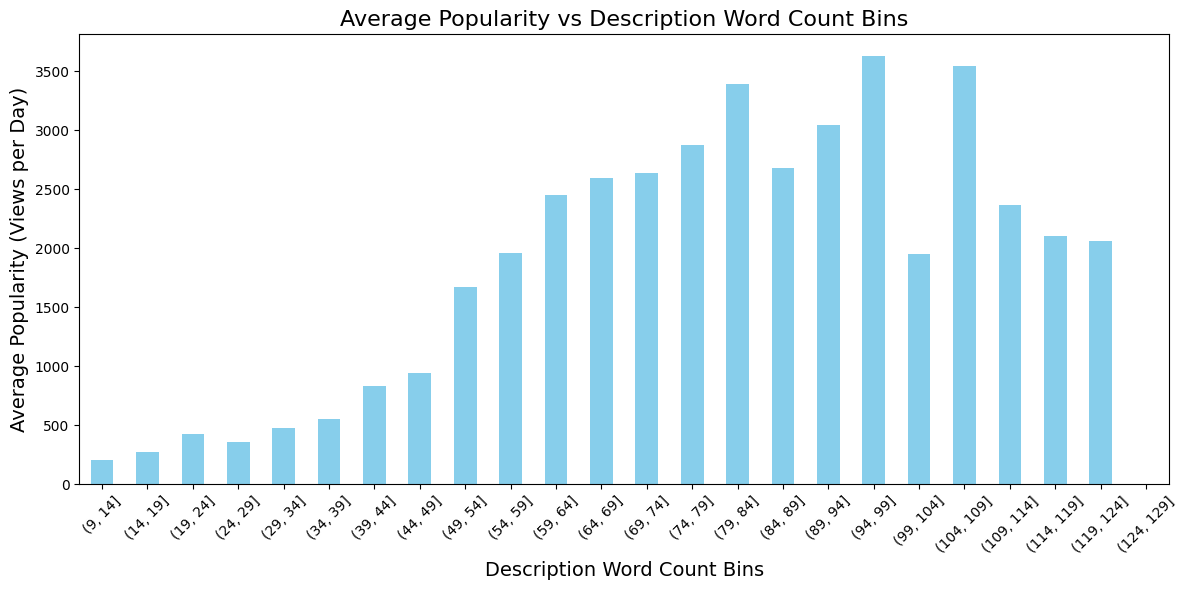

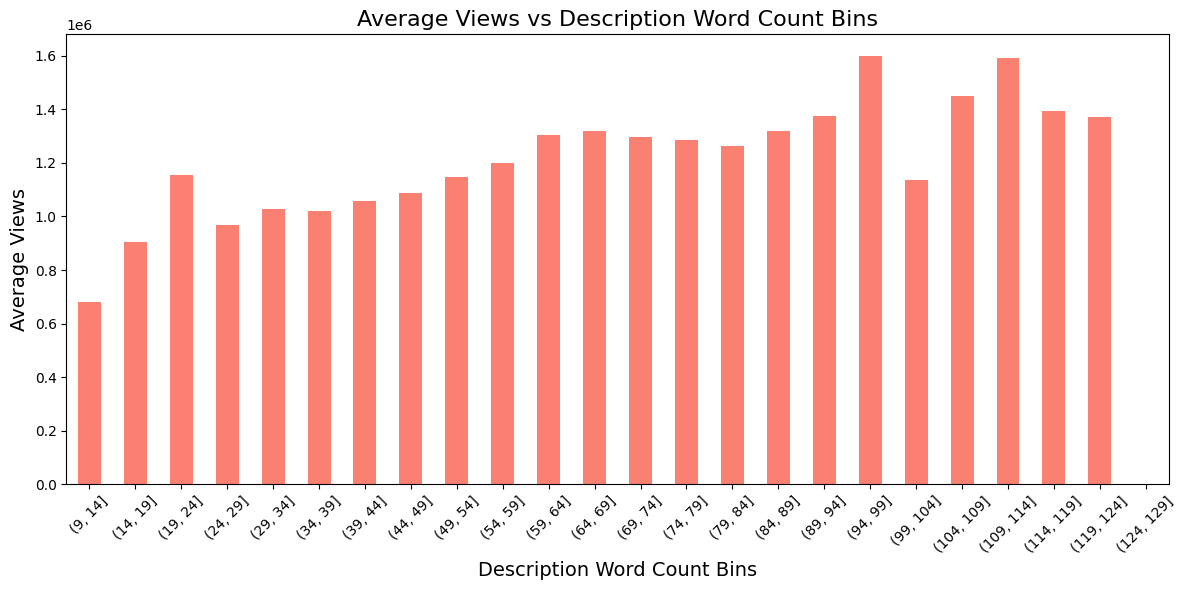

C:\Users\arsal\AppData\Local\Temp\ipykernel_23892\2494647251.py:34: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  feedback_by_bins = tedmain_cleaned.groupby(bins)['feedback'].mean()


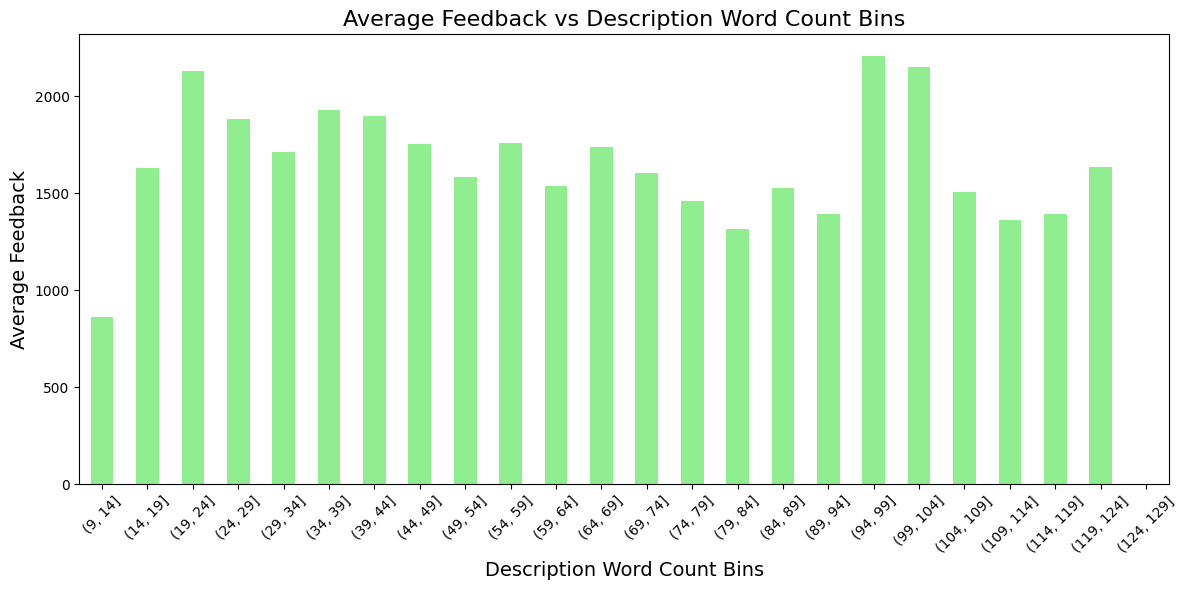

C:\Users\arsal\AppData\Local\Temp\ipykernel_23892\2494647251.py:47: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  normalized_rating_by_bins = tedmain_cleaned.groupby(bins)['normalized_rating_score'].mean()


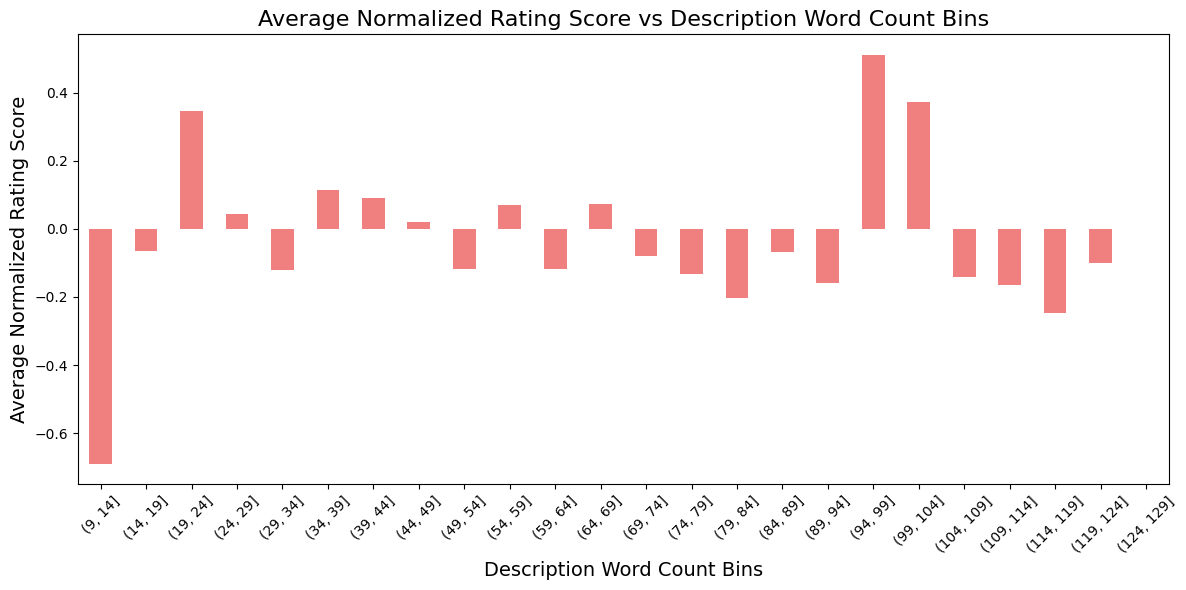

C:\Users\arsal\AppData\Local\Temp\ipykernel_23892\2494647251.py:60: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  reaction_by_bins = tedmain_cleaned.groupby(bins)['rating_score'].mean()


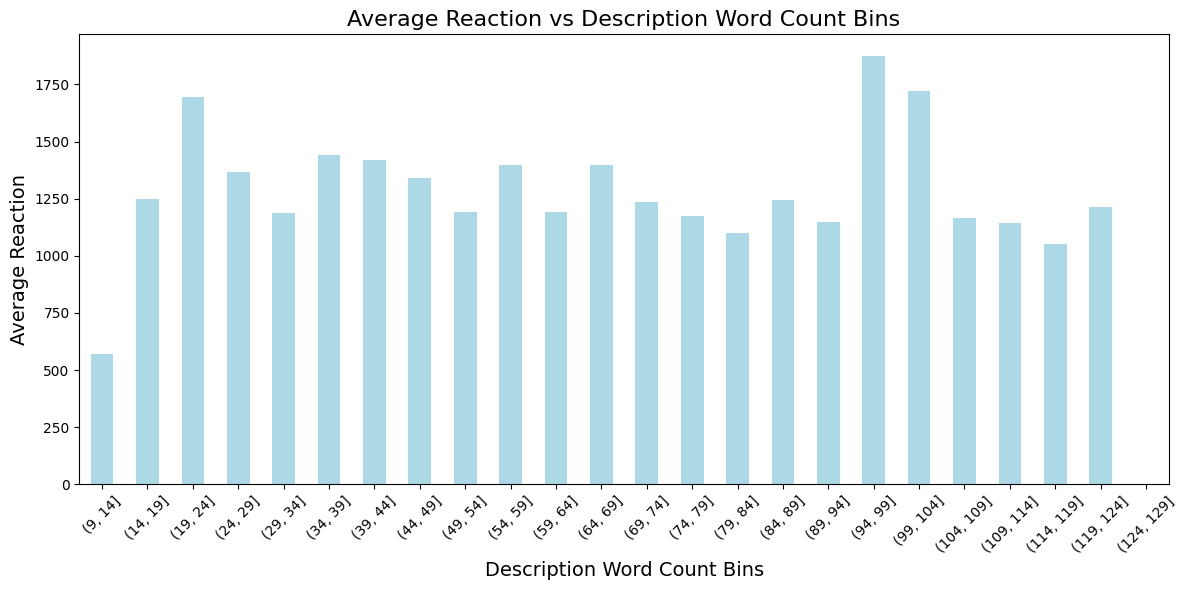

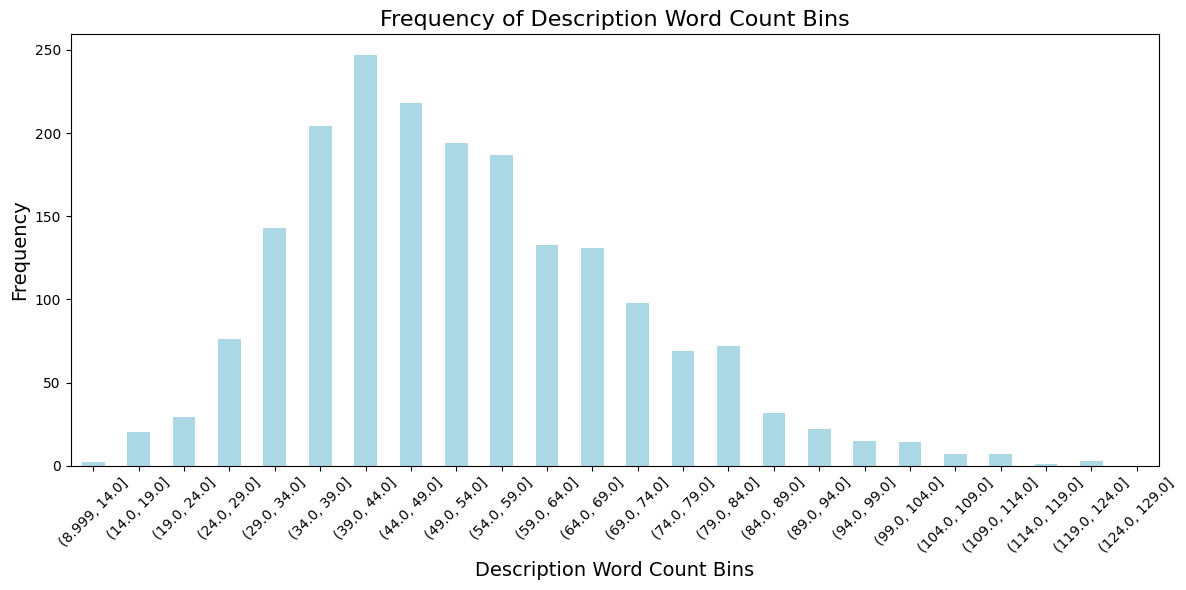

C:\Users\arsal\AppData\Local\Temp\ipykernel_23892\2494647251.py:89: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='bins', y='Popularity', data=df, palette='viridis')


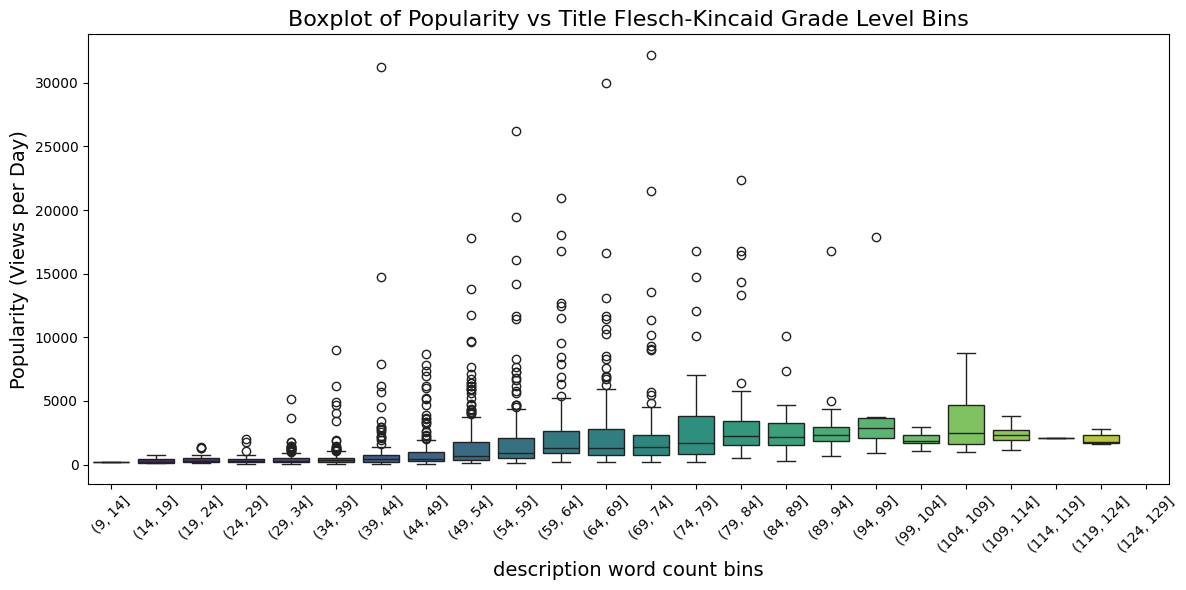

Popularity ANOVA p-value: 1.2278444174394632e-51
Views ANOVA p-value: 1.189098336901406e-15
Feedback ANOVA p-value: 0.00012442625817827983
Normalized Rating Score ANOVA p-value: 0.08229963507137061
Reaction ANOVA p-value: 0.08229963507137061


In [476]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway

# Create bins for the description word count with an interval of 2
bins = pd.cut(tedmain_cleaned['description_word_count'], bins=range(tedmain_cleaned['description_word_count'].min(), tedmain_cleaned['description_word_count'].max(), 5))

# Calculate the average Popularity and views for each bin
popularity_by_bins = tedmain_cleaned.groupby(bins)['Popularity'].mean()
views_by_bins = tedmain_cleaned.groupby(bins)['views'].mean()

# Plot the graph for Popularity vs bins for word count
plt.figure(figsize=(12, 6))
popularity_by_bins.plot(kind='bar', color='skyblue')
plt.title("Average Popularity vs Description Word Count Bins", fontsize=16)
plt.xlabel("Description Word Count Bins", fontsize=14)
plt.ylabel("Average Popularity (Views per Day)", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot the graph for views vs bins for word count
plt.figure(figsize=(12, 6))
views_by_bins.plot(kind='bar', color='salmon')
plt.title("Average Views vs Description Word Count Bins", fontsize=16)
plt.xlabel("Description Word Count Bins", fontsize=14)
plt.ylabel("Average Views", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Calculate the average feedback for each bin
feedback_by_bins = tedmain_cleaned.groupby(bins)['feedback'].mean()

# Plot the graph for feedback vs bins for word count
plt.figure(figsize=(12, 6))
feedback_by_bins.plot(kind='bar', color='lightgreen')
plt.title("Average Feedback vs Description Word Count Bins", fontsize=16)
plt.xlabel("Description Word Count Bins", fontsize=14)
plt.ylabel("Average Feedback", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Calculate the average normalized rating score for each bin
normalized_rating_by_bins = tedmain_cleaned.groupby(bins)['normalized_rating_score'].mean()

# Plot the graph for normalized rating score vs bins for word count
plt.figure(figsize=(12, 6))
normalized_rating_by_bins.plot(kind='bar', color='lightcoral')
plt.title("Average Normalized Rating Score vs Description Word Count Bins", fontsize=16)
plt.xlabel("Description Word Count Bins", fontsize=14)
plt.ylabel("Average Normalized Rating Score", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Calculate the average reaction for each bin
reaction_by_bins = tedmain_cleaned.groupby(bins)['rating_score'].mean()

# Plot the graph for reaction vs bins for word count
plt.figure(figsize=(12, 6))
reaction_by_bins.plot(kind='bar', color='lightblue')
plt.title("Average Reaction vs Description Word Count Bins", fontsize=16)
plt.xlabel("Description Word Count Bins", fontsize=14)
plt.ylabel("Average Reaction", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Calculate the frequency of each description word count bin
bin_frequency = tedmain_cleaned['description_word_count'].value_counts(bins=range(tedmain_cleaned['description_word_count'].min(), tedmain_cleaned['description_word_count'].max(), 5)).sort_index()

# Plot the frequency of description word count bins
plt.figure(figsize=(12, 6))
bin_frequency.plot(kind='bar', color='lightblue')
plt.title("Frequency of Description Word Count Bins", fontsize=16)
plt.xlabel("Description Word Count Bins", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Add the bins column to the DataFrame
df['bins'] = pd.cut(df['description_word_count'], bins=range(df['description_word_count'].min(), df['description_word_count'].max(), 5))

plt.figure(figsize=(12, 6))
sns.boxplot(x='bins', y='Popularity', data=df, palette='viridis')
plt.title("Boxplot of Popularity vs Title Flesch-Kincaid Grade Level Bins", fontsize=16)
plt.xlabel("description word count bins", fontsize=14)
plt.ylabel("Popularity (Views per Day)", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Perform ANOVA to check if the differences between bins are statistically significant
popularity_anova = f_oneway(*[tedmain_cleaned[tedmain_cleaned['description_word_count'].between(bin.left, bin.right)]['Popularity'] for bin in bins.cat.categories])
views_anova = f_oneway(*[tedmain_cleaned[tedmain_cleaned['description_word_count'].between(bin.left, bin.right)]['views'] for bin in bins.cat.categories])
feedback_anova = f_oneway(*[tedmain_cleaned[tedmain_cleaned['description_word_count'].between(bin.left, bin.right)]['feedback'] for bin in bins.cat.categories])
normalized_rating_anova = f_oneway(*[tedmain_cleaned[tedmain_cleaned['description_word_count'].between(bin.left, bin.right)]['normalized_rating_score'] for bin in bins.cat.categories])
reaction_anova = f_oneway(*[tedmain_cleaned[tedmain_cleaned['description_word_count'].between(bin.left, bin.right)]['rating_score'] for bin in bins.cat.categories])

# Print the ANOVA results
print(f"Popularity ANOVA p-value: {popularity_anova.pvalue}")
print(f"Views ANOVA p-value: {views_anova.pvalue}")
print(f"Feedback ANOVA p-value: {feedback_anova.pvalue}")
print(f"Normalized Rating Score ANOVA p-value: {normalized_rating_anova.pvalue}")
print(f"Reaction ANOVA p-value: {reaction_anova.pvalue}")


Observation videos with longer discriptions seems to be more popular

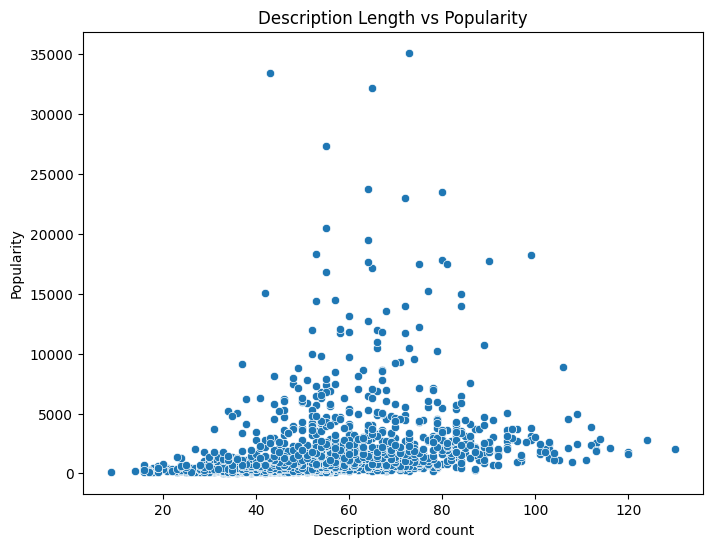

In [367]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot for description length vs popularity
plt.figure(figsize=(8, 6))
sns.scatterplot(data=tedmain_cleaned, x='description_word_count', y='Popularity')
plt.title('Description Length vs Popularity')
plt.xlabel('Description word count')
plt.ylabel('Popularity')
plt.show()


Key Takeaways:
Description length has a moderate and statistically significant correlation with popularity, suggesting that longer descriptions are somewhat associated with higher popularity.


***Analysing I- [description]***

**3.2 description language complexity**


 analysing if description language complexity effect popularity.

 The Flesch-Kincaid grade level is a test that measures how complex a piece of writing is and estimates the grade level needed to understand it. The test is based on a formula that analyzes the average number of syllables per word and words per sentence in a text. A lower score indicates easier reading.

In [359]:
import pandas as pd

# Assuming df is your DataFrame and 'title_flesch_kincaid_grade_level' is the column of interest
bins = pd.cut(df['description_flesch_kincaid_grade_level'], bins=range(int(df['description_flesch_kincaid_grade_level'].min()), int(df['description_flesch_kincaid_grade_level'].max()), 2))

# Calculate the frequency for each bin
bin_frequency = bins.value_counts().sort_index()

# Display the frequency for each bin
print(bin_frequency)

description_flesch_kincaid_grade_level
(2, 4]       11
(4, 6]       81
(6, 8]      293
(8, 10]     547
(10, 12]    469
(12, 14]    290
(14, 16]    143
(16, 18]     49
(18, 20]     32
(20, 22]      9
(22, 24]      0
Name: count, dtype: int64


create bin removing bin with few values namely [2,4] , [20,22] and [22,24] 

C:\Users\arsal\AppData\Local\Temp\ipykernel_23892\817796851.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  popularity_by_bins = df.groupby(bins)['Popularity'].mean()


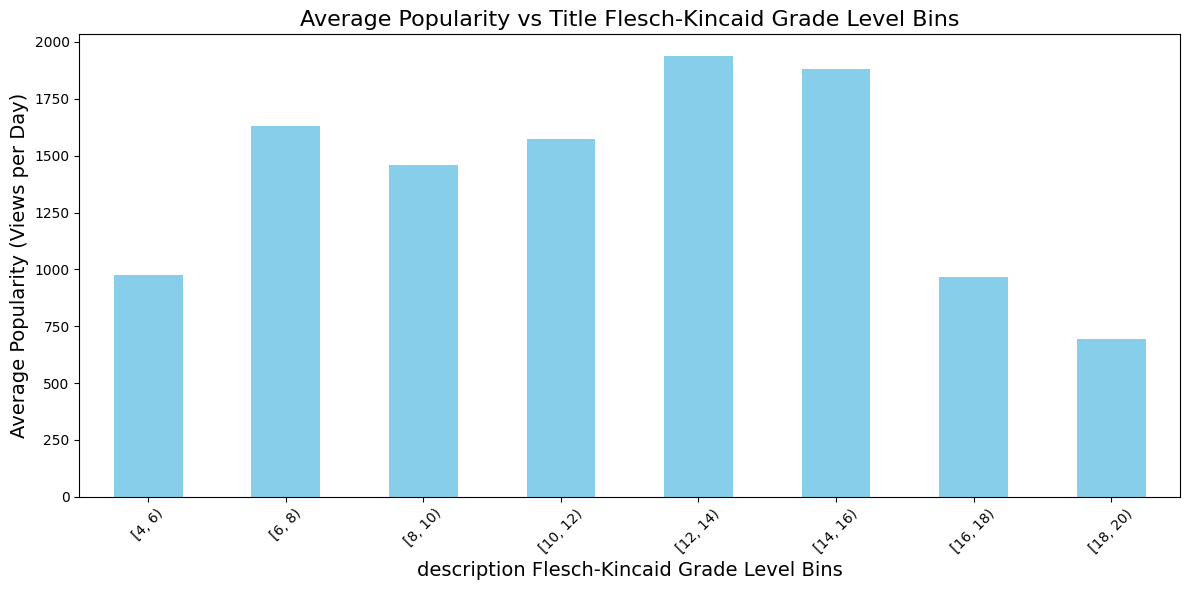

ANOVA p-value: 0.16355644630983526


In [386]:
import pandas as pd
import seaborn as sns
from scipy.stats import f_oneway
import matplotlib.pyplot as plt

# Load the dataset
df = tedmain_cleaned

# Create bins for the Flesch-Kincaid grade level
bins = pd.cut(df['description_flesch_kincaid_grade_level'], bins=[4,6,8,10,12,14,16,18,20], right=False)

# Calculate the average popularity for each bin
popularity_by_bins = df.groupby(bins)['Popularity'].mean()

# Plot the graph for average popularity vs Flesch-Kincaid grade level bins
plt.figure(figsize=(12, 6))
popularity_by_bins.plot(kind='bar', color='skyblue')
plt.title("Average Popularity vs Title Flesch-Kincaid Grade Level Bins", fontsize=16)
plt.xlabel("description Flesch-Kincaid Grade Level Bins", fontsize=14)
plt.ylabel("Average Popularity (Views per Day)", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Perform ANOVA to check if the differences in average popularity between bins are statistically significant
anova_result = f_oneway(*[df[df['title_flesch_kincaid_grade_level'].between(bin.left, bin.right, inclusive='left')]['Popularity'] for bin in bins.cat.categories])

# Print the ANOVA result
print(f"ANOVA p-value: {anova_result.pvalue}")


Observation- the complexity of the discription dosen't have effect on talks popularity

description Sentiment score vs popularity

In [365]:


# Calculate correlation between sentiment score and popularity
from scipy import stats


sentiment_corr = tedmain_cleaned['description_sentiment_score'].corr(tedmain_cleaned['Popularity'])

# Calculate p-value for correlation
sentiment_p_value = stats.pearsonr(tedmain_cleaned['description_sentiment_score'], tedmain_cleaned['Popularity'])[1]

# Check if correlation is statistically significant
sentiment_significant = sentiment_p_value < 0.05

# Print results
print(f"Correlation between sentiment score and popularity: {sentiment_corr}")
print(f"P-value for sentiment score: {sentiment_p_value}")
print(f"Statistical significance (sentiment score): {'Yes' if sentiment_significant else 'No'}")


Correlation between sentiment score and popularity: -0.03797828779117531
P-value for sentiment score: 0.09575141654790206
Statistical significance (sentiment score): No


The value is close to 0, which indicates that sentiment does not strongly influence popularity.

In [369]:
tedmain_cleaned.transcript

2       (Music: "The Sound of Silence," Simon & Garfun...
3       If you're here today — and I'm very happy that...
7       I'm going to present three projects in rapid f...
10      I'm going to take you on a journey very quickl...
11      I can't help but this wish: to think about whe...
                              ...                        
2422    What's one thing that every person in this roo...
2423    Before I get to bulk of what I have to say, I ...
2426    So, I'm afraid. Right now, on this stage, I fe...
2432    Here's an intriguing fact. In the developed wo...
2441    So, my mother's a pediatrician, and when I was...
Name: transcript, Length: 1925, dtype: object

***Analysing II- [transcript]***

**1.1 transcript word count**

tedmain_cleaned["transcript"] has the transcripts of the talks  I want to analysis if the length of the transcript( ie the no. of words in it ) and the tedmain_cleaned["languages"] and  the Flesch-Kincaid Grade of the transcript and the tedmain_cleaned["duration"] has any significant relation with the Popularity or not. also i want the visualization of the relation . 


**Feature engineering**

speech_pace=(no. of work in the transcript)/(duration of the talk in minutes)

In [479]:
tedmain_cleaned['transcript_word_count'] = tedmain_cleaned['transcript'].apply(lambda x: len(x.split()))
duration_min=tedmain_cleaned["duration"]/60
tedmain_cleaned["duration_min"]=duration_min
tedmain_cleaned["speech_pace"] = tedmain_cleaned['transcript_word_count'] / tedmain_cleaned['duration_min']
tedmain_cleaned['speech_pace']

2       151.772939
3       162.096774
7       165.025042
10      151.145686
11      150.663199
           ...    
2422    156.929699
2423    126.032609
2426    145.292308
2432    149.313929
2441    123.870968
Name: speech_pace, Length: 1925, dtype: float64

calculating transcripts sentiment score and fk grade

In [480]:
# Flesch-Kincaid Grade Level of the transcript
tedmain_cleaned['fk_grade_transcript'] = tedmain_cleaned['transcript'].apply(lambda x: textstat.flesch_kincaid_grade(x))

# Create a new column 'transcript_sentiment_score' that stores the sentiment polarity score of each title
tedmain_cleaned['transcript_sentiment_score'] = tedmain_cleaned['transcript'].apply(lambda x: TextBlob(x).sentiment.polarity)

only using bins with frequency more than 10, to get more precise result


C:\Users\arsal\AppData\Local\Temp\ipykernel_23892\3030761935.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  popularity_by_bins = tedmain_cleaned.groupby(bins)['Popularity'].mean().loc[filtered_bins]
C:\Users\arsal\AppData\Local\Temp\ipykernel_23892\3030761935.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  views_by_bins = tedmain_cleaned.groupby(bins)['views'].mean().loc[filtered_bins]


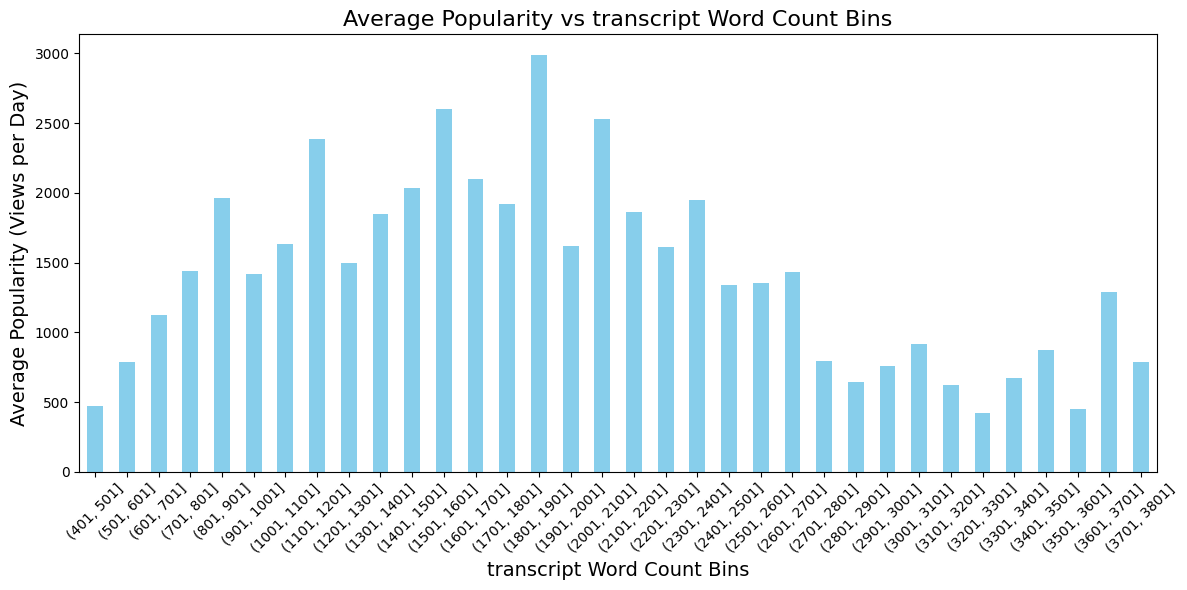

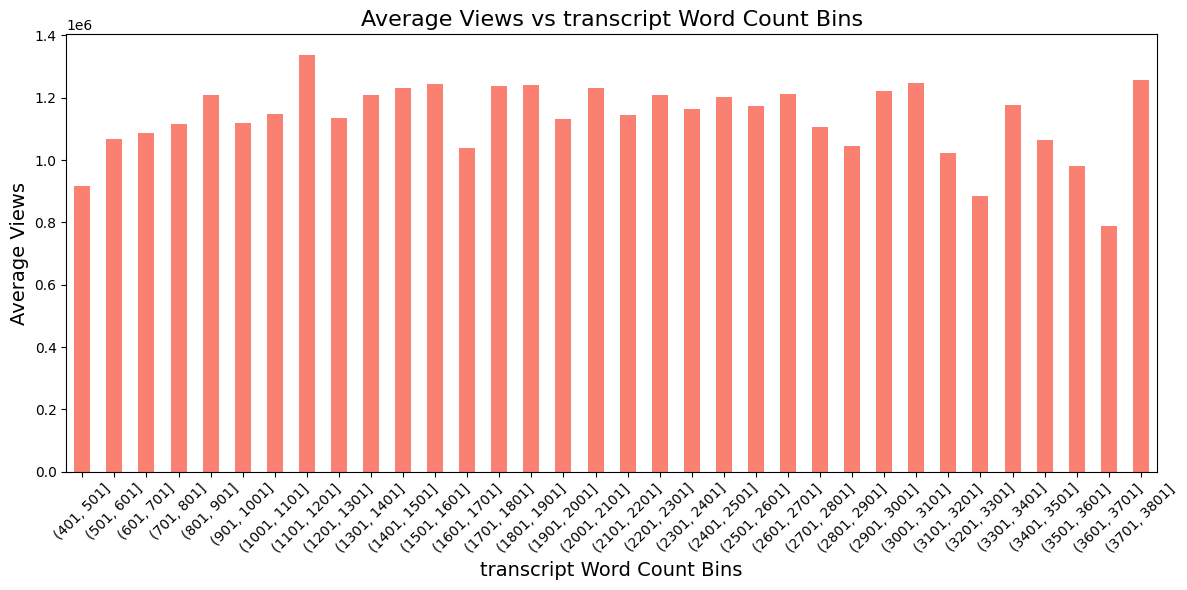

C:\Users\arsal\AppData\Local\Temp\ipykernel_23892\3030761935.py:40: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  feedback_by_bins = tedmain_cleaned.groupby(bins)['feedback'].mean().loc[filtered_bins]


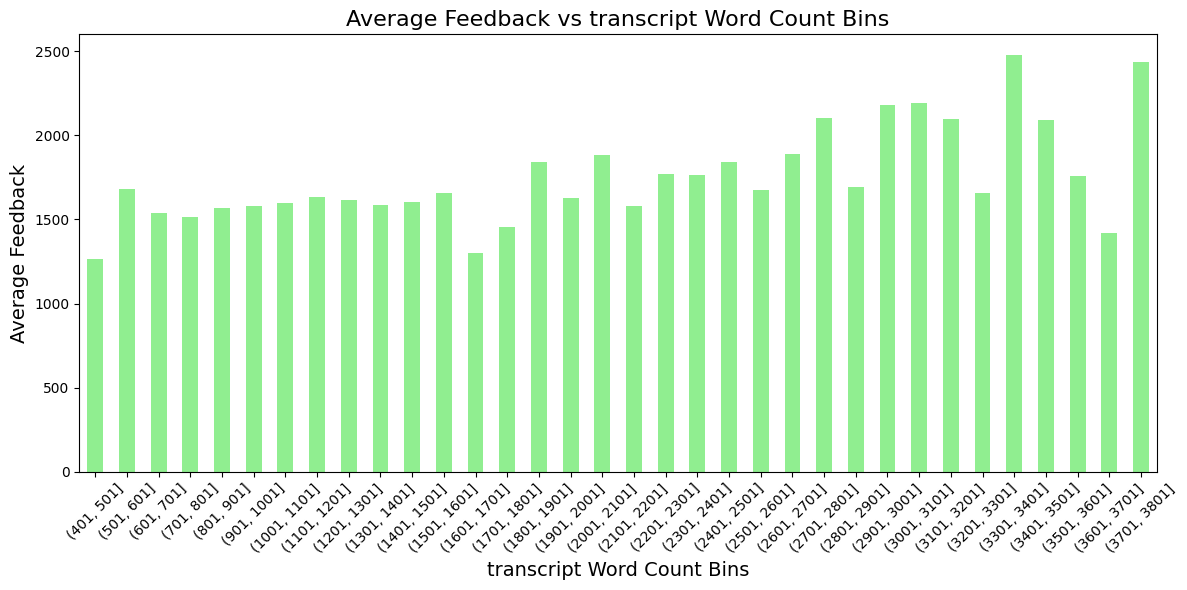

C:\Users\arsal\AppData\Local\Temp\ipykernel_23892\3030761935.py:53: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  normalized_rating_by_bins = tedmain_cleaned.groupby(bins)['normalized_rating_score'].mean().loc[filtered_bins]


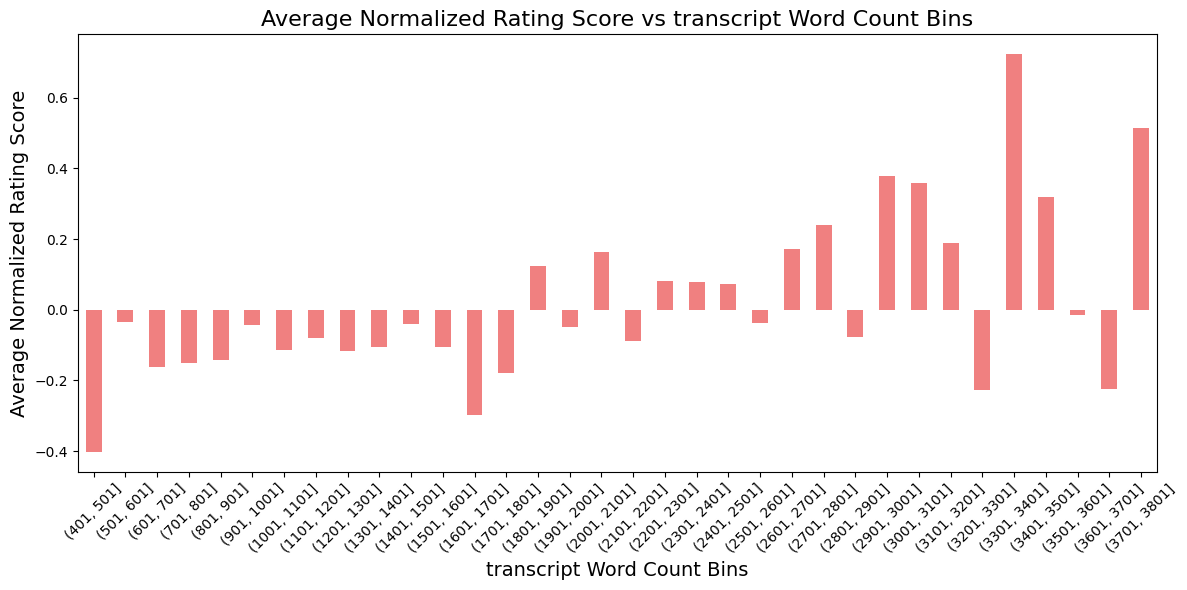

C:\Users\arsal\AppData\Local\Temp\ipykernel_23892\3030761935.py:66: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  reaction_by_bins = tedmain_cleaned.groupby(bins)['rating_score'].mean().loc[filtered_bins]


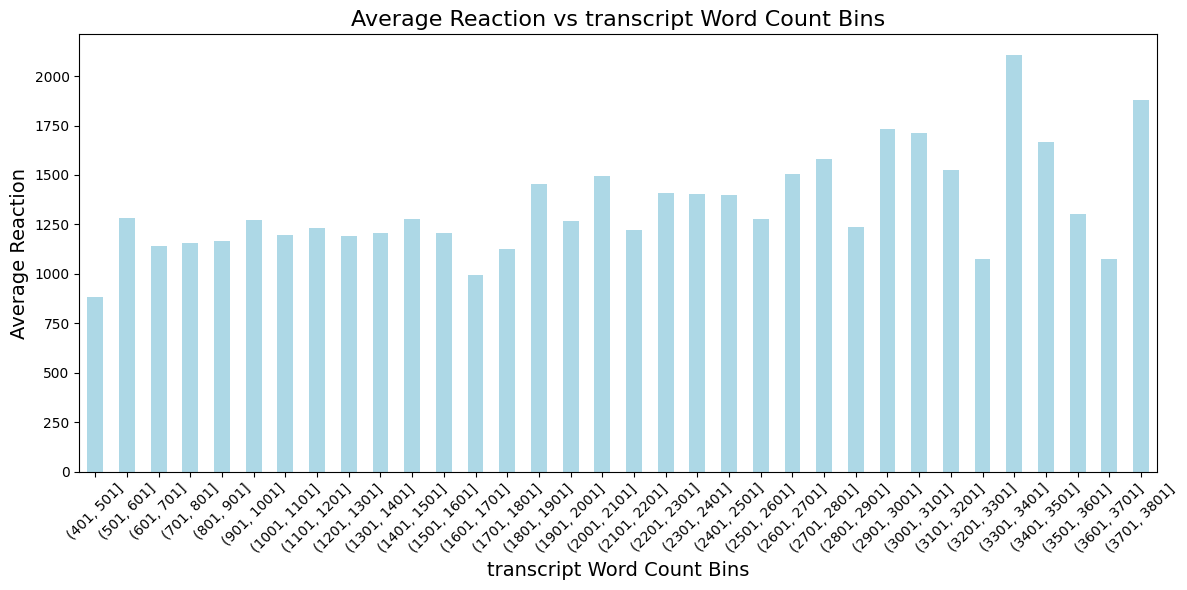

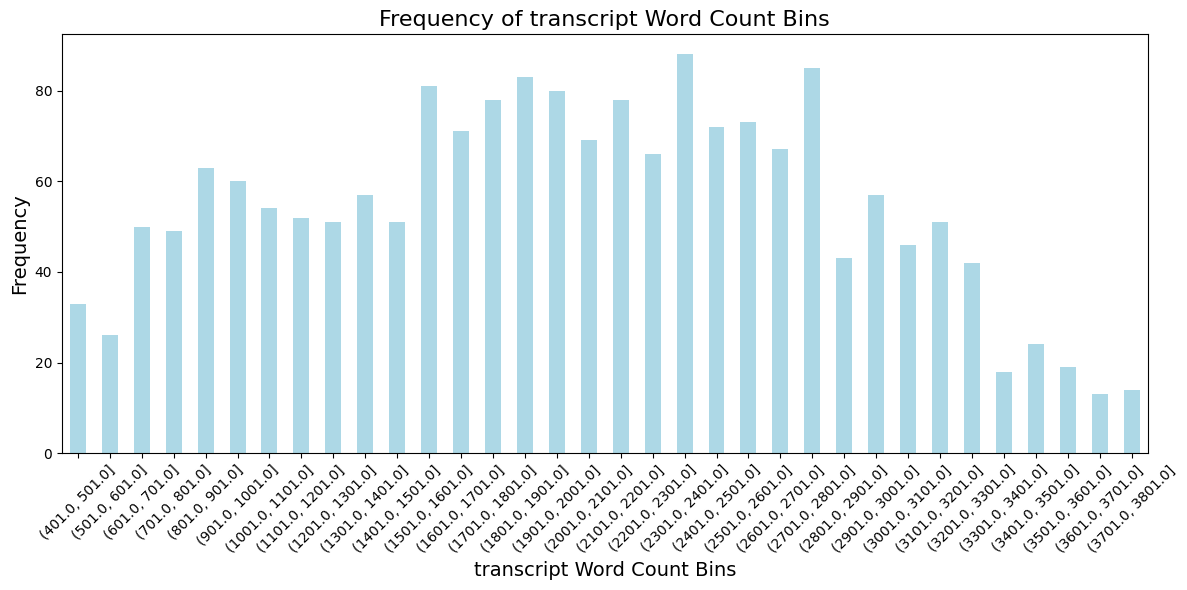

C:\Users\arsal\AppData\Local\Temp\ipykernel_23892\3030761935.py:92: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='bins', y='Popularity', data=df, palette='viridis')


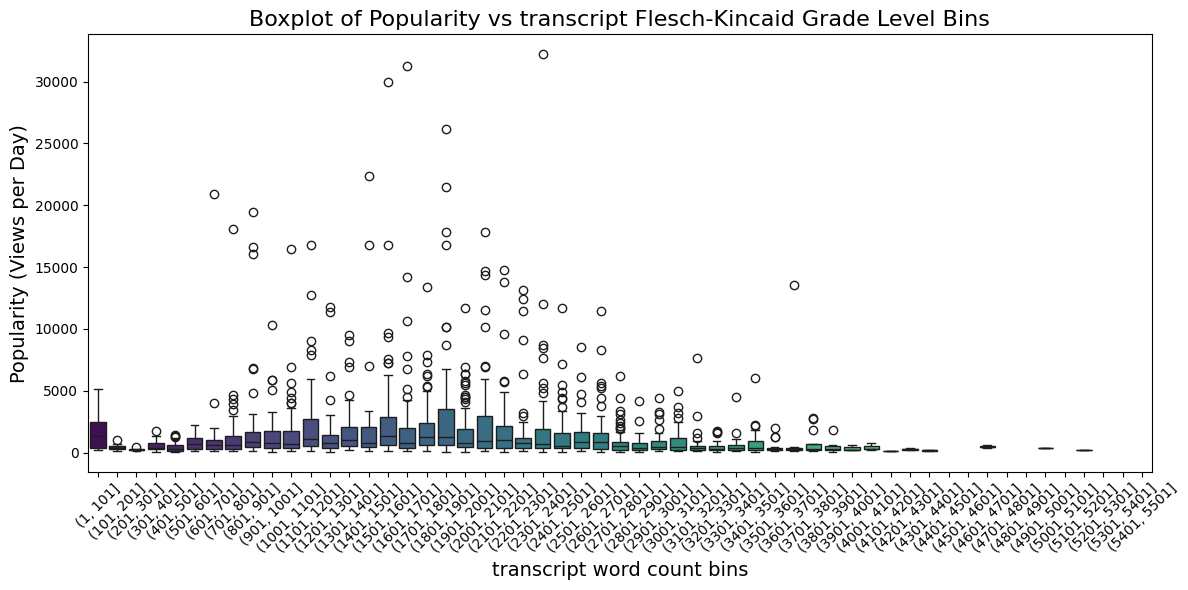

Popularity ANOVA p-value: 5.835598967329558e-10
Views ANOVA p-value: 0.005575158936722231
Feedback ANOVA p-value: 2.7163057178585238e-05
Normalized Rating Score ANOVA p-value: 0.00046383631913839233
Reaction ANOVA p-value: 0.00046383631913839233


In [481]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway

# Create bins for the transcript word count with an interval of 100
bins = pd.cut(tedmain_cleaned['transcript_word_count'], bins=range(tedmain_cleaned['transcript_word_count'].min(), tedmain_cleaned['transcript_word_count'].max(), 100))

# Calculate the frequency of each transcript word count bin
bin_frequency = tedmain_cleaned['transcript_word_count'].value_counts(bins=range(tedmain_cleaned['transcript_word_count'].min(), tedmain_cleaned['transcript_word_count'].max(), 100)).sort_index()

# Filter bins with frequency more than 10
filtered_bins = bin_frequency[bin_frequency > 10].index

# Calculate the average Popularity and views for each filtered bin
popularity_by_bins = tedmain_cleaned.groupby(bins)['Popularity'].mean().loc[filtered_bins]
views_by_bins = tedmain_cleaned.groupby(bins)['views'].mean().loc[filtered_bins]

# Plot the graph for Popularity vs bins for word count
plt.figure(figsize=(12, 6))
popularity_by_bins.plot(kind='bar', color='skyblue')
plt.title("Average Popularity vs transcript Word Count Bins", fontsize=16)
plt.xlabel("transcript Word Count Bins", fontsize=14)
plt.ylabel("Average Popularity (Views per Day)", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot the graph for views vs bins for word count
plt.figure(figsize=(12, 6))
views_by_bins.plot(kind='bar', color='salmon')
plt.title("Average Views vs transcript Word Count Bins", fontsize=16)
plt.xlabel("transcript Word Count Bins", fontsize=14)
plt.ylabel("Average Views", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Calculate the average feedback for each filtered bin
feedback_by_bins = tedmain_cleaned.groupby(bins)['feedback'].mean().loc[filtered_bins]

# Plot the graph for feedback vs bins for word count
plt.figure(figsize=(12, 6))
feedback_by_bins.plot(kind='bar', color='lightgreen')
plt.title("Average Feedback vs transcript Word Count Bins", fontsize=16)
plt.xlabel("transcript Word Count Bins", fontsize=14)
plt.ylabel("Average Feedback", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Calculate the average normalized rating score for each filtered bin
normalized_rating_by_bins = tedmain_cleaned.groupby(bins)['normalized_rating_score'].mean().loc[filtered_bins]

# Plot the graph for normalized rating score vs bins for word count
plt.figure(figsize=(12, 6))
normalized_rating_by_bins.plot(kind='bar', color='lightcoral')
plt.title("Average Normalized Rating Score vs transcript Word Count Bins", fontsize=16)
plt.xlabel("transcript Word Count Bins", fontsize=14)
plt.ylabel("Average Normalized Rating Score", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Calculate the average reaction for each filtered bin
reaction_by_bins = tedmain_cleaned.groupby(bins)['rating_score'].mean().loc[filtered_bins]

# Plot the graph for reaction vs bins for word count
plt.figure(figsize=(12, 6))
reaction_by_bins.plot(kind='bar', color='lightblue')
plt.title("Average Reaction vs transcript Word Count Bins", fontsize=16)
plt.xlabel("transcript Word Count Bins", fontsize=14)
plt.ylabel("Average Reaction", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot the frequency of transcript word count bins
plt.figure(figsize=(12, 6))
bin_frequency[filtered_bins].plot(kind='bar', color='lightblue')
plt.title("Frequency of transcript Word Count Bins", fontsize=16)
plt.xlabel("transcript Word Count Bins", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Add the bins column to the DataFrame
df['bins'] = pd.cut(df['transcript_word_count'], bins=range(df['transcript_word_count'].min(), df['transcript_word_count'].max(), 100))

plt.figure(figsize=(12, 6))
sns.boxplot(x='bins', y='Popularity', data=df, palette='viridis')
plt.title("Boxplot of Popularity vs transcript Flesch-Kincaid Grade Level Bins", fontsize=16)
plt.xlabel("transcript word count bins", fontsize=14)
plt.ylabel("Popularity (Views per Day)", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Perform ANOVA to check if the differences between bins are statistically significant
popularity_anova = f_oneway(*[tedmain_cleaned[tedmain_cleaned['transcript_word_count'].between(bin.left, bin.right)]['Popularity'] for bin in filtered_bins])
views_anova = f_oneway(*[tedmain_cleaned[tedmain_cleaned['transcript_word_count'].between(bin.left, bin.right)]['views'] for bin in filtered_bins])
feedback_anova = f_oneway(*[tedmain_cleaned[tedmain_cleaned['transcript_word_count'].between(bin.left, bin.right)]['feedback'] for bin in filtered_bins])
normalized_rating_anova = f_oneway(*[tedmain_cleaned[tedmain_cleaned['transcript_word_count'].between(bin.left, bin.right)]['normalized_rating_score'] for bin in filtered_bins])
reaction_anova = f_oneway(*[tedmain_cleaned[tedmain_cleaned['transcript_word_count'].between(bin.left, bin.right)]['rating_score'] for bin in filtered_bins])

# Print the ANOVA results
print(f"Popularity ANOVA p-value: {popularity_anova.pvalue}")
print(f"Views ANOVA p-value: {views_anova.pvalue}")
print(f"Feedback ANOVA p-value: {feedback_anova.pvalue}")
print(f"Normalized Rating Score ANOVA p-value: {normalized_rating_anova.pvalue}")
print(f"Reaction ANOVA p-value: {reaction_anova.pvalue}")


**Transcript tense categorisation analysis---edit later**

Observation: speech which are around 1700-1800 long seems to the most popular. not too long not too shot
  ratings for longer videos seems to be more positive
  long speech tends to have more reactions and feedback on average as well (not by a lot)


In [404]:
tedmain_cleaned.columns

Index(['comments', 'description', 'duration', 'event', 'film_date',
       'languages', 'main_speaker', 'name', 'num_speaker', 'published_date',
       'ratings', 'related_talks', 'speaker_occupation', 'tags', 'title',
       'url', 'views', 'transcript', 'days_out', 'rating_score',
       'normalized_rating_score', 'Published_Date', 'Scraping_Date',
       'Days_Since_Published', 'Popularity', 'feedback', 'text_tense',
       'published_year', 'title_length', 'title_word_count',
       'title_flesch_kincaid_grade_level', 'title_sentiment_score',
       'tag_count', 'description_word_count',
       'description_flesch_kincaid_grade_level', 'description_sentiment_score',
       'Category', 'first_word', 'last_word', 'last_char', 'society',
       'identity', 'global issues', 'design', 'tag_count_bin', 'speech_pace',
       'fk_grade_transcript', 'transcript_word_count',
       'transcript_sentiment_score', 'duration_min'],
      dtype='object')

***Analysing II- [transcript]***

**1.2 transcript duration**


only bins with frequency >10


C:\Users\arsal\AppData\Local\Temp\ipykernel_23892\3267372683.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  popularity_by_bins = tedmain_cleaned.groupby(bins)['Popularity'].mean()
C:\Users\arsal\AppData\Local\Temp\ipykernel_23892\3267372683.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  feedback_by_bins = tedmain_cleaned.groupby(bins)['feedback'].mean()


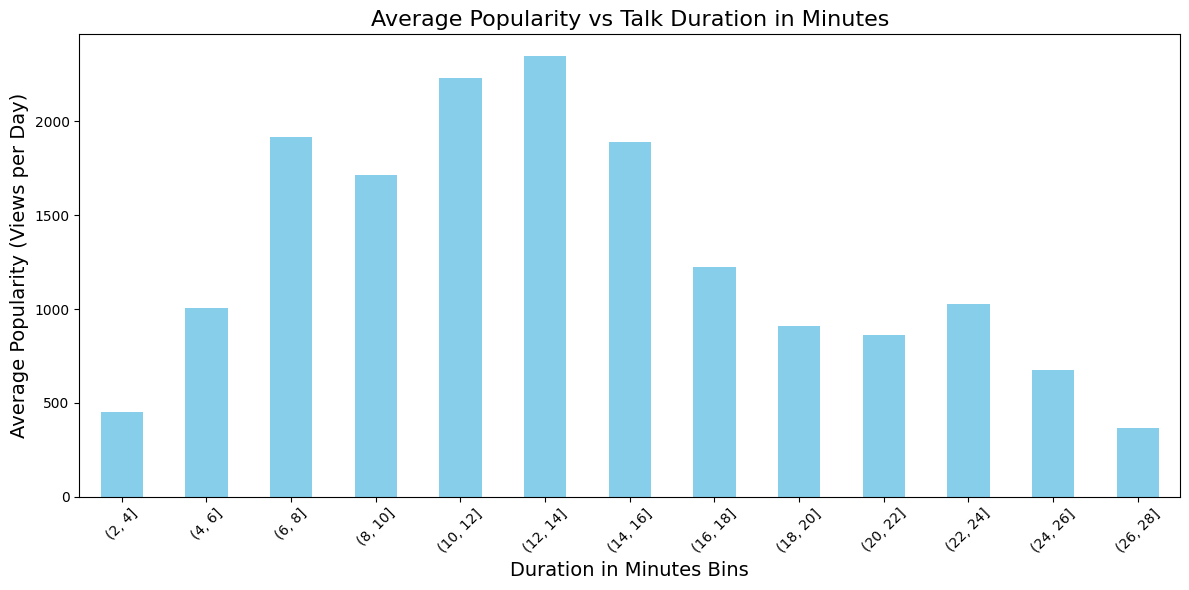

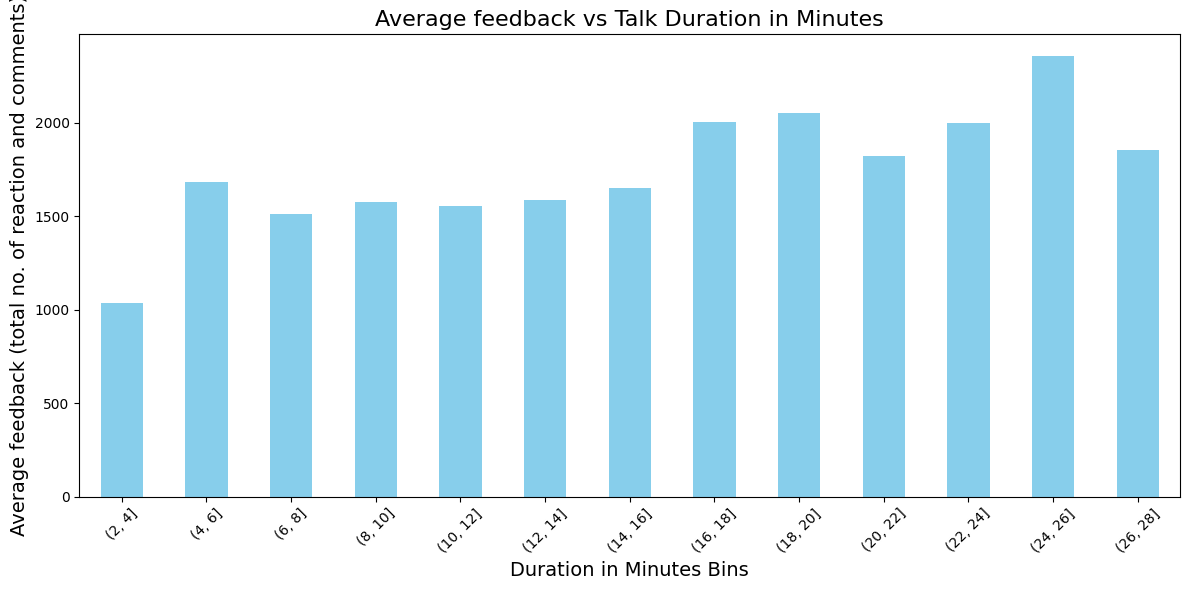

popularity ANOVA p-value: 4.1551949741683243e-10
feedback ANOVA p-value: 4.721309967970381e-09


C:\Users\arsal\AppData\Local\Temp\ipykernel_23892\3267372683.py:52: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  popularity_by_bins = tedmain_cleaned.groupby(bins)['Popularity'].mean().reindex(filtered_bins)
C:\Users\arsal\AppData\Local\Temp\ipykernel_23892\3267372683.py:53: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  views_by_bins = tedmain_cleaned.groupby(bins)['views'].mean().reindex(filtered_bins)


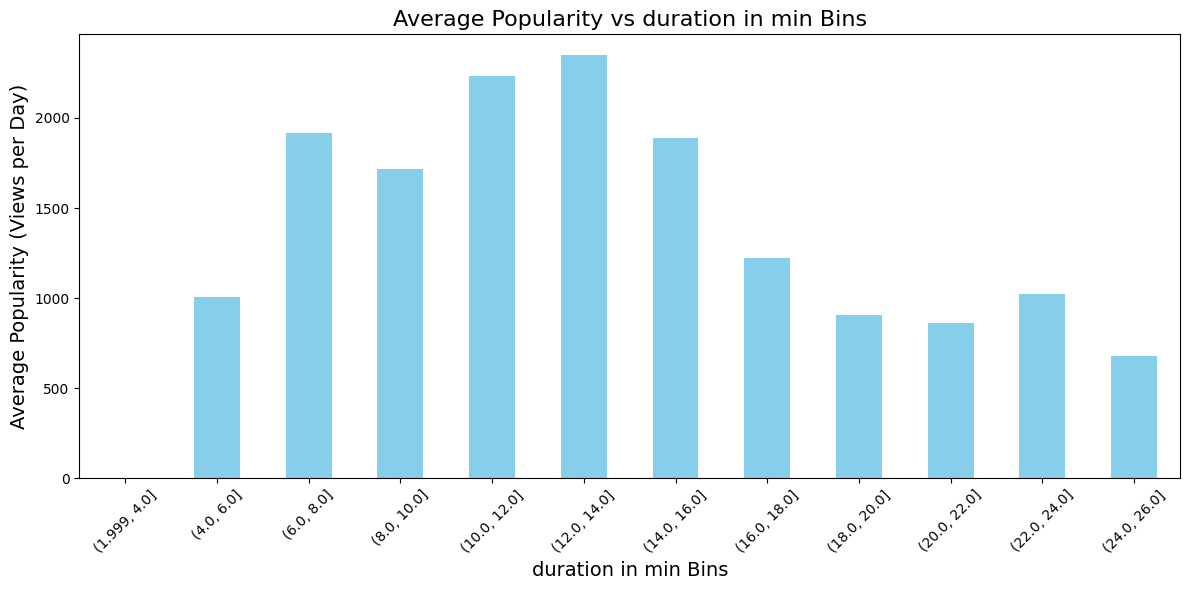

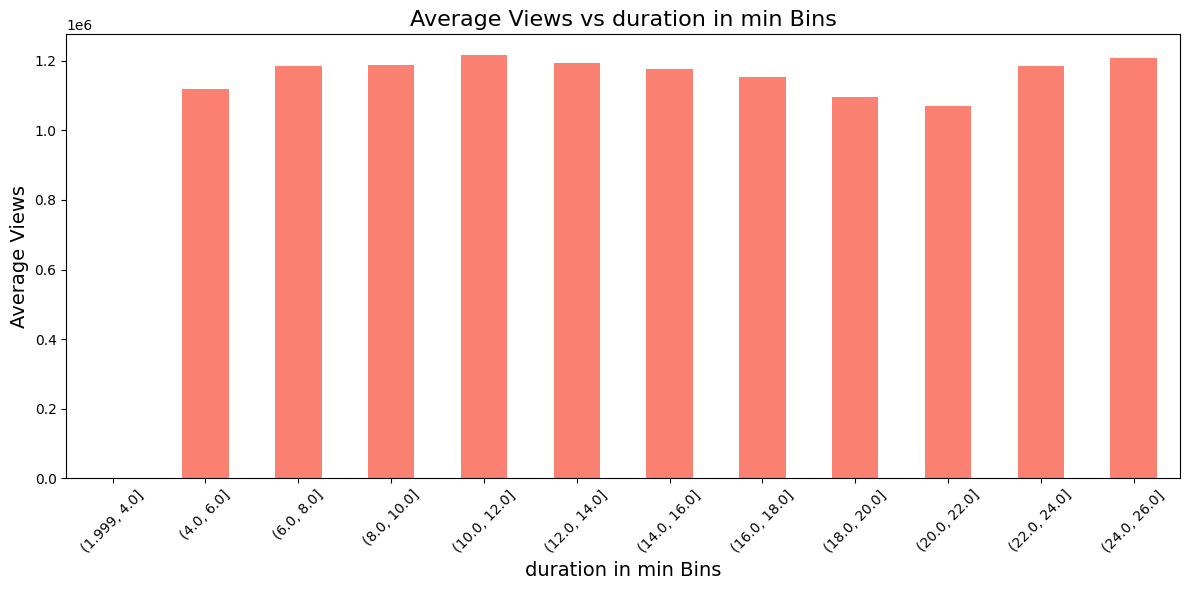

C:\Users\arsal\AppData\Local\Temp\ipykernel_23892\3267372683.py:76: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  feedback_by_bins = tedmain_cleaned.groupby(bins)['feedback'].mean().reindex(filtered_bins)


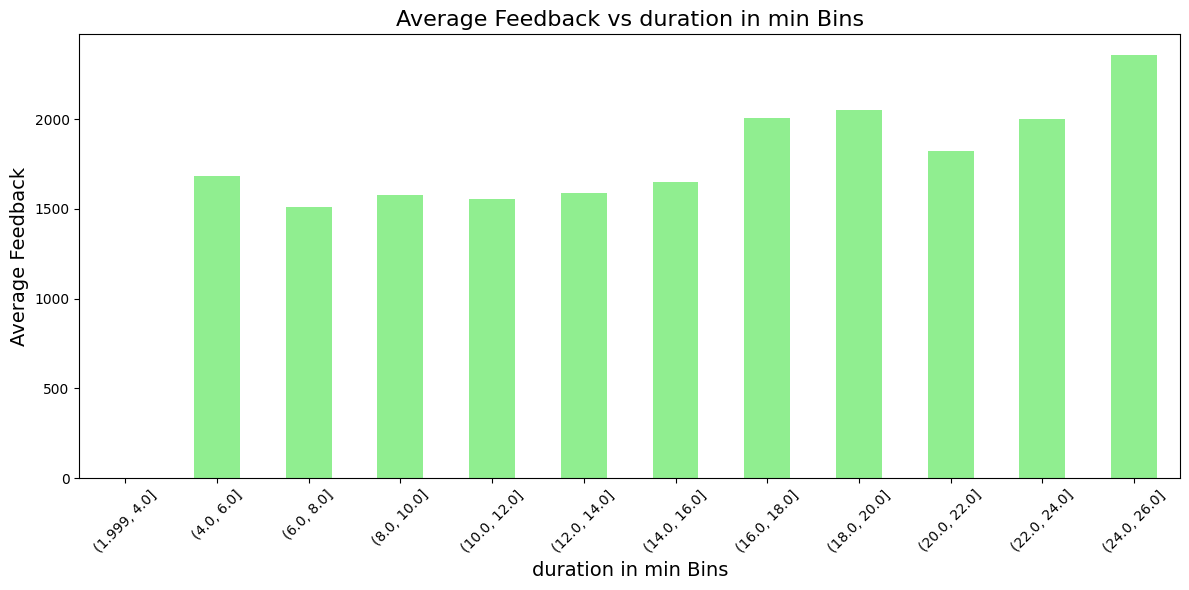

C:\Users\arsal\AppData\Local\Temp\ipykernel_23892\3267372683.py:89: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  normalized_rating_by_bins = tedmain_cleaned.groupby(bins)['normalized_rating_score'].mean().reindex(filtered_bins)


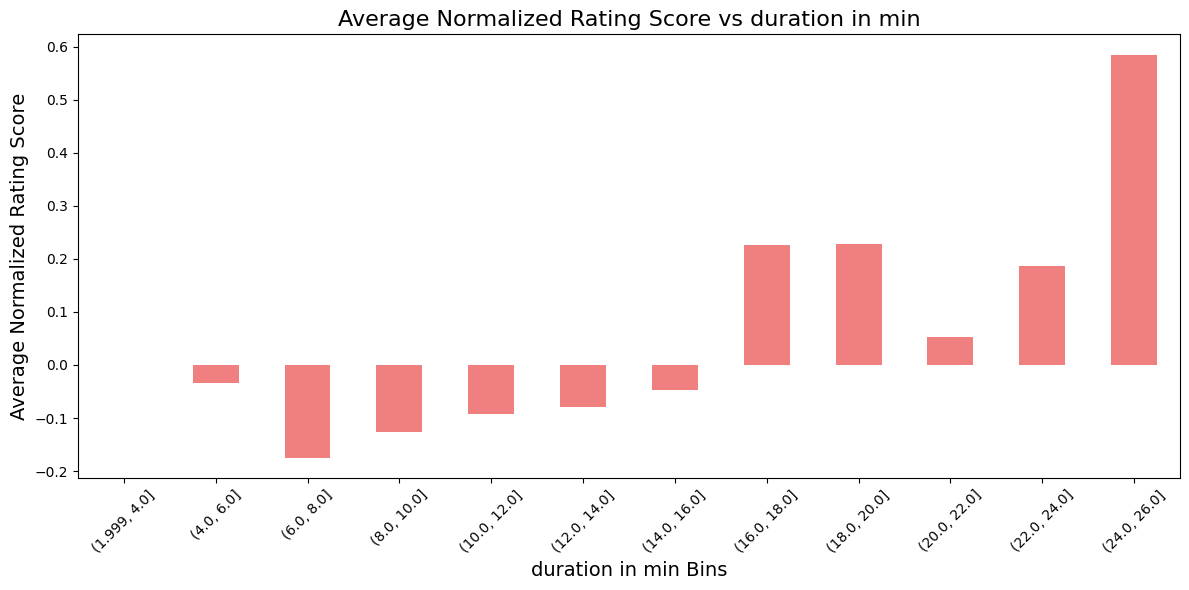

C:\Users\arsal\AppData\Local\Temp\ipykernel_23892\3267372683.py:102: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  reaction_by_bins = tedmain_cleaned.groupby(bins)['rating_score'].mean().reindex(filtered_bins)


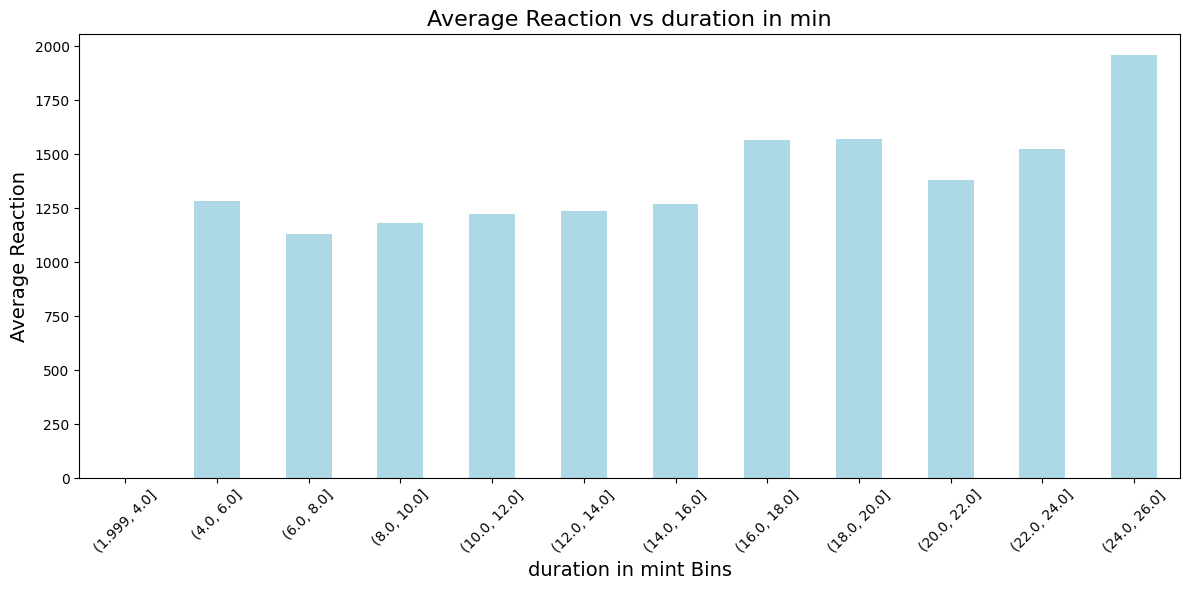

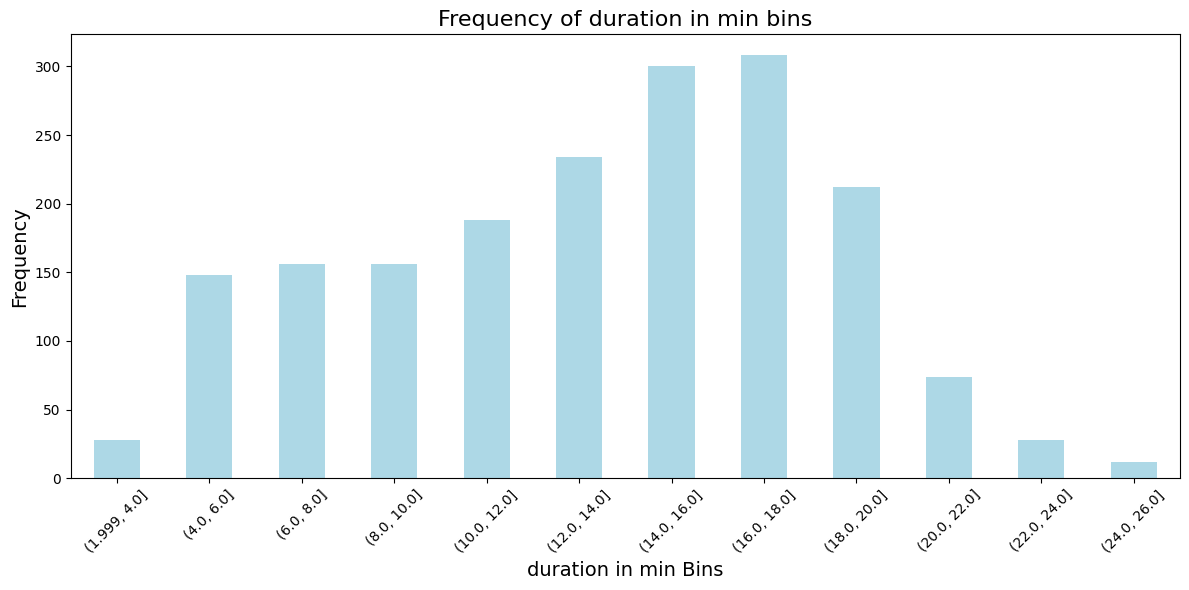

Popularity ANOVA p-value: 2.0296363178297145e-10
Views ANOVA p-value: 0.006895163264705022
Feedback ANOVA p-value: 1.5589792957333347e-09
Normalized Rating Score ANOVA p-value: 6.701714418295328e-08
Reaction ANOVA p-value: 6.701714418295328e-08


In [409]:

import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import f_oneway

# Create bins for the duration in minutes with an interval of 2
bins = pd.cut(tedmain_cleaned['duration_min'], bins=range(int(tedmain_cleaned['duration_min'].min()), int(tedmain_cleaned['duration_min'].max()) + 2, 2))

# Calculate the average popularity for each bin
popularity_by_bins = tedmain_cleaned.groupby(bins)['Popularity'].mean()

# Calculate the average feedback for each bin
feedback_by_bins = tedmain_cleaned.groupby(bins)['feedback'].mean()

# Plot the graph for average popularity vs duration in minutes bins
plt.figure(figsize=(12, 6))
popularity_by_bins.plot(kind='bar', color='skyblue')
plt.title("Average Popularity vs Talk Duration in Minutes", fontsize=16)
plt.xlabel("Duration in Minutes Bins", fontsize=14)
plt.ylabel("Average Popularity (Views per Day)", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot the graph for average feedback vs duration in minutes bins
plt.figure(figsize=(12, 6))
feedback_by_bins.plot(kind='bar', color='skyblue')
plt.title("Average feedback vs Talk Duration in Minutes", fontsize=16)
plt.xlabel("Duration in Minutes Bins", fontsize=14)
plt.ylabel("Average feedback (total no. of reaction and comments)", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Perform ANOVA to check if the differences in average popularity between bins are statistically significant
p_anova_result = f_oneway(*[tedmain_cleaned[tedmain_cleaned['duration_min'].between(bin.left, bin.right, inclusive='left')]['Popularity'] for bin in bins.cat.categories])
# Perform ANOVA to check if the differences in average feedback between bins are statistically significant
f_anova_result = f_oneway(*[tedmain_cleaned[tedmain_cleaned['duration_min'].between(bin.left, bin.right, inclusive='left')]['feedback'] for bin in bins.cat.categories])
# Print the ANOVA result
print(f"popularity ANOVA p-value: {p_anova_result.pvalue}")
print(f"feedback ANOVA p-value: {f_anova_result.pvalue}")




# Calculate the frequency of each transcript word count bin
bin_frequency = tedmain_cleaned['duration_min'].value_counts(bins=range(int(tedmain_cleaned['duration_min'].min()), int(tedmain_cleaned['duration_min'].max()), 2)).sort_index()

# Filter bins with frequency more than 10
filtered_bins = bin_frequency[bin_frequency > 10].index

# Calculate the average Popularity and views for each filtered bin
popularity_by_bins = tedmain_cleaned.groupby(bins)['Popularity'].mean().reindex(filtered_bins)
views_by_bins = tedmain_cleaned.groupby(bins)['views'].mean().reindex(filtered_bins)

# Plot the graph for Popularity vs bins for word count
plt.figure(figsize=(12, 6))
popularity_by_bins.plot(kind='bar', color='skyblue')
plt.title("Average Popularity vs duration in min Bins", fontsize=16)
plt.xlabel("duration in min Bins", fontsize=14)
plt.ylabel("Average Popularity (Views per Day)", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot the graph for views vs bins for word count
plt.figure(figsize=(12, 6))
views_by_bins.plot(kind='bar', color='salmon')
plt.title("Average Views vs duration in min Bins", fontsize=16)
plt.xlabel("duration in min Bins", fontsize=14)
plt.ylabel("Average Views", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Calculate the average feedback for each filtered bin
feedback_by_bins = tedmain_cleaned.groupby(bins)['feedback'].mean().reindex(filtered_bins)

# Plot the graph for feedback vs bins for word count
plt.figure(figsize=(12, 6))
feedback_by_bins.plot(kind='bar', color='lightgreen')
plt.title("Average Feedback vs duration in min Bins", fontsize=16)
plt.xlabel("duration in min Bins", fontsize=14)
plt.ylabel("Average Feedback", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Calculate the average normalized rating score for each filtered bin
normalized_rating_by_bins = tedmain_cleaned.groupby(bins)['normalized_rating_score'].mean().reindex(filtered_bins)

# Plot the graph for normalized rating score vs bins for word count
plt.figure(figsize=(12, 6))
normalized_rating_by_bins.plot(kind='bar', color='lightcoral')
plt.title("Average Normalized Rating Score vs duration in min", fontsize=16)
plt.xlabel("duration in min Bins", fontsize=14)
plt.ylabel("Average Normalized Rating Score", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Calculate the average reaction for each filtered bin
reaction_by_bins = tedmain_cleaned.groupby(bins)['rating_score'].mean().reindex(filtered_bins)

# Plot the graph for reaction vs bins for word count
plt.figure(figsize=(12, 6))
reaction_by_bins.plot(kind='bar', color='lightblue')
plt.title("Average Reaction vs duration in min", fontsize=16)
plt.xlabel("duration in mint Bins", fontsize=14)
plt.ylabel("Average Reaction", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot the frequency of transcript word count bins
plt.figure(figsize=(12, 6))
bin_frequency[filtered_bins].plot(kind='bar', color='lightblue')
plt.title("Frequency of duration in min bins", fontsize=16)
plt.xlabel("duration in min Bins", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Perform ANOVA to check if the differences between bins are statistically significant
popularity_anova = f_oneway(*[tedmain_cleaned[tedmain_cleaned['duration_min'].between(bin.left, bin.right)]['Popularity'] for bin in filtered_bins])
views_anova = f_oneway(*[tedmain_cleaned[tedmain_cleaned['duration_min'].between(bin.left, bin.right)]['views'] for bin in filtered_bins])
feedback_anova = f_oneway(*[tedmain_cleaned[tedmain_cleaned['duration_min'].between(bin.left, bin.right)]['feedback'] for bin in filtered_bins])
normalized_rating_anova = f_oneway(*[tedmain_cleaned[tedmain_cleaned['duration_min'].between(bin.left, bin.right)]['normalized_rating_score'] for bin in filtered_bins])
reaction_anova = f_oneway(*[tedmain_cleaned[tedmain_cleaned['duration_min'].between(bin.left, bin.right)]['rating_score'] for bin in filtered_bins])

# Print the ANOVA results
print(f"Popularity ANOVA p-value: {popularity_anova.pvalue}")
print(f"Views ANOVA p-value: {views_anova.pvalue}")
print(f"Feedback ANOVA p-value: {feedback_anova.pvalue}")
print(f"Normalized Rating Score ANOVA p-value: {normalized_rating_anova.pvalue}")
print(f"Reaction ANOVA p-value: {reaction_anova.pvalue}")


Observation: avg duration of talk 18 min

talks btw 6 to 16 are more popular

longer talks have more comments and reaction

***Analysing II- [transcript]***

**1.3 speech pace**




C:\Users\arsal\AppData\Local\Temp\ipykernel_23892\1006685058.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  popularity_by_bins = tedmain_cleaned.groupby(bins)['Popularity'].mean()
C:\Users\arsal\AppData\Local\Temp\ipykernel_23892\1006685058.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  feedback_by_bins = tedmain_cleaned.groupby(bins)['feedback'].mean()
C:\Users\arsal\AppData\Local\Temp\ipykernel_23892\1006685058.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True

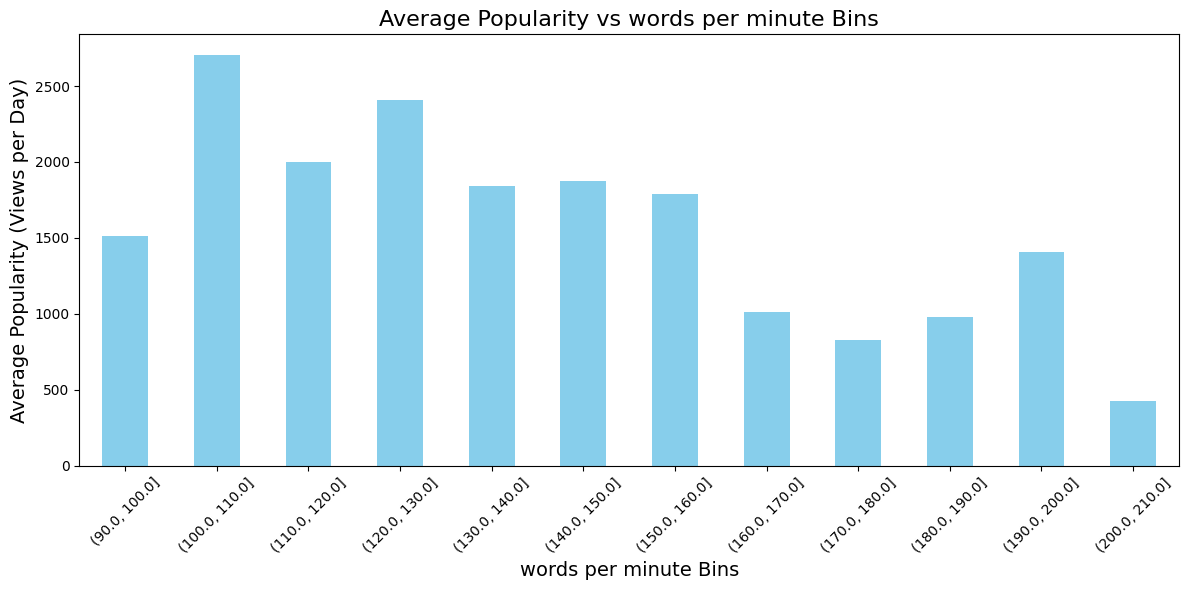

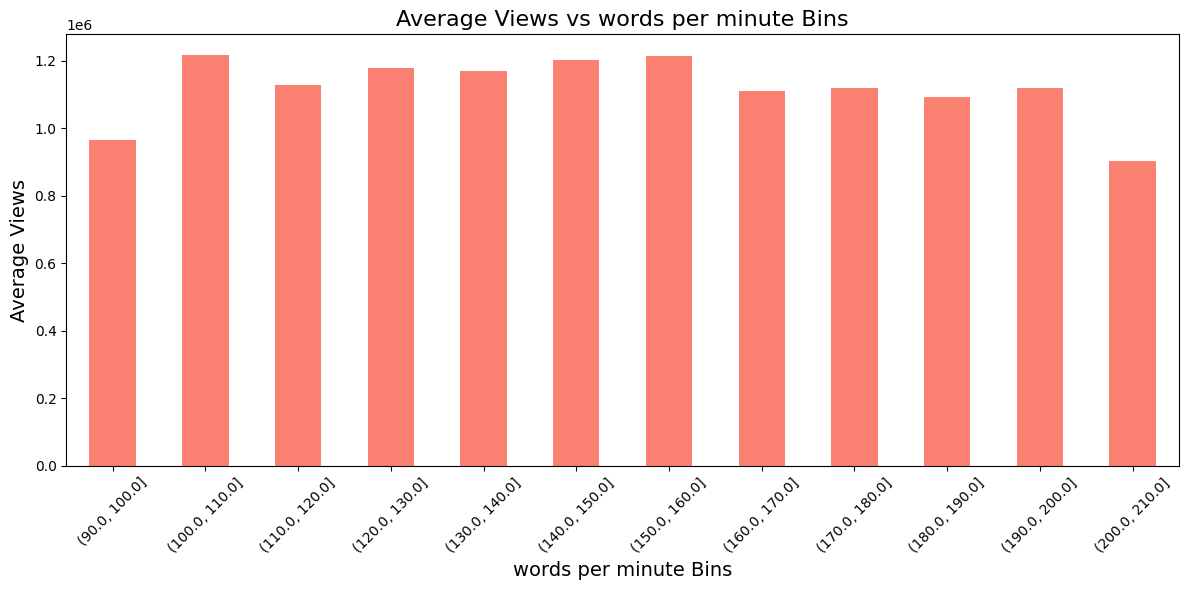

C:\Users\arsal\AppData\Local\Temp\ipykernel_23892\1006685058.py:46: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  feedback_by_bins = tedmain_cleaned.groupby(bins)['feedback'].mean().reindex(filtered_bins)


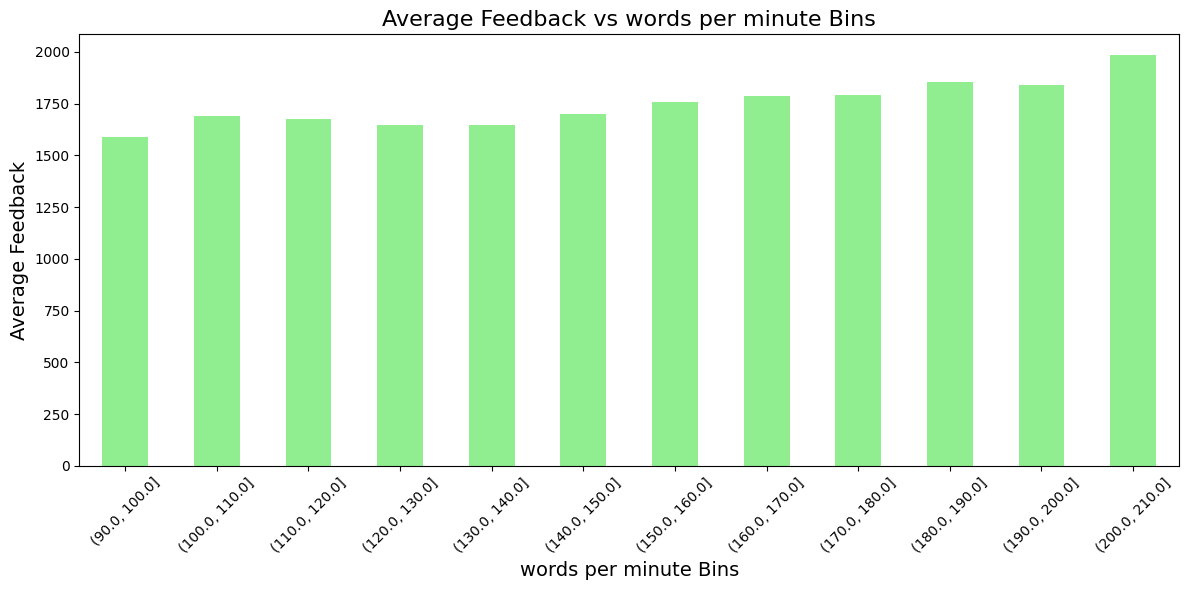

C:\Users\arsal\AppData\Local\Temp\ipykernel_23892\1006685058.py:59: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  normalized_rating_by_bins = tedmain_cleaned.groupby(bins)['normalized_rating_score'].mean().reindex(filtered_bins)


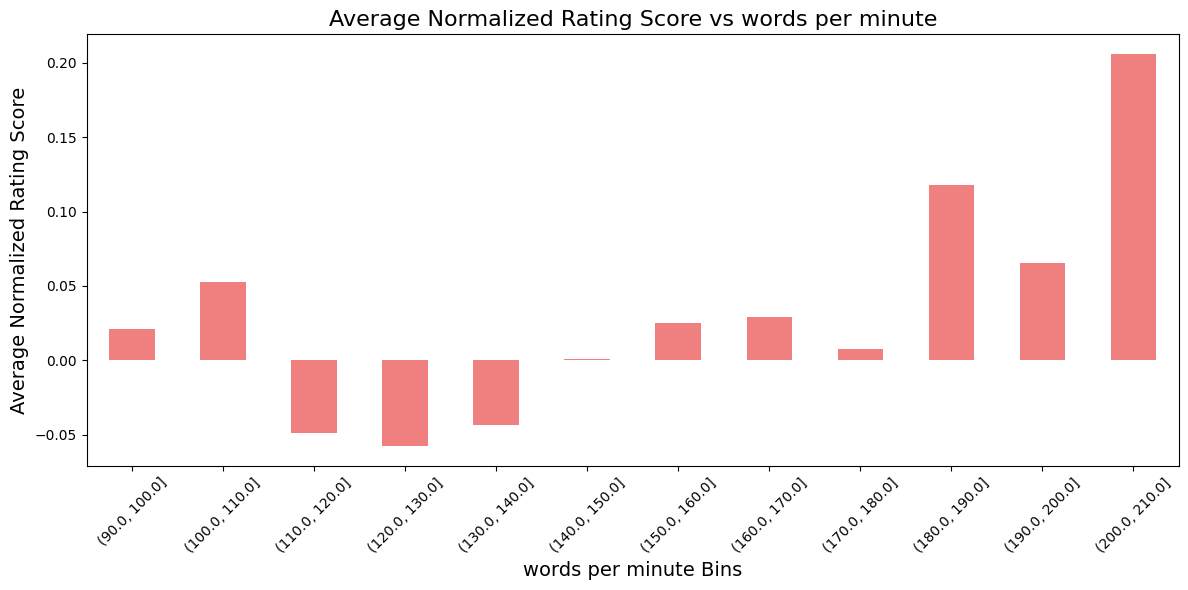

C:\Users\arsal\AppData\Local\Temp\ipykernel_23892\1006685058.py:72: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  reaction_by_bins = tedmain_cleaned.groupby(bins)['rating_score'].mean().reindex(filtered_bins)


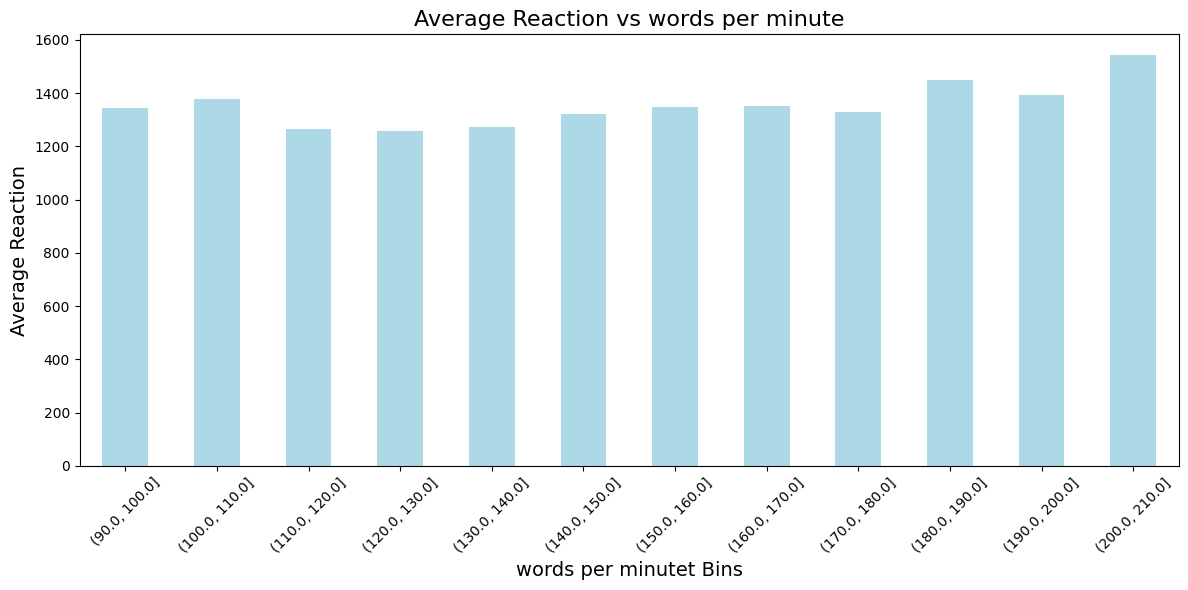

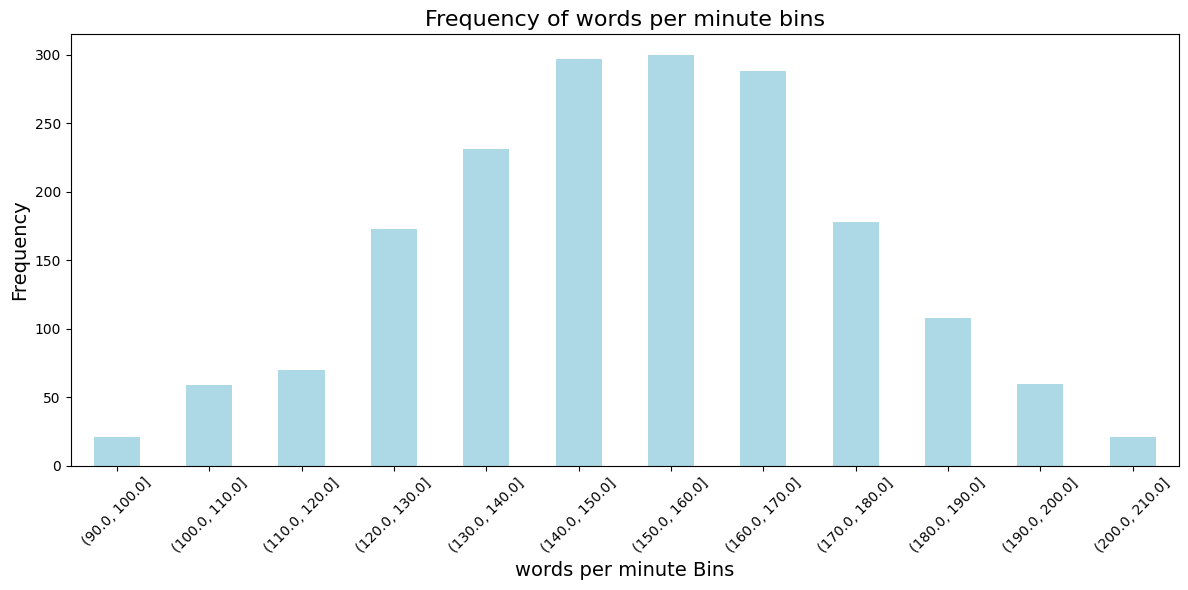

Popularity ANOVA p-value: 7.054128203659106e-10
Views ANOVA p-value: 0.06725939363158351
Feedback ANOVA p-value: 0.8099733163676299
Normalized Rating Score ANOVA p-value: 0.9614655551532711
Reaction ANOVA p-value: 0.9614655551532711


In [413]:

import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import f_oneway

# Create bins for the words per minute with an interval of 2
bins = pd.cut(tedmain_cleaned['speech_pace'], bins=range(int(tedmain_cleaned['speech_pace'].min()), int(tedmain_cleaned['speech_pace'].max()) + 2, 10))

# Calculate the average popularity for each bin
popularity_by_bins = tedmain_cleaned.groupby(bins)['Popularity'].mean()

# Calculate the average feedback for each bin
feedback_by_bins = tedmain_cleaned.groupby(bins)['feedback'].mean()


# Calculate the frequency of each transcript word count bin
bin_frequency = tedmain_cleaned['speech_pace'].value_counts(bins=range(int(tedmain_cleaned['speech_pace'].min()), int(tedmain_cleaned['speech_pace'].max()), 10)).sort_index()

# Filter bins with frequency more than 10
filtered_bins = bin_frequency[bin_frequency > 10].index

# Calculate the average Popularity and views for each filtered bin
popularity_by_bins = tedmain_cleaned.groupby(bins)['Popularity'].mean().reindex(filtered_bins)
views_by_bins = tedmain_cleaned.groupby(bins)['views'].mean().reindex(filtered_bins)

# Plot the graph for Popularity vs bins for word count
plt.figure(figsize=(12, 6))
popularity_by_bins.plot(kind='bar', color='skyblue')
plt.title("Average Popularity vs words per minute Bins", fontsize=16)
plt.xlabel("words per minute Bins", fontsize=14)
plt.ylabel("Average Popularity (Views per Day)", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot the graph for views vs bins for word count
plt.figure(figsize=(12, 6))
views_by_bins.plot(kind='bar', color='salmon')
plt.title("Average Views vs words per minute Bins", fontsize=16)
plt.xlabel("words per minute Bins", fontsize=14)
plt.ylabel("Average Views", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Calculate the average feedback for each filtered bin
feedback_by_bins = tedmain_cleaned.groupby(bins)['feedback'].mean().reindex(filtered_bins)

# Plot the graph for feedback vs bins for word count
plt.figure(figsize=(12, 6))
feedback_by_bins.plot(kind='bar', color='lightgreen')
plt.title("Average Feedback vs words per minute Bins", fontsize=16)
plt.xlabel("words per minute Bins", fontsize=14)
plt.ylabel("Average Feedback", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Calculate the average normalized rating score for each filtered bin
normalized_rating_by_bins = tedmain_cleaned.groupby(bins)['normalized_rating_score'].mean().reindex(filtered_bins)

# Plot the graph for normalized rating score vs bins for word count
plt.figure(figsize=(12, 6))
normalized_rating_by_bins.plot(kind='bar', color='lightcoral')
plt.title("Average Normalized Rating Score vs words per minute", fontsize=16)
plt.xlabel("words per minute Bins", fontsize=14)
plt.ylabel("Average Normalized Rating Score", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Calculate the average reaction for each filtered bin
reaction_by_bins = tedmain_cleaned.groupby(bins)['rating_score'].mean().reindex(filtered_bins)

# Plot the graph for reaction vs bins for word count
plt.figure(figsize=(12, 6))
reaction_by_bins.plot(kind='bar', color='lightblue')
plt.title("Average Reaction vs words per minute", fontsize=16)
plt.xlabel("words per minutet Bins", fontsize=14)
plt.ylabel("Average Reaction", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot the frequency of transcript word count bins
plt.figure(figsize=(12, 6))
bin_frequency[filtered_bins].plot(kind='bar', color='lightblue')
plt.title("Frequency of words per minute bins", fontsize=16)
plt.xlabel("words per minute Bins", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Perform ANOVA to check if the differences between bins are statistically significant
popularity_anova = f_oneway(*[tedmain_cleaned[tedmain_cleaned['speech_pace'].between(bin.left, bin.right)]['Popularity'] for bin in filtered_bins])
views_anova = f_oneway(*[tedmain_cleaned[tedmain_cleaned['speech_pace'].between(bin.left, bin.right)]['views'] for bin in filtered_bins])
feedback_anova = f_oneway(*[tedmain_cleaned[tedmain_cleaned['speech_pace'].between(bin.left, bin.right)]['feedback'] for bin in filtered_bins])
normalized_rating_anova = f_oneway(*[tedmain_cleaned[tedmain_cleaned['speech_pace'].between(bin.left, bin.right)]['normalized_rating_score'] for bin in filtered_bins])
reaction_anova = f_oneway(*[tedmain_cleaned[tedmain_cleaned['speech_pace'].between(bin.left, bin.right)]['rating_score'] for bin in filtered_bins])

# Print the ANOVA results
print(f"Popularity ANOVA p-value: {popularity_anova.pvalue}")
print(f"Views ANOVA p-value: {views_anova.pvalue}")
print(f"Feedback ANOVA p-value: {feedback_anova.pvalue}")
print(f"Normalized Rating Score ANOVA p-value: {normalized_rating_anova.pvalue}")
print(f"Reaction ANOVA p-value: {reaction_anova.pvalue}")


observation: only seems to be effected by by speech speed , people prefer speech rate slower than average speech rate 150 word per minutes

i seems that the talking speed is inversily proportional to popularity ie- slow paced talks where relatively more popular

how do sentiment analysis of transcript and remove outlier  using remove_outliers(merged_df, 'transcript_duration_ratio') function we created and scientifically test for relation with Popularity

***Analysing II- [transcript]***

**1.4 Sentiment analysis and FK grade**


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import scipy.stats as stats

# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()


# Calculate correlation and p-value
sentiment_corr = tedmain_cleaned['transcript_sentiment_score'].corr(tedmain_cleaned['Popularity'])
sentiment_p_value = stats.pearsonr(tedmain_cleaned['transcript_sentiment_score'], tedmain_cleaned['Popularity'])[1]

# Check statistical significance
significance = sentiment_p_value < 0.05

# Print results
print(f"Correlation between transcript sentiment score and Popularity: {sentiment_corr}")
print(f"P-value for transcript sentiment score: {sentiment_p_value}")
print(f"Statistical significance: {'Yes' if significance else 'No'}")


Correlation between transcript sentiment score and Popularity: -0.03936463130576566
P-value for transcript sentiment score: 0.0905223948533843
Statistical significance: No


no significant relation btw sentiment and Popularity

In [ ]:
tedmain_cleaned.fk_grade_transcript

fk_grade_transcript
(2, 4]      26
(4, 6]     408
(6, 8]     819
(8, 10]    466
Name: count, dtype: int64


C:\Users\arsal\AppData\Local\Temp\ipykernel_23892\562832288.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  popularity_by_bins = df.groupby(bins)['Popularity'].mean()


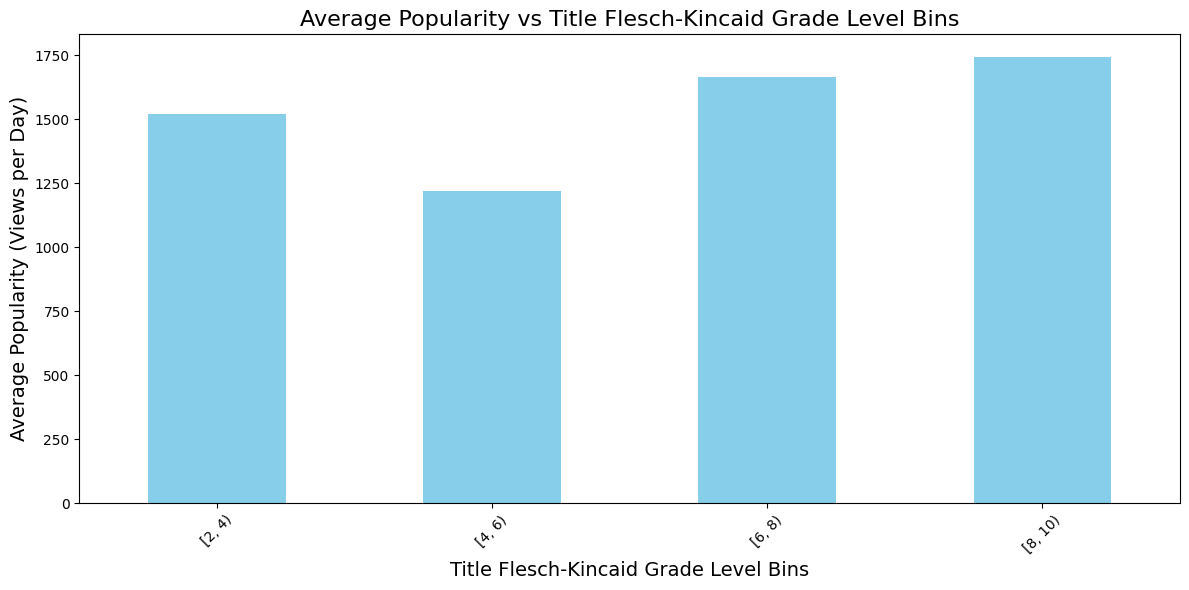

ANOVA p-value: 0.04399050671309364


In [419]:
import pandas as pd
df=tedmain_cleaned
# Assuming df is your DataFrame and 'fk_grade_transcript' is the column of interest
bins = pd.cut(df['fk_grade_transcript'], bins=range(int(df['fk_grade_transcript'].min()), int(df['fk_grade_transcript'].max()), 2))

# Calculate the frequency for each bin
bin_frequency = bins.value_counts().sort_index()

# Display the frequency for each bin
print(bin_frequency)
import pandas as pd
import seaborn as sns
from scipy.stats import f_oneway
import matplotlib.pyplot as plt

# Load the dataset
df = tedmain_cleaned

# Create bins for the Flesch-Kincaid grade level
bins = pd.cut(df['fk_grade_transcript'], bins=[2,4,6,8,10], right=False)

# Calculate the average popularity for each bin
popularity_by_bins = df.groupby(bins)['Popularity'].mean()

# Plot the graph for average popularity vs Flesch-Kincaid grade level bins
plt.figure(figsize=(12, 6))
popularity_by_bins.plot(kind='bar', color='skyblue')
plt.title("Average Popularity vs Title Flesch-Kincaid Grade Level Bins", fontsize=16)
plt.xlabel("Title Flesch-Kincaid Grade Level Bins", fontsize=14)
plt.ylabel("Average Popularity (Views per Day)", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Perform ANOVA to check if the differences in average popularity between bins are statistically significant
anova_result = f_oneway(*[df[df['fk_grade_transcript'].between(bin.left, bin.right, inclusive='left')]['Popularity'] for bin in bins.cat.categories])

# Print the ANOVA result
print(f"ANOVA p-value: {anova_result.pvalue}")


Observation: no significant change wrt language complexity

**Extra analysis**

In [420]:
import ast
from collections import Counter
import pandas as pd
merged_df = tedmain_cleaned
# Convert string representations of lists to actual lists
merged_df['tags'] = merged_df['tags'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Flatten the list of tags
all_tags = [tag for tags_list in merged_df['tags'] for tag in tags_list]

# Count occurrences of each tag
tag_counts = Counter(all_tags)

# Convert to DataFrame
tag_freq_df = pd.DataFrame(tag_counts.items(), columns=['Tag', 'Frequency']).sort_values('Frequency', ascending=False)

# Display the top 10 most common tags
print(tag_freq_df.head(10))


               Tag  Frequency
8       technology        570
38         science        439
24   global issues        389
21          design        329
266           TEDx        315
20         culture        303
11        business        246
37          health        192
112     innovation        190
1    entertainment        181


In [421]:
merged_df["tags"]

2       [computers, entertainment, interface design, m...
3       [MacArthur grant, activism, business, cities, ...
7       [architecture, collaboration, culture, design,...
10      [activism, architecture, collaboration, cultur...
11      [TED Prize, art, culture, entertainment, film,...
                              ...                        
2421    [TEDMED, beauty, brain, cognitive science, evo...
2422    [aging, humanity, identity, inequality, person...
2423    [Moon, TEDx, astronomy, beauty, nature, scienc...
2426    [TED Fellows, activism, art, community, fear, ...
2432    [aging, brain, community, family, friendship, ...
Name: tags, Length: 1850, dtype: object

C:\Users\arsal\AppData\Local\Temp\ipykernel_23892\2700488881.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=tag_freq_df.head(20), x='Tag', y='Frequency', palette='viridis')


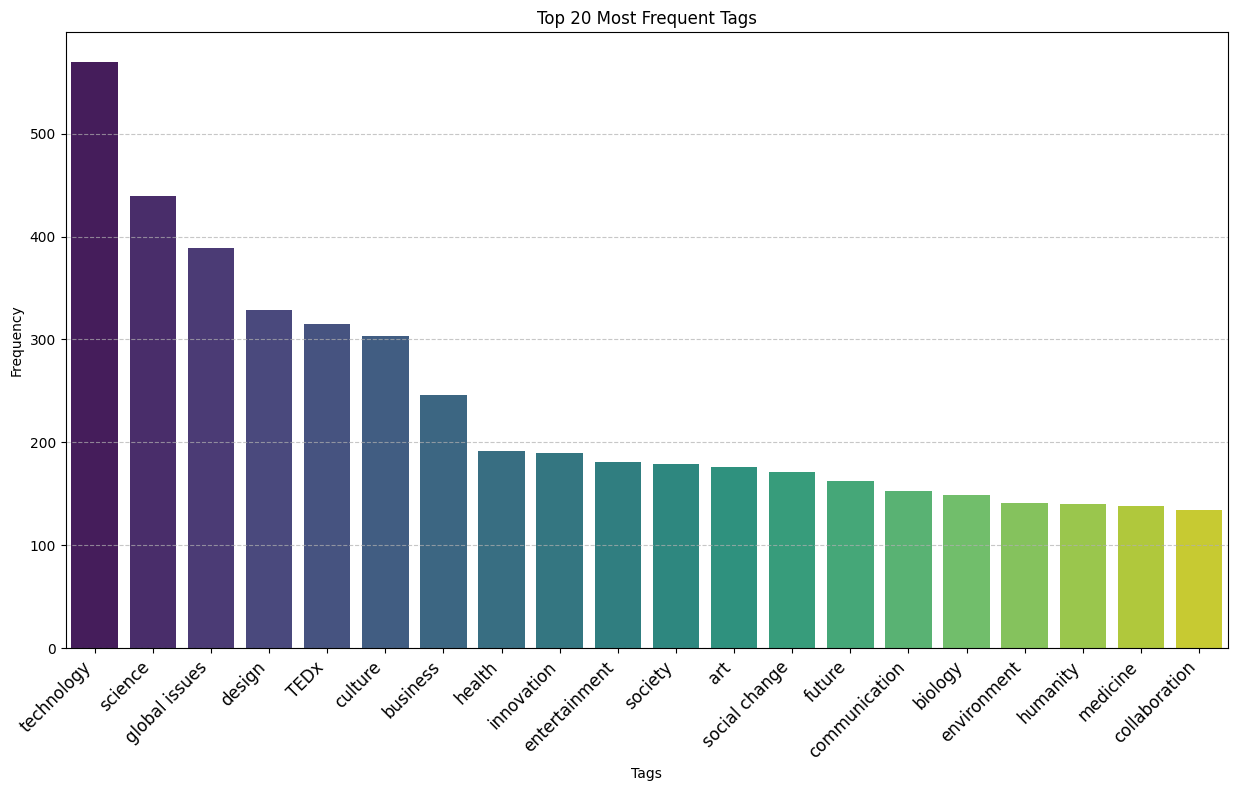

In [422]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram
plt.figure(figsize=(15, 8))
sns.barplot(data=tag_freq_df.head(20), x='Tag', y='Frequency', palette='viridis')

# Customize plot
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.title('Top 20 Most Frequent Tags')
plt.xlabel('Tags')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


C:\Users\arsal\AppData\Local\Temp\ipykernel_23892\2733900242.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_tags, x="Tag", y="Frequency", palette="viridis", label="Frequency")


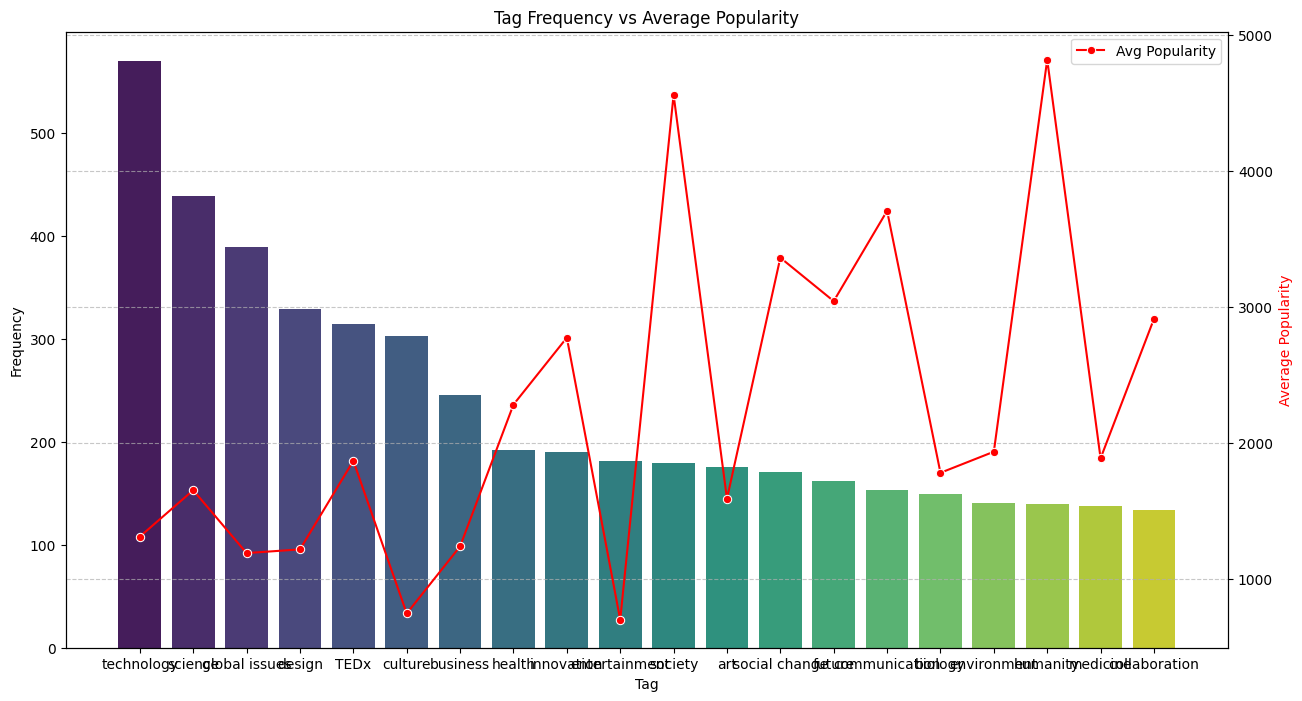

In [423]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate average popularity per tag
tag_popularity = (
    merged_df.explode("tags")
    .groupby("tags")["Popularity"]
    .mean()
    .reset_index()
    .rename(columns={"tags": "Tag", "Popularity": "Avg_Popularity"})
)

# Merge tag frequency with average popularity
tag_stats_df = pd.merge(tag_freq_df, tag_popularity, on="Tag")

# Sort by frequency and take the top 20 tags
top_tags = tag_stats_df.sort_values("Frequency", ascending=False).head(20)

# Plot
plt.figure(figsize=(15, 8))
sns.barplot(data=top_tags, x="Tag", y="Frequency", palette="viridis", label="Frequency")

# Add line plot for average popularity
ax2 = plt.gca().twinx()
sns.lineplot(
    data=top_tags, 
    x="Tag", 
    y="Avg_Popularity", 
    marker="o", 
    color="r", 
    label="Avg Popularity", 
    ax=ax2
)

# Customize the plot
plt.title("Tag Frequency vs Average Popularity")
ax2.set_ylabel("Average Popularity", color="r")
ax2.set_xlabel("Tags")
ax2.legend(loc="upper right")

# Rotate x-axis labels
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=90, ha="right", fontsize=12)

plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()



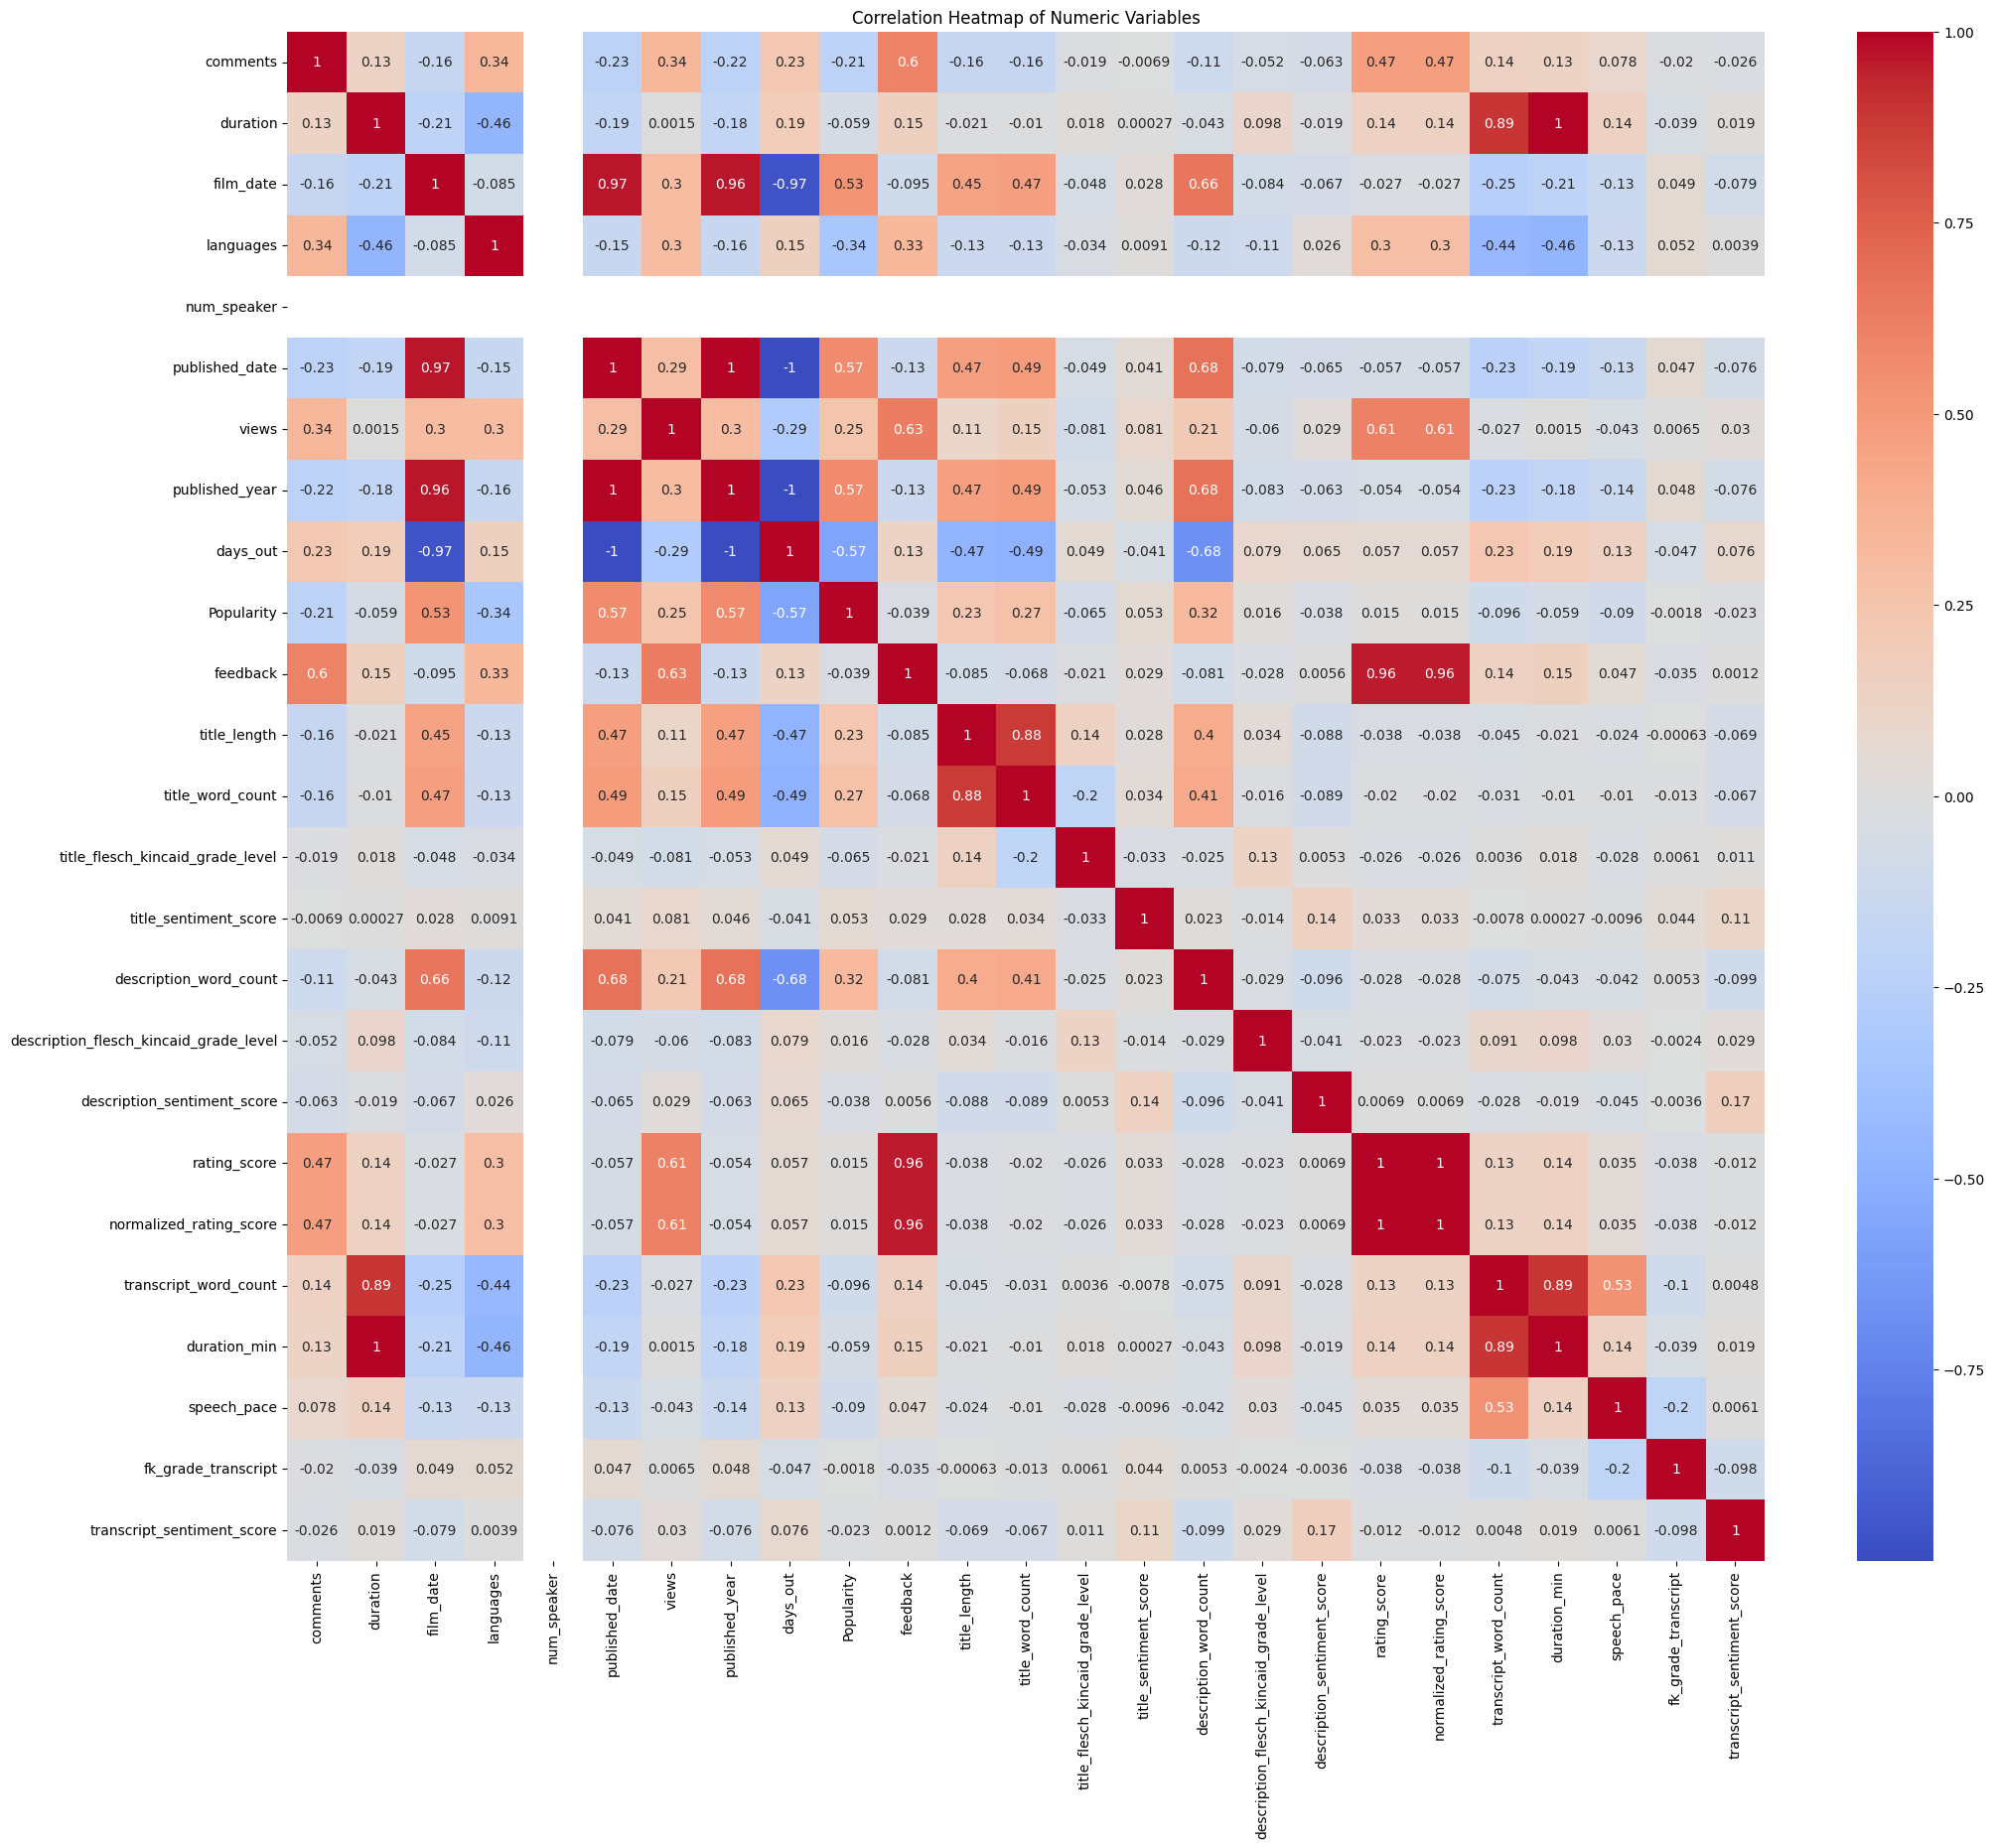

In [482]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

numeric_df = tedmain_cleaned.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(24, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap of Numeric Variables")
plt.show()




In [531]:
tedmain_cleaned.columns

Index(['comments', 'description', 'duration', 'event', 'film_date',
       'languages', 'main_speaker', 'name', 'num_speaker', 'published_date',
       'ratings', 'related_talks', 'speaker_occupation', 'tags', 'title',
       'url', 'views', 'transcript', 'text_tense', 'published_year',
       'days_out', 'Popularity', 'feedback', 'title_length',
       'title_word_count', 'title_flesch_kincaid_grade_level',
       'title_sentiment_score', 'first_word', 'last_char', 'fk_grade_bins',
       'description_word_count', 'description_flesch_kincaid_grade_level',
       'description_sentiment_score', 'rating_score',
       'normalized_rating_score', 'bins', 'transcript_word_count',
       'duration_min', 'speech_pace', 'fk_grade_transcript',
       'transcript_sentiment_score', 'tag_count'],
      dtype='object')

***Model training***

In [529]:
import pandas as pd
import numpy as np

# Load the dataset
df = tedmain_cleaned

# Inspect the first few rows
df.head()

# Check for missing data
missing_data = df.isnull().sum()
print(missing_data)

# Drop rows with missing target variable (Popularity) and impute missing features if necessary
df = df.dropna(subset=['Popularity'])

# For other features, you can impute or drop rows with missing values
# Impute numerical columns with mean
numerical_cols = df.select_dtypes(include=[np.number]).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())
df = df.dropna()  # Or remove rows with any missing value (if imputation isn't suitable)

# Check for duplicates
df = df.drop_duplicates()

# Ensure correct data types
df['languages'] = df['languages'].astype('category')
df['first_word'] = df['first_word'].astype('category')
df['last_char'] = df['last_char'].astype('category')
df['fk_grade_bins'] = df['fk_grade_bins'].astype('category')
df['text_tense'] = df['text_tense'].astype('category')


comments                                  0
description                               0
duration                                  0
event                                     0
film_date                                 0
languages                                 0
main_speaker                              0
name                                      0
num_speaker                               0
published_date                            0
ratings                                   0
related_talks                             0
speaker_occupation                        6
tags                                      0
title                                     0
url                                       0
views                                     0
transcript                                0
text_tense                                0
published_year                            0
days_out                                  0
Popularity                                0
feedback                        

In [524]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import PolynomialFeatures


replacing missing values with meam of there column for numeric column and dropping rows with any remainign missing value

In [530]:
# Preprocessing: Handle missing values
df = df.dropna(subset=['Popularity'])
# Impute missing numerical columns with the mean
numerical_cols = df.select_dtypes(include=[np.number]).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())
df = df.dropna()  # Drop rows with any remaining missing values

defining predictors - we are using variables which are accesseble pre talk release to predict talks popularity

also creating one hot encoding for categorical variables

taking log transformation for target variable  to reduce impact of extreme values

In [533]:
df.columns

Index(['comments', 'description', 'duration', 'event', 'film_date',
       'languages', 'main_speaker', 'name', 'num_speaker', 'published_date',
       'ratings', 'related_talks', 'speaker_occupation', 'tags', 'title',
       'url', 'views', 'transcript', 'text_tense', 'published_year',
       'days_out', 'Popularity', 'feedback', 'title_length',
       'title_word_count', 'title_flesch_kincaid_grade_level',
       'title_sentiment_score', 'first_word', 'last_char', 'fk_grade_bins',
       'description_word_count', 'description_flesch_kincaid_grade_level',
       'description_sentiment_score', 'rating_score',
       'normalized_rating_score', 'bins', 'transcript_word_count',
       'duration_min', 'speech_pace', 'fk_grade_transcript',
       'transcript_sentiment_score', 'tag_count'],
      dtype='object')

In [554]:

# Encode categorical variables and standardize numerical features
features = [
    'languages', 'title_word_count', 'title_flesch_kincaid_grade_level',
    'title_sentiment_score', 'first_word', 'last_char', 'fk_grade_bins', 'text_tense',
    'description_word_count', 'description_flesch_kincaid_grade_level',
    'description_sentiment_score', 'speech_pace', 'fk_grade_transcript',
    'transcript_sentiment_score', "tag_count"
]
target = 'Popularity'

# Preprocess the 'tags' feature
df['tags'] = df['tags'].apply(lambda x: len(x) if isinstance(x, list) else 0)

X = df[features]
y = df[target]

# Categorical and numerical feature identification
categorical_features = ['languages', 'first_word', 'last_char', 'fk_grade_bins', 'text_tense']
numerical_features = list(set(features) - set(categorical_features))

# Create column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),  # Standardize numerical features
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)  # One-Hot Encoding for categorical
    ]
)

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Log transformation of target variable (optional but recommended to reduce the impact of extreme values)
y_train_log = np.log1p(y_train)
y_val_log = np.log1p(y_val)
y_test_log = np.log1p(y_test)


In [555]:

# Define the pipeline with Ridge regression (first model to test)
pipeline_ridge = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge())
])

# GridSearchCV to tune the hyperparameters for Ridge regression
param_grid_ridge = {'regressor__alpha': [0.1, 1, 10, 100, 1000]}
grid_search_ridge = GridSearchCV(pipeline_ridge, param_grid_ridge, cv=5, scoring='neg_mean_squared_error')
grid_search_ridge.fit(X_train, y_train_log)

# Best model from GridSearchCV
print(f"Best Ridge model: {grid_search_ridge.best_estimator_}")
print(f"Best Ridge MSE: {-grid_search_ridge.best_score_}")

# Evaluate Ridge model
y_train_pred_ridge = grid_search_ridge.predict(X_train)
y_val_pred_ridge = grid_search_ridge.predict(X_val)
y_test_pred_ridge = grid_search_ridge.predict(X_test)

def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mae, mse, r2

# Evaluation metrics for Ridge
train_metrics_ridge = evaluate_model(y_train_log, y_train_pred_ridge)
val_metrics_ridge = evaluate_model(y_val_log, y_val_pred_ridge)
test_metrics_ridge = evaluate_model(y_test_log, y_test_pred_ridge)

print(f"Ridge Train Metrics: MAE={train_metrics_ridge[0]}, MSE={train_metrics_ridge[1]}, R2={train_metrics_ridge[2]}")
print(f"Ridge Validation Metrics: MAE={val_metrics_ridge[0]}, MSE={val_metrics_ridge[1]}, R2={val_metrics_ridge[2]}")
print(f"Ridge Test Metrics: MAE={test_metrics_ridge[0]}, MSE={test_metrics_ridge[1]}, R2={test_metrics_ridge[2]}")

# Try Lasso and ElasticNet for comparison
pipeline_lasso = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Lasso())
])

param_grid_lasso = {'regressor__alpha': [0.1, 1, 10, 100]}
grid_search_lasso = GridSearchCV(pipeline_lasso, param_grid_lasso, cv=5, scoring='neg_mean_squared_error')
grid_search_lasso.fit(X_train, y_train_log)

print(f"Best Lasso model: {grid_search_lasso.best_estimator_}")
print(f"Best Lasso MSE: {-grid_search_lasso.best_score_}")

# Evaluate Lasso model
y_train_pred_lasso = grid_search_lasso.predict(X_train)
y_val_pred_lasso = grid_search_lasso.predict(X_val)
y_test_pred_lasso = grid_search_lasso.predict(X_test)

# Evaluation metrics for Lasso
train_metrics_lasso = evaluate_model(y_train_log, y_train_pred_lasso)
val_metrics_lasso = evaluate_model(y_val_log, y_val_pred_lasso)
test_metrics_lasso = evaluate_model(y_test_log, y_test_pred_lasso)

print(f"Lasso Train Metrics: MAE={train_metrics_lasso[0]}, MSE={train_metrics_lasso[1]}, R2={train_metrics_lasso[2]}")
print(f"Lasso Validation Metrics: MAE={val_metrics_lasso[0]}, MSE={val_metrics_lasso[1]}, R2={val_metrics_lasso[2]}")
print(f"Lasso Test Metrics: MAE={test_metrics_lasso[0]}, MSE={test_metrics_lasso[1]}, R2={test_metrics_lasso[2]}")

# Try RandomForestRegressor (non-linear model)
pipeline_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor())
])

# Hyperparameter tuning for RandomForest
param_grid_rf = {'regressor__n_estimators': [100, 200], 'regressor__max_depth': [10, 20, None]}
grid_search_rf = GridSearchCV(pipeline_rf, param_grid_rf, cv=5, scoring='neg_mean_squared_error')
grid_search_rf.fit(X_train, y_train_log)

print(f"Best RandomForest model: {grid_search_rf.best_estimator_}")
print(f"Best RandomForest MSE: {-grid_search_rf.best_score_}")

# Evaluate RandomForest model
y_train_pred_rf = grid_search_rf.predict(X_train)
y_val_pred_rf = grid_search_rf.predict(X_val)
y_test_pred_rf = grid_search_rf.predict(X_test)

# Evaluation metrics for RandomForest
train_metrics_rf = evaluate_model(y_train_log, y_train_pred_rf)
val_metrics_rf = evaluate_model(y_val_log, y_val_pred_rf)
test_metrics_rf = evaluate_model(y_test_log, y_test_pred_rf)

print(f"RandomForest Train Metrics: MAE={train_metrics_rf[0]}, MSE={train_metrics_rf[1]}, R2={train_metrics_rf[2]}")
print(f"RandomForest Validation Metrics: MAE={val_metrics_rf[0]}, MSE={val_metrics_rf[1]}, R2={val_metrics_rf[2]}")
print(f"RandomForest Test Metrics: MAE={test_metrics_rf[0]}, MSE={test_metrics_rf[1]}, R2={test_metrics_rf[2]}")

# Try GradientBoostingRegressor (another powerful model)
pipeline_gb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor())
])

# Hyperparameter tuning for GradientBoostingRegressor
param_grid_gb = {'regressor__n_estimators': [100, 200], 'regressor__learning_rate': [0.01, 0.1, 0.2]}
grid_search_gb = GridSearchCV(pipeline_gb, param_grid_gb, cv=5, scoring='neg_mean_squared_error')
grid_search_gb.fit(X_train, y_train_log)

print(f"Best GradientBoosting model: {grid_search_gb.best_estimator_}")
print(f"Best GradientBoosting MSE: {-grid_search_gb.best_score_}")

# Evaluate GradientBoosting model
y_train_pred_gb = grid_search_gb.predict(X_train)
y_val_pred_gb = grid_search_gb.predict(X_val)
y_test_pred_gb = grid_search_gb.predict(X_test)

# Evaluation metrics for GradientBoosting
train_metrics_gb = evaluate_model(y_train_log, y_train_pred_gb)
val_metrics_gb = evaluate_model(y_val_log, y_val_pred_gb)
test_metrics_gb = evaluate_model(y_test_log, y_test_pred_gb)

print(f"GradientBoosting Train Metrics: MAE={train_metrics_gb[0]}, MSE={train_metrics_gb[1]}, R2={train_metrics_gb[2]}")
print(f"GradientBoosting Validation Metrics: MAE={val_metrics_gb[0]}, MSE={val_metrics_gb[1]}, R2={val_metrics_gb[2]}")
print(f"GradientBoosting Test Metrics: MAE={test_metrics_gb[0]}, MSE={test_metrics_gb[1]}, R2={test_metrics_gb[2]}")



Best Ridge model: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['transcript_sentiment_score',
                                                   'description_word_count',
                                                   'tag_count',
                                                   'description_flesch_kincaid_grade_level',
                                                   'title_word_count',
                                                   'description_sentiment_score',
                                                   'speech_pace',
                                                   'fk_grade_transcript',
                                                   'title_flesch_kincaid_grade_level',
                                                   'title_sentiment_score']),
                                                 ('cat',
                                            

visual comparison of the four model performance

ask chat gpt to help visualise the comparison


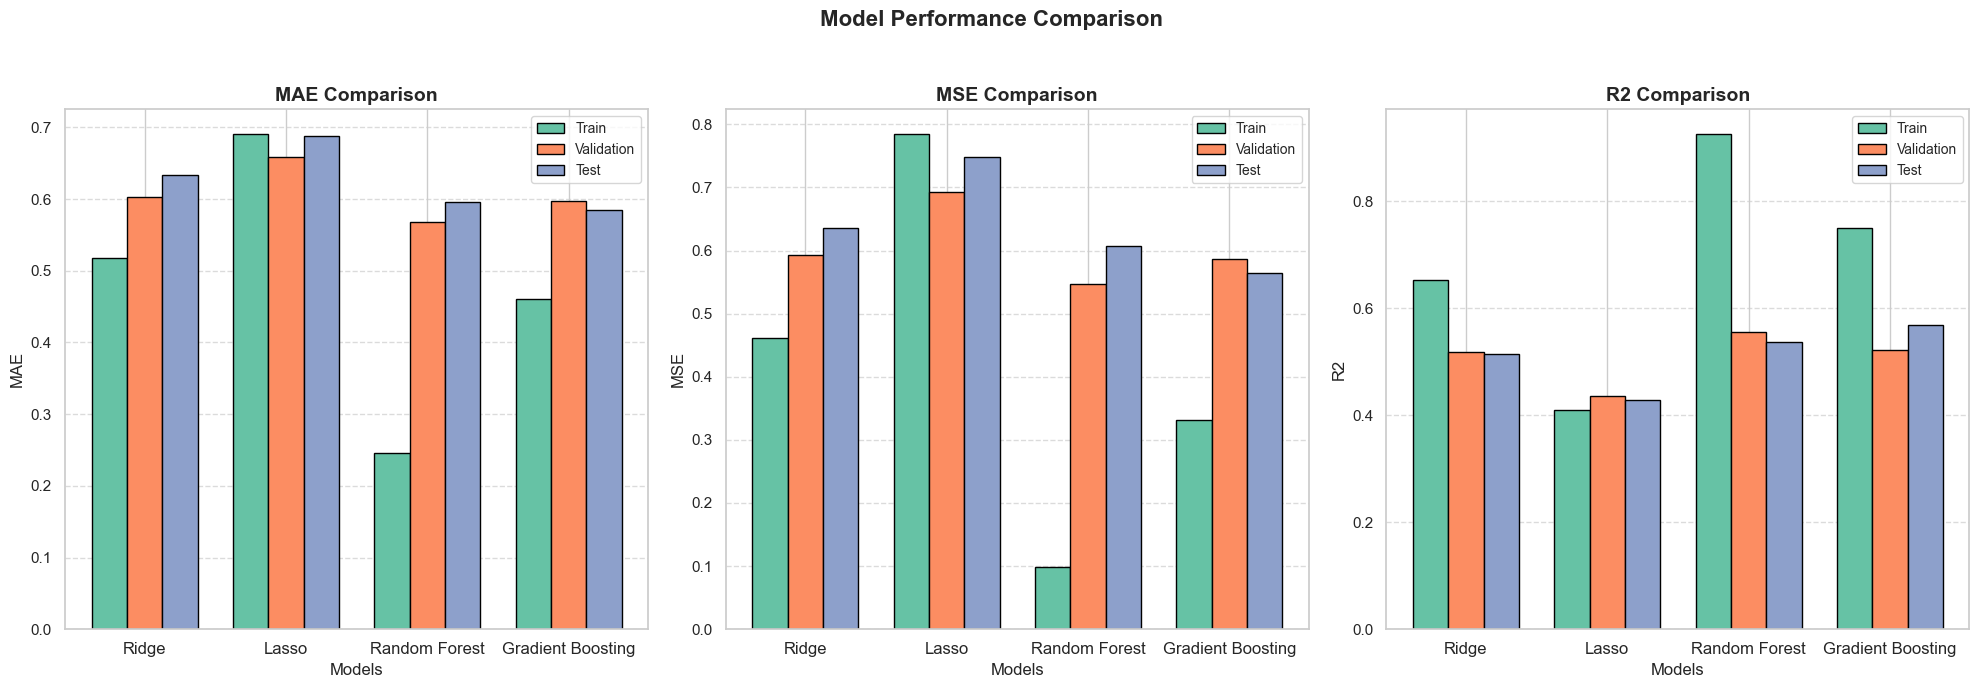

In [556]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Prepare data for visualization
models = ['Ridge', 'Lasso', 'Random Forest', 'Gradient Boosting']
metrics = ['MAE', 'MSE', 'R2']

train_metrics = np.array([train_metrics_ridge, train_metrics_lasso, train_metrics_rf, train_metrics_gb])
val_metrics = np.array([val_metrics_ridge, val_metrics_lasso, val_metrics_rf, val_metrics_gb])
test_metrics = np.array([test_metrics_ridge, test_metrics_lasso, test_metrics_rf, test_metrics_gb])

# Set Seaborn style for better visuals
sns.set_theme(style="whitegrid")

# Create bar plots for each metric
fig, axs = plt.subplots(1, 3, figsize=(20, 7))
colors = sns.color_palette("Set2", 3)

for i, metric in enumerate(metrics):
    bar_width = 0.25
    x = np.arange(len(models))
    
    axs[i].bar(x - bar_width, train_metrics[:, i], width=bar_width, color=colors[0], label='Train', edgecolor='black')
    axs[i].bar(x, val_metrics[:, i], width=bar_width, color=colors[1], label='Validation', edgecolor='black')
    axs[i].bar(x + bar_width, test_metrics[:, i], width=bar_width, color=colors[2], label='Test', edgecolor='black')
    
    axs[i].set_xticks(x)
    axs[i].set_xticklabels(models, fontsize=12)
    axs[i].set_title(f'{metric} Comparison', fontsize=14, fontweight='bold')
    axs[i].set_xlabel('Models', fontsize=12)
    axs[i].set_ylabel(metric, fontsize=12)
    axs[i].legend(fontsize=10, loc='best')
    axs[i].grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout for better spacing
plt.suptitle("Model Performance Comparison", fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


1. Extract Feature Importances
Both Random Forest and Gradient Boosting models provide a feature_importances_ attribute that indicates the importance of each feature in predicting the target variable.

In [557]:
# Extract feature importances from RandomForest
rf_feature_importances = grid_search_rf.best_estimator_.named_steps['regressor'].feature_importances_

# Extract feature importances from GradientBoosting
gb_feature_importances = grid_search_gb.best_estimator_.named_steps['regressor'].feature_importances_

# Combine the importance values with feature names
all_features = numerical_features + list(grid_search_rf.best_estimator_.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out())

# Create DataFrames for better visualization
rf_importances_df = pd.DataFrame({
    'Feature': all_features,
    'Importance': rf_feature_importances
}).sort_values(by='Importance', ascending=False)

gb_importances_df = pd.DataFrame({
    'Feature': all_features,
    'Importance': gb_feature_importances
}).sort_values(by='Importance', ascending=False)


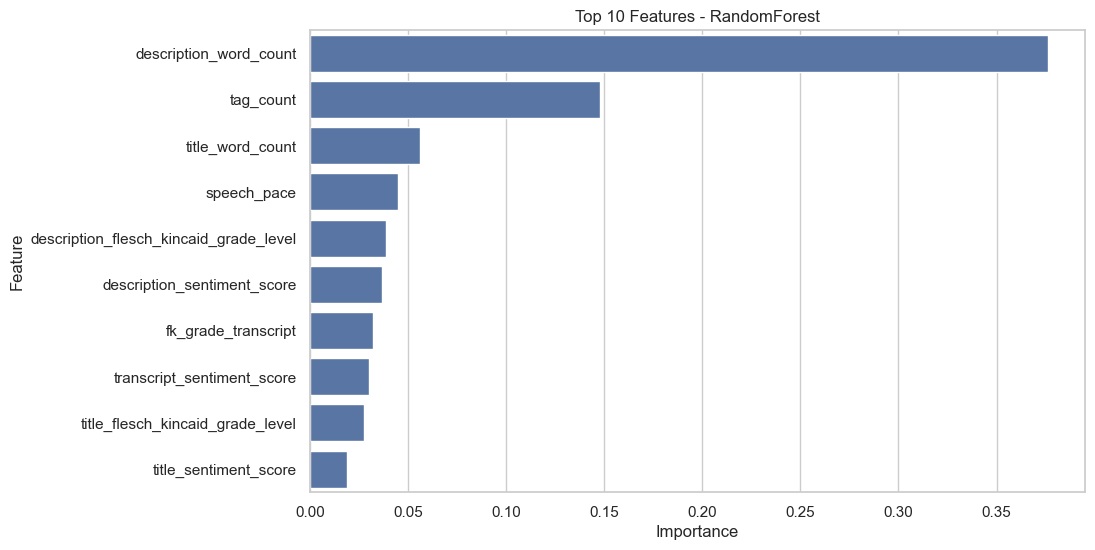

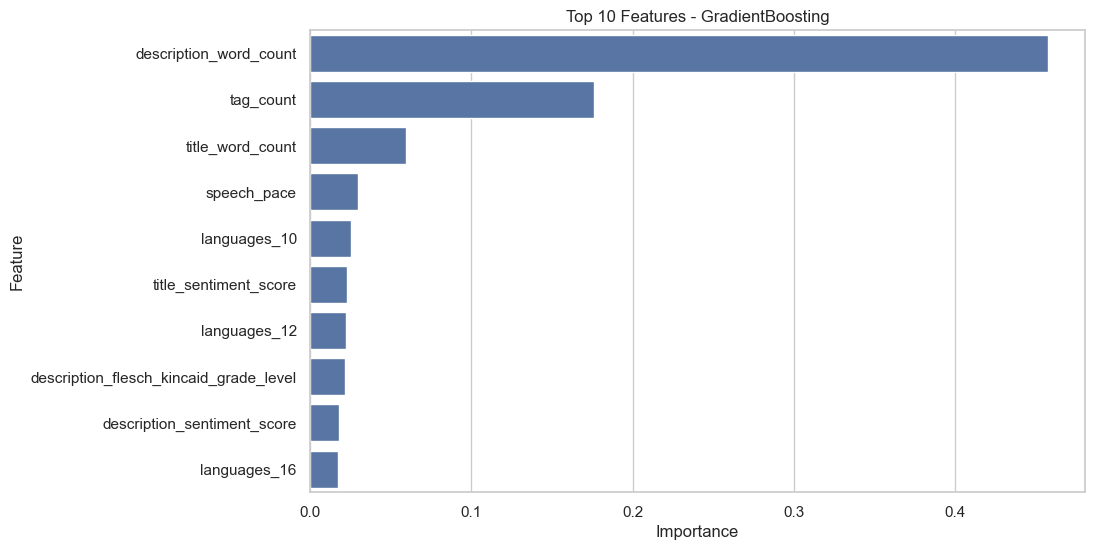

In [558]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot RandomForest feature importances
plt.figure(figsize=(10, 6))
sns.barplot(data=rf_importances_df.head(10), x='Importance', y='Feature')
plt.title('Top 10 Features - RandomForest')
plt.show()

# Plot GradientBoosting feature importances
plt.figure(figsize=(10, 6))
sns.barplot(data=gb_importances_df.head(10), x='Importance', y='Feature')
plt.title('Top 10 Features - GradientBoosting')
plt.show()


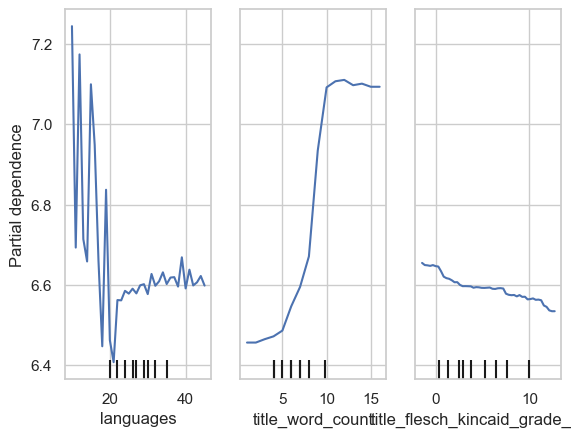

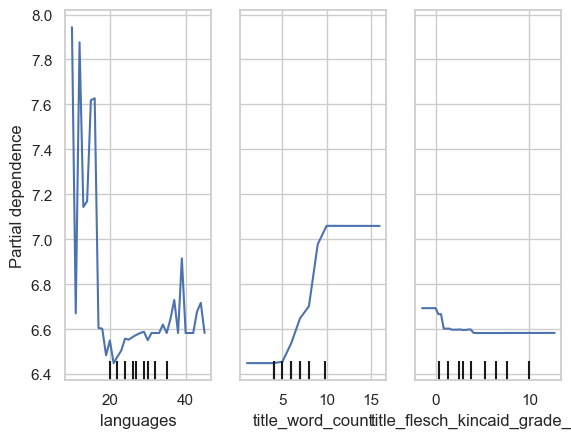

In [559]:
from sklearn.inspection import PartialDependenceDisplay

# Partial dependence plots for RandomForest
PartialDependenceDisplay.from_estimator(grid_search_rf.best_estimator_, X_train, features=[0, 1, 2], grid_resolution=50)  # Replace with top feature indices
plt.show()

# Partial dependence plots for GradientBoosting
PartialDependenceDisplay.from_estimator(grid_search_gb.best_estimator_, X_train, features=[0, 1, 2], grid_resolution=50)  # Replace with top feature indices
plt.show()
